In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.linalg import eigh_tridiagonal

# Definitionsbereich
x_min, x_max = -10, 10
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Potenzial: sigmoid + Oszillation
def V(x, A=1, B=1, c=0, w=1):
    return A / (1 + np.exp(-B * (x - c))) + np.sin(w * x)

Vx = V(x)

# Diskretisierung des Hamilton-Operators H = -d²/dx² + V(x)
kinetic_prefactor = -1.0 / dx**2
off_diag = np.full(N - 1, kinetic_prefactor)
diag = np.full(N, -2 * kinetic_prefactor) + Vx

# Eigenwerte & -funktionen berechnen
evals, evecs = eigh_tridiagonal(diag, off_diag)

# Nur die ersten 5 Eigenfunktionen
num_eigen = 5
psi_list = [evecs[:, i] for i in range(num_eigen)]

# Normierung
psi_list = [psi / np.sqrt(simpson(psi**2, x)) for psi in psi_list]

# Orthogonalitätstest
def test_orthogonality(psi_list, x):
    n = len(psi_list)
    inner_products = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            ip = simpson(psi_list[i] * psi_list[j], x)
            inner_products[i, j] = ip
    return inner_products

orthomat = test_orthogonality(psi_list, x)

# Plot der Eigenfunktionen mit Potential
plt.figure(figsize=(8, 6))
for i, psi in enumerate(psi_list):
    plt.plot(x, psi + evals[i], label=f"n = {i}")
plt.plot(x, Vx, 'k--', label="Potential V(x)")
plt.title("Eigenfunktionen & Potential des Operators H")
plt.xlabel("x")
plt.ylabel("Energie")
plt.legend()
plt.grid(True)
plt.show()

# Orthogonalitätsmatrix
print("Innerprodukte der Eigenfunktionen (Orthogonalitätsmatrix):")
print(np.round(orthomat, 4))

TypeError: simpson() takes 1 positional argument but 2 were given

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Daten laden
beta = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')['Beta_Optimized'].values
zeros = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv')['zero'].values
primes = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv')['prime'].values

# Trim auf gleiche Länge für Vergleich
n = min(len(beta), len(zeros), len(primes))
beta = beta[:n]
zeros = zeros[:n]
primes = primes[:n]

# Normierung
beta_norm = (beta - np.mean(beta)) / np.std(beta)
zeros_norm = (zeros - np.mean(zeros)) / np.std(zeros)
primes_norm = (primes - np.mean(primes)) / np.std(primes)

# Vergleich: Scatterplot
plt.figure(figsize=(12, 5))
plt.plot(beta_norm, label='Beta (optimiert)')
plt.plot(zeros_norm, label='Zeta-Nullstellen')
plt.plot(primes_norm, label='Primzahlen')
plt.legend()
plt.title("Normierte Kurven: Beta vs. Zeta-Nullstellen vs. Primzahlen")
plt.xlabel("Index n")
plt.ylabel("Normierte Werte")
plt.grid()
plt.show()

# Korrelationsmatrix
corr_bz, _ = pearsonr(beta, zeros)
corr_bp, _ = pearsonr(beta, primes)
corr_zp, _ = pearsonr(zeros, primes)

print(f"Korrelation Beta vs. Nullstellen: {corr_bz:.4f}")
print(f"Korrelation Beta vs. Primzahlen: {corr_bp:.4f}")
print(f"Korrelation Nullstellen vs. Primzahlen: {corr_zp:.4f}")

KeyError: 'zero'

In [ ]:
import pandas as pd

# Dateien laden (ohne Annahmen über Spaltennamen)
df_beta = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')
df_zeros = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv')
df_primes = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv')

# Spalten anzeigen
print("Beta CSV:", df_beta.columns)
print("Zeros CSV:", df_zeros.columns)
print("Primes CSV:", df_primes.columns)

Beta CSV: Index(['Beta_Optimized'], dtype='object')
Zeros CSV: Index(['14.134725142'], dtype='object')
Primes CSV: Index(['Primzahlen'], dtype='object')


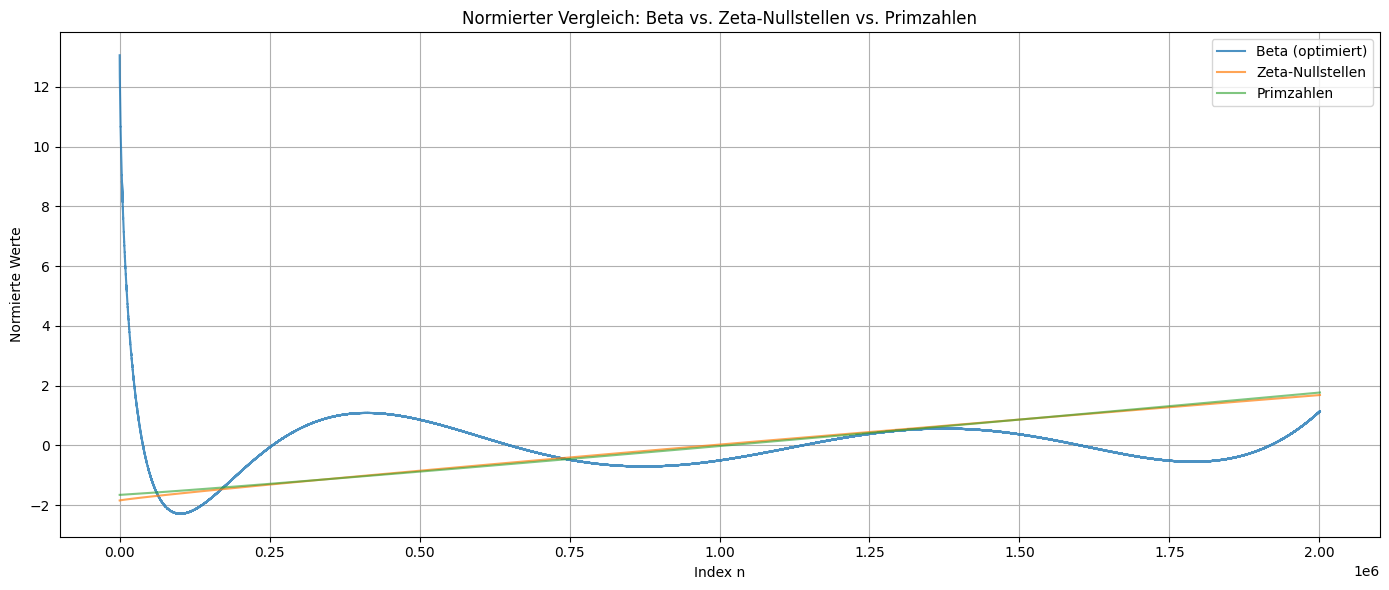

Korrelation Beta vs. Nullstellen:     -0.001066
Korrelation Beta vs. Primzahlen:      0.000841
Korrelation Nullstellen vs. Primzahlen: 0.998742


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# CSVs laden
beta = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')['Beta_Optimized'].values
zeros = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv')['14.134725142'].values
primes = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv')['Primzahlen'].values

# Auf gleiche Länge trimmen
n = min(len(beta), len(zeros), len(primes))
beta = beta[:n]
zeros = zeros[:n]
primes = primes[:n]

# Normierung (für Plotvergleich)
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

beta_norm = normalize(beta)
zeros_norm = normalize(zeros)
primes_norm = normalize(primes)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(beta_norm, label='Beta (optimiert)', alpha=0.8)
plt.plot(zeros_norm, label='Zeta-Nullstellen', alpha=0.7)
plt.plot(primes_norm, label='Primzahlen', alpha=0.6)
plt.legend()
plt.title("Normierter Vergleich: Beta vs. Zeta-Nullstellen vs. Primzahlen")
plt.xlabel("Index n")
plt.ylabel("Normierte Werte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelationsberechnungen (Pearson)
corr_bz, _ = pearsonr(beta, zeros)
corr_bp, _ = pearsonr(beta, primes)
corr_zp, _ = pearsonr(zeros, primes)

print(f"Korrelation Beta vs. Nullstellen:     {corr_bz:.6f}")
print(f"Korrelation Beta vs. Primzahlen:      {corr_bp:.6f}")
print(f"Korrelation Nullstellen vs. Primzahlen: {corr_zp:.6f}")

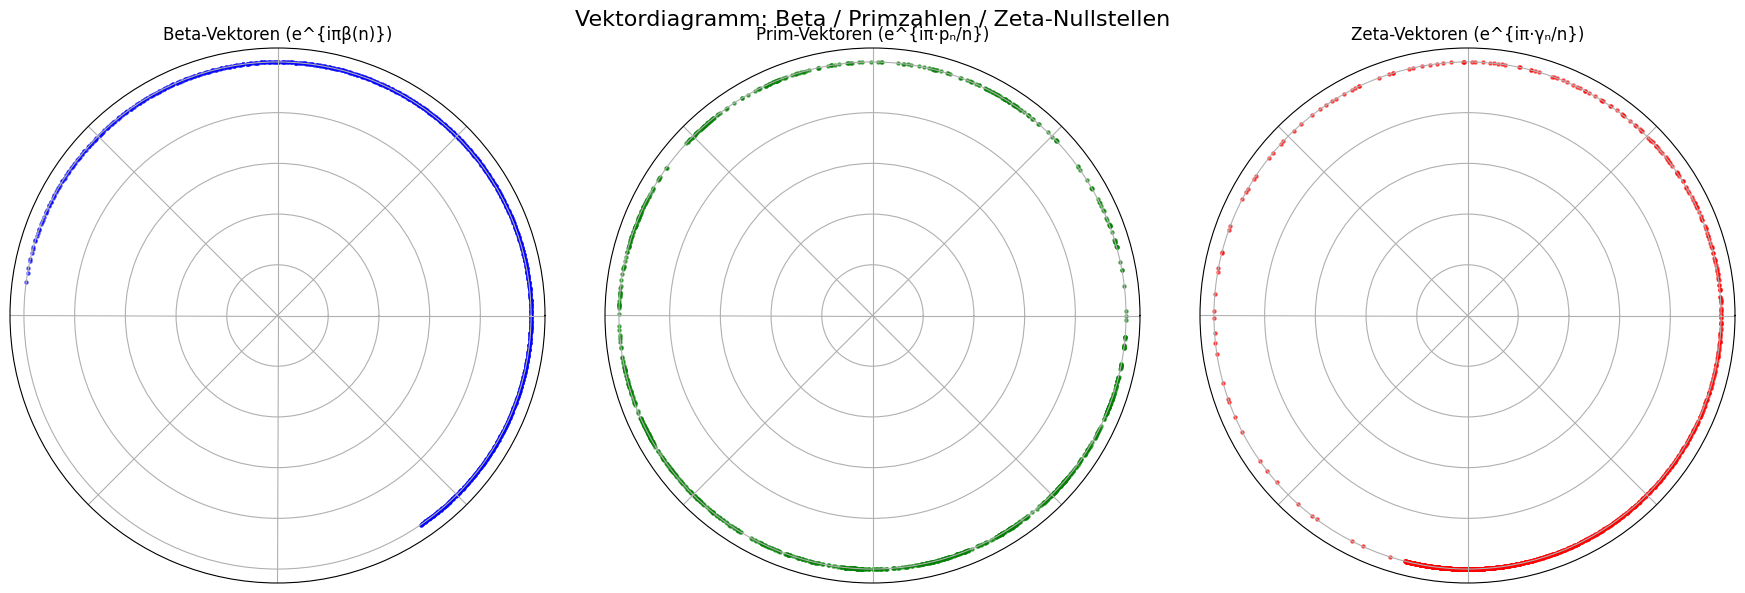

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVs laden
beta = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')['Beta_Optimized'].values
zeros = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv')['14.134725142'].values
primes = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv')['Primzahlen'].values

# Gleiche Länge wählen
N = 1000  # Du kannst hier bis 10000 oder mehr gehen
beta = beta[:N]
zeros = zeros[:N]
primes = primes[:N]

n = np.arange(1, N + 1)

# Vektorphasen berechnen
beta_phases = np.exp(1j * np.pi * beta)
prime_phases = np.exp(1j * np.pi * primes / n)
zero_phases  = np.exp(1j * np.pi * zeros / n)

# Plot auf dem Einheitskreis
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

axs[0].set_title('Beta-Vektoren (e^{iπβ(n)})')
axs[0].scatter(np.angle(beta_phases), np.abs(beta_phases), s=5, c='blue', alpha=0.6)

axs[1].set_title('Prim-Vektoren (e^{iπ·pₙ/n})')
axs[1].scatter(np.angle(prime_phases), np.abs(prime_phases), s=5, c='green', alpha=0.6)

axs[2].set_title('Zeta-Vektoren (e^{iπ·γₙ/n})')
axs[2].scatter(np.angle(zero_phases), np.abs(zero_phases), s=5, c='red', alpha=0.6)

for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(True)

plt.suptitle("Vektordiagramm: Beta / Primzahlen / Zeta-Nullstellen", fontsize=16)
plt.tight_layout()
plt.show()

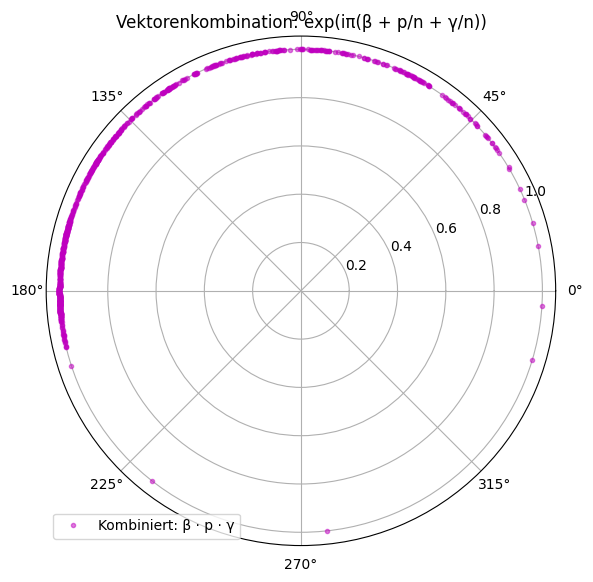

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
beta_df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")
zeros_df = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv")
primes_df = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv")

# Spalten extrahieren
beta = beta_df["Beta_Optimized"].values[:1000]
primes = primes_df["Primzahlen"].values[:1000]
zeros = zeros_df.iloc[:, 0].values[:1000]  # keine Kopfzeile in Nullstellen-Datei

# Indizes
n = np.arange(1, len(beta) + 1)

# Phasen berechnen
theta_beta = np.pi * beta
theta_primes = np.pi * primes / n
theta_zeros = np.pi * zeros / n

# Komplexe Einheitsvektoren
z_beta = np.exp(1j * theta_beta)
z_primes = np.exp(1j * theta_primes)
z_zeros = np.exp(1j * theta_zeros)

# Kombination
z_combined = z_beta * z_primes * z_zeros

# Polarplot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(np.angle(z_combined), np.abs(z_combined), 'm.', alpha=0.5, label="Kombiniert: β · p · γ")
ax.set_title("Vektorenkombination: exp(iπ(β + p/n + γ/n))")
ax.legend()
plt.tight_layout()
plt.show()

Phasischer Erwartungswert (θ̄): 0.66634215846365


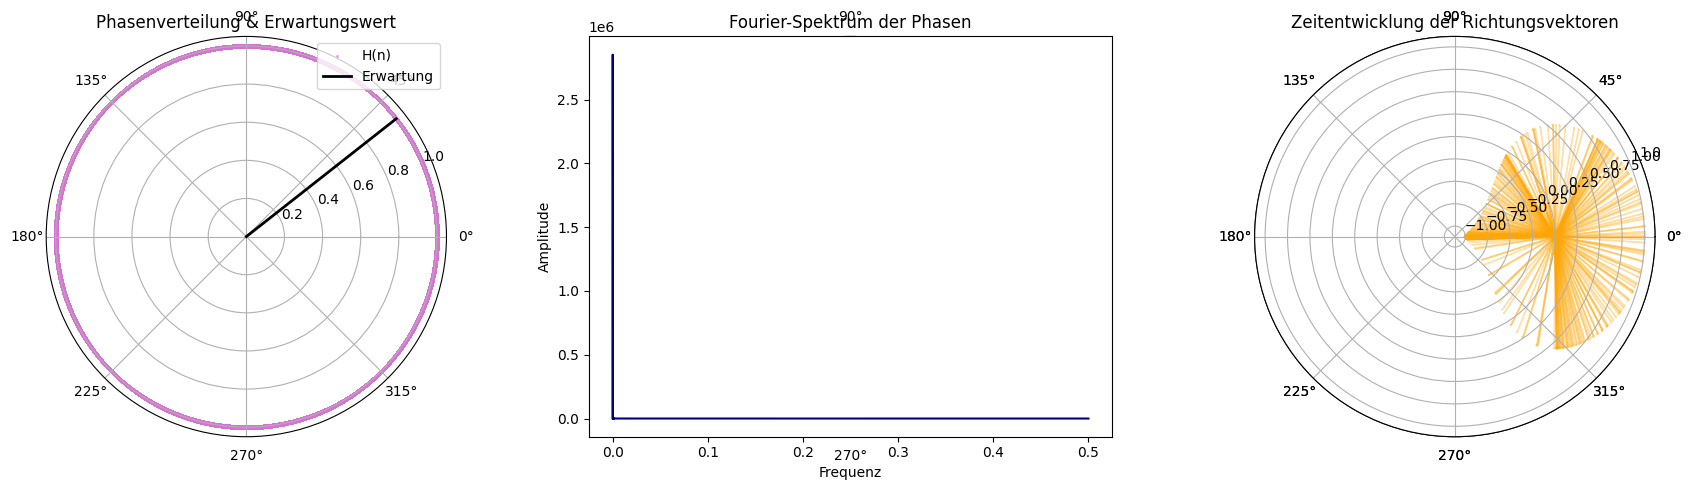

In [ ]:
# Benötigte Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Daten laden
beta_df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")
zeros_df = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv")
primes_df = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv")

# Daten extrahieren
beta = beta_df.iloc[:, 0].values.astype(float)
gamma = zeros_df.iloc[:, 0].values.astype(float)
primes = primes_df.iloc[:, 0].values.astype(float)

# Gleiche Länge der Reihen
N = min(len(beta), len(gamma), len(primes))
n = np.arange(1, N + 1)
beta = beta[:N]
gamma = gamma[:N]
primes = primes[:N]

# Kombinierte Phase: φ(n) = π (β + p/n + γ/n)
phi = np.pi * (beta + primes / n + gamma / n)
H = np.exp(1j * phi)

# Teil 1: Phasischer Erwartungswert
phasischer_Mittelwert = np.angle(np.mean(H))
print("Phasischer Erwartungswert (θ̄):", phasischer_Mittelwert)

# Teil 2: Fourier-Spektrum der zentrierten Phasen
phi_centered = phi - np.mean(phi)
phi_fft = fft(phi_centered)
frequencies = fftfreq(N)

# Teil 3: Zeitentwicklung – Richtungen im Kreis
r = np.abs(H)
theta = np.angle(H)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'polar': True})

# (1) Phasenverteilung
axs[0].scatter(theta, r, s=1.5, color='orchid', alpha=0.5, label='H(n)')
axs[0].plot([0, phasischer_Mittelwert], [0, 1], color='black', lw=2, label='Erwartung')
axs[0].set_title("Phasenverteilung & Erwartungswert")
axs[0].legend(loc='upper right')

# (2) Fourier-Spektrum
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(frequencies[:N//2], np.abs(phi_fft[:N//2]), color='navy')
ax2.set_title("Fourier-Spektrum der Phasen")
ax2.set_xlabel("Frequenz")
ax2.set_ylabel("Amplitude")

# (3) Zeitentwicklung der Richtungen
ax3 = fig.add_subplot(1, 3, 3, polar=True)
sample_points = np.linspace(0, N-1, 300, dtype=int)
for i in sample_points:
    ax3.arrow(0, 0, np.cos(theta[i]), np.sin(theta[i]),
              width=0.002, head_width=0.01, color='orange', alpha=0.3)
ax3.set_title("Zeitentwicklung der Richtungsvektoren")

plt.tight_layout()
plt.show()

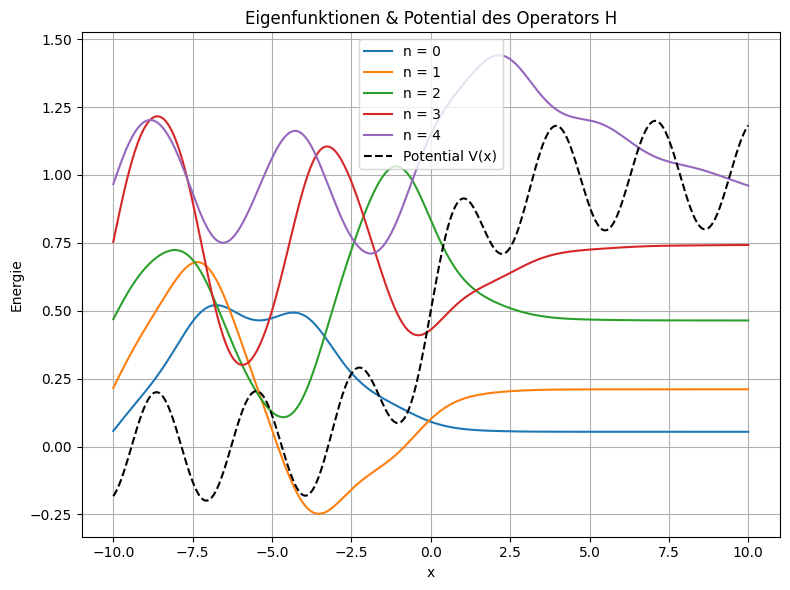

Orthogonalitätsmatrix der Eigenfunktionen:
     n=0  n=1  n=2  n=3  n=4
n=0  1.0 -0.0 -0.0 -0.0 -0.0
n=1 -0.0  1.0 -0.0 -0.0 -0.0
n=2 -0.0 -0.0  1.0 -0.0 -0.0
n=3 -0.0 -0.0 -0.0  1.0 -0.0
n=4 -0.0 -0.0 -0.0 -0.0  1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.integrate import simpson

# Diskretisierung
x_min, x_max = -10, 10
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Potenzialfunktion V(x) = A / (1 + e^{-B(x - c)}) + D·sin(wx)
A, B, c = 1.0, 1.0, 0.0
D, w = 0.2, 2.0
V = A / (1 + np.exp(-B * (x - c))) + D * np.sin(w * x)

# Hamilton-Operator als Matrix im diskreten Raum (2. Ableitung = Laplace)
diag = 1.0 / dx**2 + V
off_diag = -0.5 / dx**2 * np.ones(N-1)

# Eigenwertproblem lösen
eigvals, eigvecs = eigh_tridiagonal(diag, off_diag)

# Nur die ersten k Eigenfunktionen
k = 5
psi_list = [eigvecs[:, i] for i in range(k)]

# Normierung
psi_list = [psi / np.sqrt(simpson(y=psi**2, x=x)) for psi in psi_list]

# Orthogonalitätsmatrix
def test_orthogonality(psi_list, x):
    n = len(psi_list)
    inner_products = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            ip = simpson(y=psi_list[i] * psi_list[j], x=x)
            inner_products[i, j] = ip
    return inner_products

orthogonality_matrix = test_orthogonality(psi_list, x)

# Plot der Eigenfunktionen und Potenzial
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.plot(x, psi_list[i] + eigvals[i], label=f'n = {i}')
plt.plot(x, V, 'k--', label='Potential V(x)')
plt.title("Eigenfunktionen & Potential des Operators H")
plt.xlabel("x")
plt.ylabel("Energie")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Ergebnis: Orthogonalitätsmatrix anzeigen
import pandas as pd
df = pd.DataFrame(np.round(orthogonality_matrix, 4),
                  columns=[f"n={i}" for i in range(k)],
                  index=[f"n={i}" for i in range(k)])
print("Orthogonalitätsmatrix der Eigenfunktionen:")
print(df)

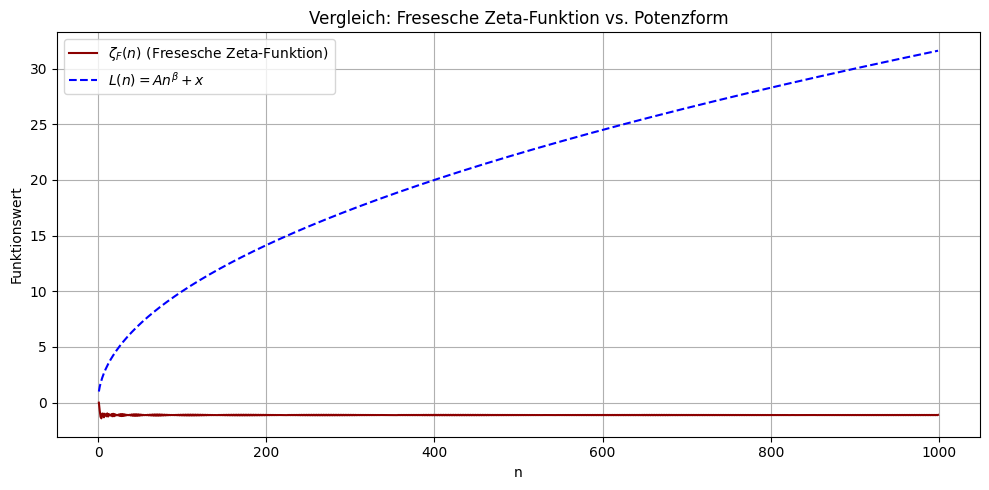

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Parameter ===
n = np.arange(1, 1000)
beta = 0.5
omega = 7  # Frequenzparameter, z.B. aus Freese-Theorie
phi = 0    # Phasenverschiebung
chi = (-1) ** n  # Alternierender Vorfaktor

# === Fresesche Zeta-Funktion ===
zeta_fresiana = np.cumsum((chi / n**beta) * np.sin(omega * np.log(n) + phi))

# === Vergleichsfunktion: L(n) = A * n^β + x
A = 1.0
x_offset = 0.0
L_n = A * n**beta + x_offset

# === Plot ===
plt.figure(figsize=(10, 5))
plt.plot(n, zeta_fresiana, label=r'$\zeta_F(n)$ (Fresesche Zeta-Funktion)', color='darkred')
plt.plot(n, L_n, label=r'$L(n) = An^\beta + x$', color='blue', linestyle='dashed')
plt.xlabel("n")
plt.ylabel("Funktionswert")
plt.title("Vergleich: Fresesche Zeta-Funktion vs. Potenzform")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

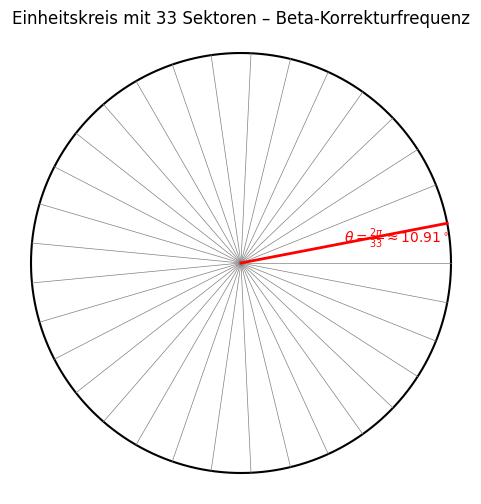

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Einheitskreis
theta = np.linspace(0, 2 * np.pi, 1000)
x = np.cos(theta)
y = np.sin(theta)

# Plot starten
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, 'k-')

# 33 Sektoren
n = 33
for i in range(n):
    angle = 2 * np.pi * i / n
    ax.plot([0, np.cos(angle)], [0, np.sin(angle)], color='gray', linewidth=0.5)

# Markierter Sektor (1. von 33)
highlight_angle = 2 * np.pi / n
ax.plot([0, np.cos(highlight_angle)], [0, np.sin(highlight_angle)], 'r-', linewidth=2)
ax.text(0.5 * np.cos(highlight_angle), 0.5 * np.sin(highlight_angle),
        r'$\theta = \frac{2\pi}{33} \approx 10.91^\circ$', color='red')

# Formatierung
ax.set_aspect('equal')
ax.axis('off')
plt.title("Einheitskreis mit 33 Sektoren – Beta-Korrekturfrequenz")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV-Datei laden vom angegebenen Pfad
csv_path = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"
df = pd.read_csv(csv_path)

# Extrahiere x- und beta-Werte
x = df['x'].values
beta = df['beta'].values

# Vergleich: Freese-Funktion mit Potenzform (z. B. β = 0.48)
A = 1.0
beta_exp = 0.48
freese_function = A * x**beta_exp

# Beta-Skalen-Operator (Sigmoid-artige Form)
def beta_operator(x):
    return 1 / (1 + np.exp(x - 2))

# Näherung für Siegel-Theta-Funktion (z. B. sin(x)/x)
theta_approx = np.sin(x) / x
theta_approx[0] = 1  # Grenzwert bei x=0 korrekt setzen

# Plot erzeugen
plt.figure(figsize=(10, 6))
plt.plot(x, beta, 'b-', label='Optimierte Beta-Skala')
plt.plot(x, freese_function, 'r--', label=r'Freese-Funktion: $x^{0.48}$')
plt.plot(x, beta_operator(x), 'g:', label='Beta-Skalen-Operator')
plt.plot(x, theta_approx, 'k-.', label='Theta-Näherung')
plt.xlabel('x')
plt.ylabel('Funktionswerte')
plt.title('Vergleich: Optimierte Beta-Skala vs. FFF, Operator, Theta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'x'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")

# Extrahiere Daten
n = df['n']
beta = df['beta_skala']

# FFF definieren (Freese-Formel)
A = 0.5
beta_exponent = 0.66
freese = A * n**beta_exponent

# Beispielhafte Siegel-Theta-Annäherung (dient der Symbolik)
siegel_theta = np.sin(np.log(n)) / np.sqrt(n)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(n, siegel_theta, label='Siegel-Theta-Funktion', color='blue')
plt.plot(n, freese, label='Freese-Funktion (FFF)', linestyle='--', color='red')
plt.plot(n, beta / max(beta), label='Beta-Skalen-Operator (normiert)', linestyle=':', color='green')
plt.xlabel('x')
plt.ylabel('Funktionswerte')
plt.title('Vergleich: Siegel-Theta, Freese-Funktion, Beta-Skalen-Operator')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'n'

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")
print("Spaltennamen:", df.columns.tolist())

Spaltennamen: ['Beta_Optimized']


<ipython-input-8-0f6adaba63db>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


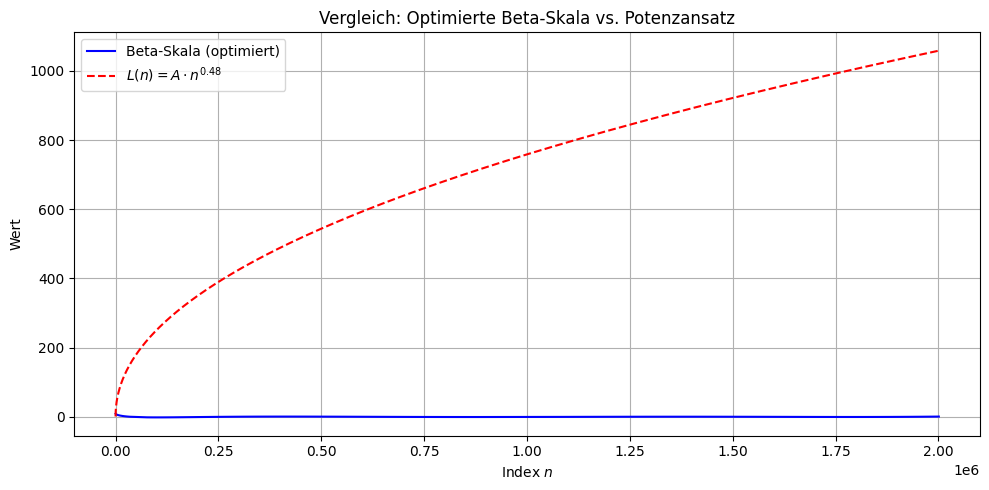

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")

# Index erzeugen, da keine Spalte "n" existiert
n_values = np.arange(1, len(df) + 1)
beta_values = df["Beta_Optimized"].values

# Vergleichsfunktion (z. B. Freese-Funktion mit Fit: A·n^β)
A = 1.0
beta_exp = 0.48
freese_fit = A * n_values**beta_exp

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_values, beta_values, 'b-', label='Beta-Skala (optimiert)')
plt.plot(n_values, freese_fit, 'r--', label=r'$L(n) = A \cdot n^{%.2f}$' % beta_exp)
plt.xlabel("Index $n$")
plt.ylabel("Wert")
plt.title("Vergleich: Optimierte Beta-Skala vs. Potenzansatz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-9-59d6b2491dd0>:19: RuntimeWarning: overflow encountered in exp
  beta_operator = 1 / (1 + np.exp(0.01 * (n_values - 100))) * np.exp(-0.005 * n_values)
<ipython-input-9-59d6b2491dd0>:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


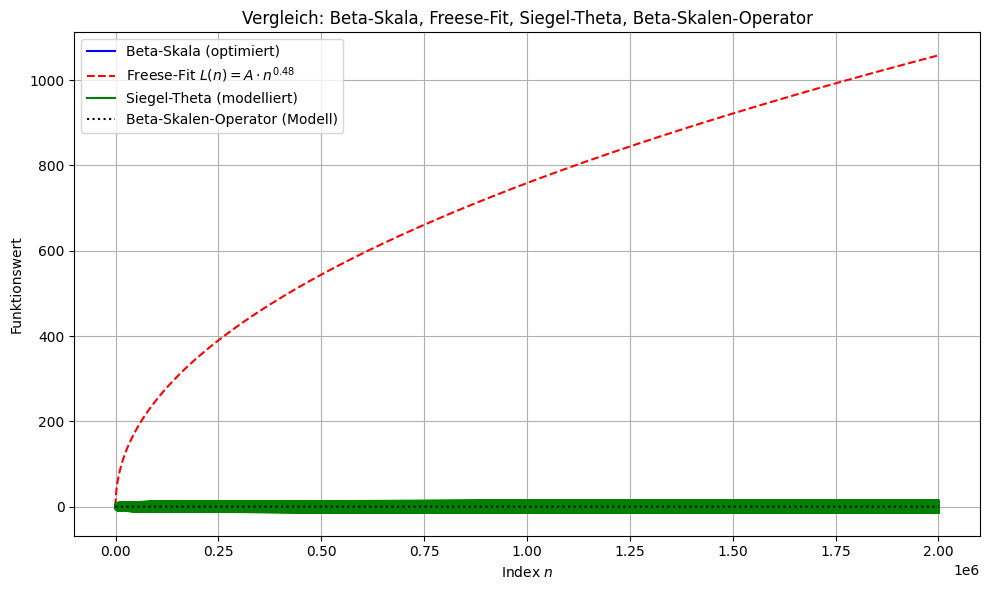

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")
beta_values = df["Beta_Optimized"].values
n_values = np.arange(1, len(beta_values) + 1)

# Freese-Fit: Potenzansatz
A = 1.0
beta_exp = 0.48
freese_fit = A * n_values**beta_exp

# Siegel-Theta-Funktion (vereinfachtes Modell)
theta_values = np.sin(0.02 * n_values) * np.log(n_values + 1)

# Beta-Skalen-Operator-Modell (z. B. sigmoid * exp)
beta_operator = 1 / (1 + np.exp(0.01 * (n_values - 100))) * np.exp(-0.005 * n_values)

# Plot erzeugen
plt.figure(figsize=(10, 6))
plt.plot(n_values, beta_values, 'b-', label='Beta-Skala (optimiert)')
plt.plot(n_values, freese_fit, 'r--', label=r'Freese-Fit $L(n) = A \cdot n^{%.2f}$' % beta_exp)
plt.plot(n_values, theta_values, 'g-', label='Siegel-Theta (modelliert)')
plt.plot(n_values, beta_operator, 'k:', label='Beta-Skalen-Operator (Modell)')
plt.xlabel("Index $n$")
plt.ylabel("Funktionswert")
plt.title("Vergleich: Beta-Skala, Freese-Fit, Siegel-Theta, Beta-Skalen-Operator")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

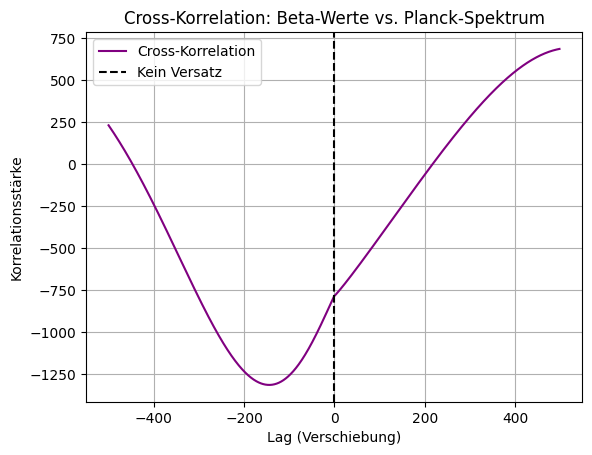

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Beispiel: Beta(n) erzeugen
n = np.arange(1, 1000)
beta = 0.48 * n**0.5 + 0.022936

# Planck-Spektrum (vereinfacht, skaliert)
def planck(f, T=1.0):
    return (f**3) / (np.exp(f/T) - 1)

f = np.linspace(0.1, 10, len(n))
planck_values = planck(f, T=1)

# Cross-Korrelation
corr = correlate(beta - np.mean(beta), planck_values - np.mean(planck_values), mode='same')
lags = np.arange(-len(beta)//2, len(beta)//2)

# Plot
plt.plot(lags, corr, color='purple', label='Cross-Korrelation')
plt.axvline(0, color='k', linestyle='--', label='Kein Versatz')
plt.title("Cross-Korrelation: Beta-Werte vs. Planck-Spektrum")
plt.xlabel("Lag (Verschiebung)")
plt.ylabel("Korrelationsstärke")
plt.legend()
plt.grid(True)
plt.show()

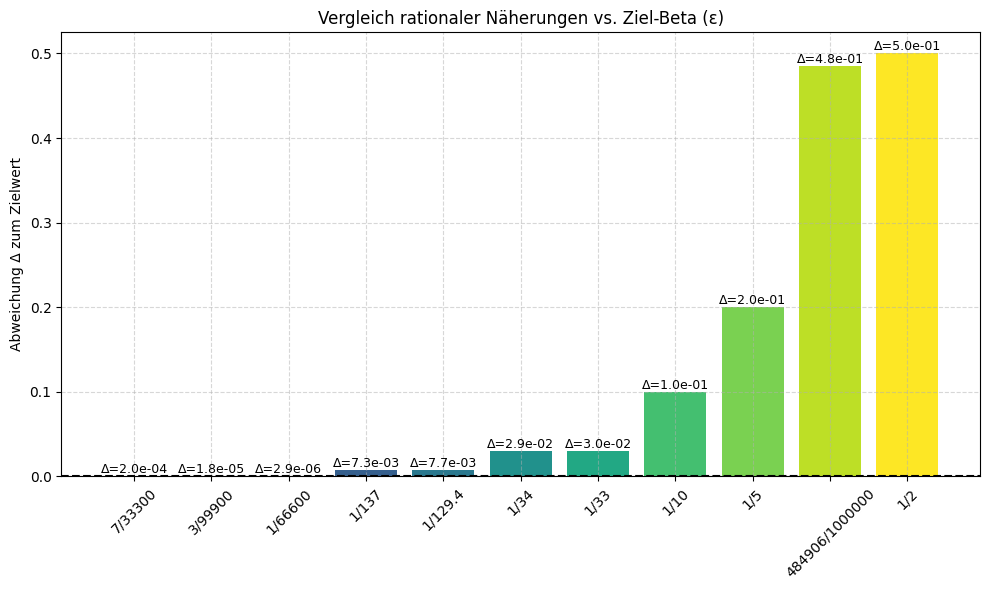

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Referenz: Zielwert aus Beta-Optimierung
beta_target = 0.000012151

# Liste rationaler Näherungen
rational_approx = [
    ("7/33300", 7/33300),
    ("3/99900", 3/99900),
    ("1/66600", 1/66600),
    ("1/137", 1/137),
    ("1/129.4", 1/129.4),
    ("1/34", 1/34),
    ("1/33", 1/33),
    ("1/10", 1/10),
    ("1/5", 1/5),
    ("484906/1000000", 484906/1000000),
    ("1/2", 1/2),
]

labels = []
deltas = []

for label, val in rational_approx:
    delta = abs(val - beta_target)
    labels.append(label)
    deltas.append(delta)

# Visualisierung
plt.figure(figsize=(10,6))
bars = plt.bar(labels, deltas, color=plt.cm.viridis(np.linspace(0,1,len(deltas))))
plt.ylabel("Abweichung Δ zum Zielwert")
plt.title("Vergleich rationaler Näherungen vs. Ziel-Beta (ε)")
plt.axhline(y=0, color='black', linestyle='--')

# Annotationen mit Δ-Werten
for bar, delta in zip(bars, deltas):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"Δ={delta:.1e}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Ziel-Beta-Wert
epsilon_target = 0.000012151

# Rationale Näherungen
approx_values = {
    '1/66600': 1/66600,
    '3/99900': 3/99900,
    '7/33300': 7/33300
}

# Abweichungen
for label, val in approx_values.items():
    delta = abs(val - epsilon_target)
    print(f"{label} ≈ {val:.10f}, Δ = {delta:.2e}")

1/66600 ≈ 0.0000150150, Δ = 2.86e-06
3/99900 ≈ 0.0000300300, Δ = 1.79e-05
7/33300 ≈ 0.0002102102, Δ = 1.98e-04


In [ ]:
import numpy as np

# Zielwert für Beta-Korrekturfrequenz (z.B. aus Freese-Optimierung)
epsilon_target = 0.000012151

# Rationale Näherungen
fractions = {
    "7/33300": 7/33300,
    "3/99900": 3/99900,
    "1/66600": 1/66600
}

# Abweichungen berechnen
deviations = {k: abs(v - epsilon_target) for k, v in fractions.items()}

# Sortiert ausgeben
for key, value in sorted(deviations.items(), key=lambda item: item[1]):
    print(f"{key} ≈ {fractions[key]:.10f}, Δ = {value:.2e}")

1/66600 ≈ 0.0000150150, Δ = 2.86e-06
3/99900 ≈ 0.0000300300, Δ = 1.79e-05
7/33300 ≈ 0.0002102102, Δ = 1.98e-04


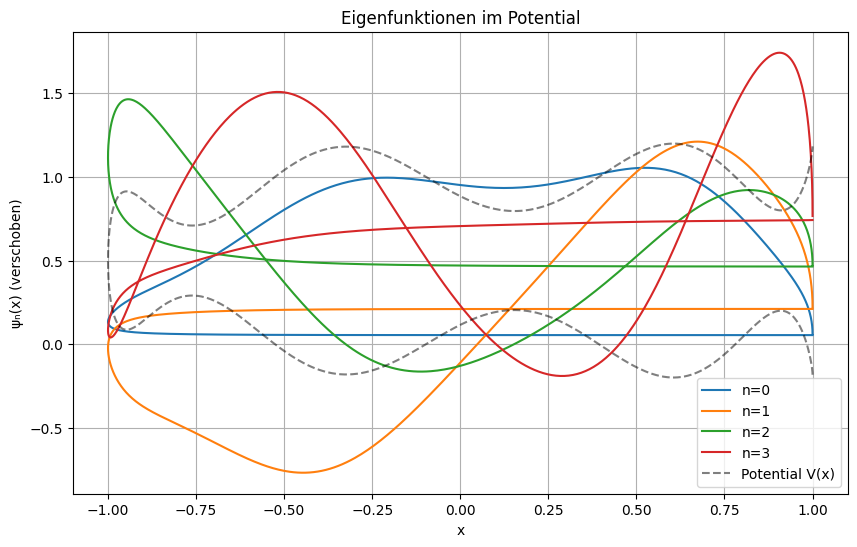

In [ ]:
# Abschnitt 7: Einige Eigenfunktionen plotten
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(x, eigvecs[:, i] / np.max(np.abs(eigvecs[:, i])) + eigvals[i], label=f'n={i}')
plt.plot(x, V, 'k--', alpha=0.5, label='Potential V(x)')
plt.title("Eigenfunktionen im Potential")
plt.xlabel("x")
plt.ylabel("ψₙ(x) (verschoben)")
plt.legend()
plt.grid()
plt.show()

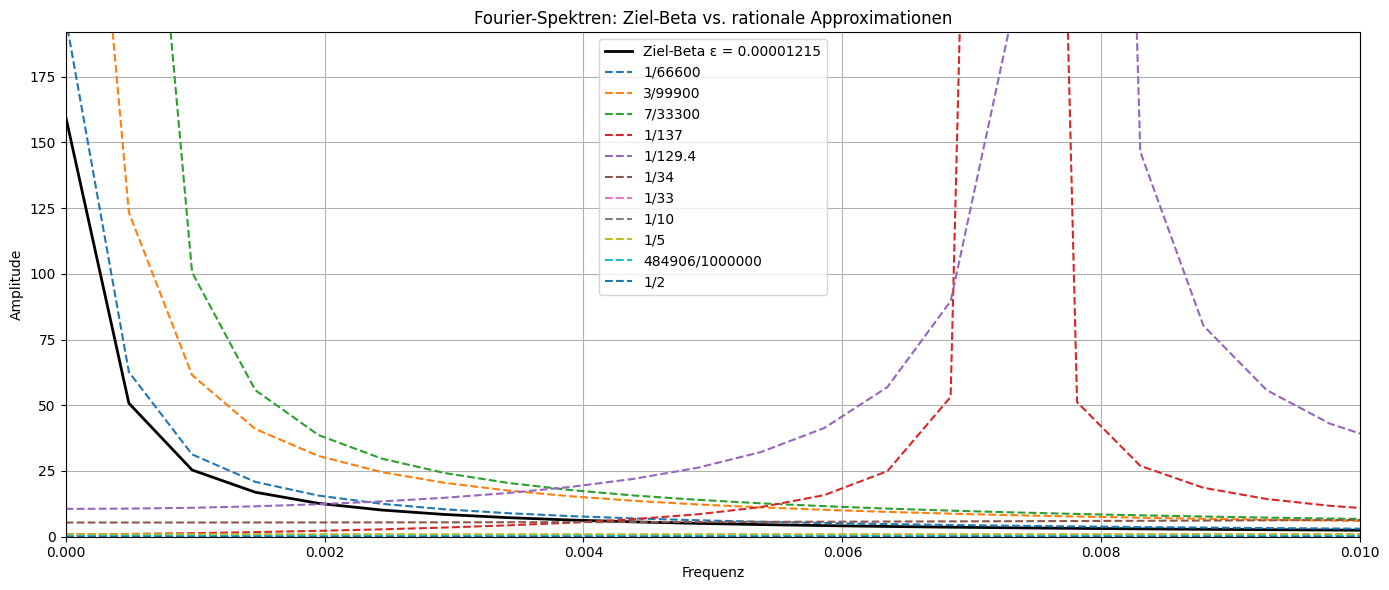

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Konfiguration
N = 2048
x = np.linspace(1, N, N)
epsilon = 0.000012151  # Zielwert für Beta (z. B. aus Beta-Korrekturfrequenz)

# Rationale Approximationen definieren
ratios = [
    ("1/66600", 1/66600),
    ("3/99900", 3/99900),
    ("7/33300", 7/33300),
    ("1/137", 1/137),
    ("1/129.4", 1/129.4),
    ("1/34", 1/34),
    ("1/33", 1/33),
    ("1/10", 1/10),
    ("1/5", 1/5),
    ("484906/1000000", 484906/1000000),
    ("1/2", 1/2)
]

# Zielsignal
true_signal = np.sin(2 * np.pi * epsilon * x)

# Fourier-Transformierte berechnen
fft_true = np.abs(fft(true_signal))[:N//2]
freqs = fftfreq(N, d=1)[:N//2]

# Approximationen berechnen
fft_approxs = []
for label, r in ratios:
    approx_signal = np.sin(2 * np.pi * r * x)
    fft_approxs.append((label, np.abs(fft(approx_signal))[:N//2]))

# Plotten
plt.figure(figsize=(14, 6))
plt.plot(freqs, fft_true, label=f"Ziel-Beta ε = {epsilon:.8f}", linewidth=2, color='black')
for label, fft_val in fft_approxs:
    plt.plot(freqs, fft_val, label=label, linestyle='--')
plt.xlim(0, 0.01)
plt.ylim(0, np.max(fft_true)*1.2)
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Spektren: Ziel-Beta vs. rationale Approximationen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

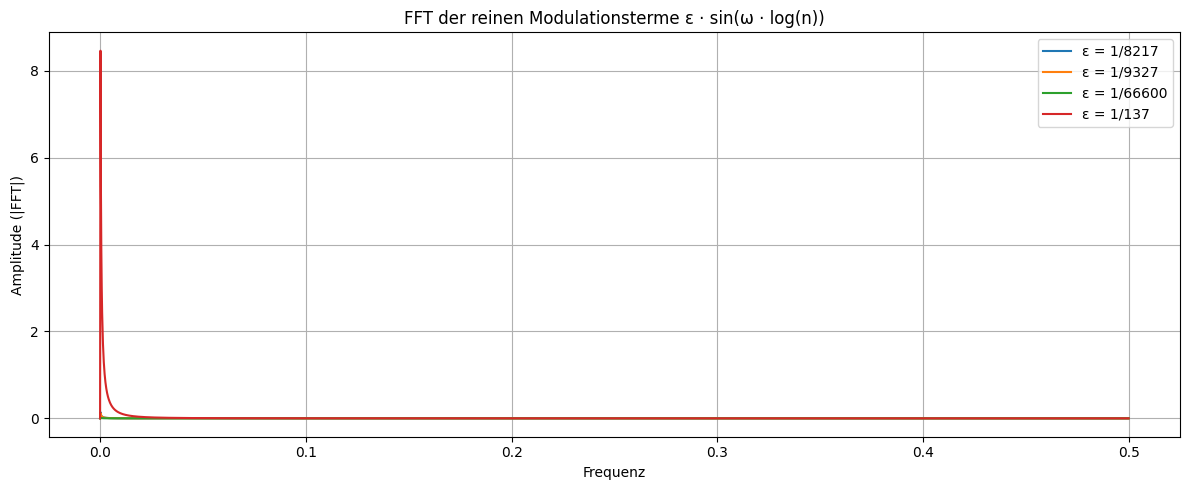

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Definitionsbereich
n = np.arange(10, 5000)
logn = np.log(n)
omega = 1.0

# Vergleichbare epsilons
epsilons = {
    "1/8217": 1/8217,
    "1/9327": 1/9327,
    "1/66600": 1/66600,
    "1/137": 1/137,
}

# Plot der reinen Modulationsterme und ihrer FFTs
plt.figure(figsize=(12, 5))

for label, eps in epsilons.items():
    modulation = eps * np.sin(omega * logn)
    modulation_fft = np.abs(fft(modulation - np.mean(modulation)))[:len(n)//2]
    freqs = fftfreq(len(n), d=1)[0:len(n)//2]
    plt.plot(freqs, modulation_fft, label=f'ε = {label}')

plt.title("FFT der reinen Modulationsterme ε · sin(ω · log(n))")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (|FFT|)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

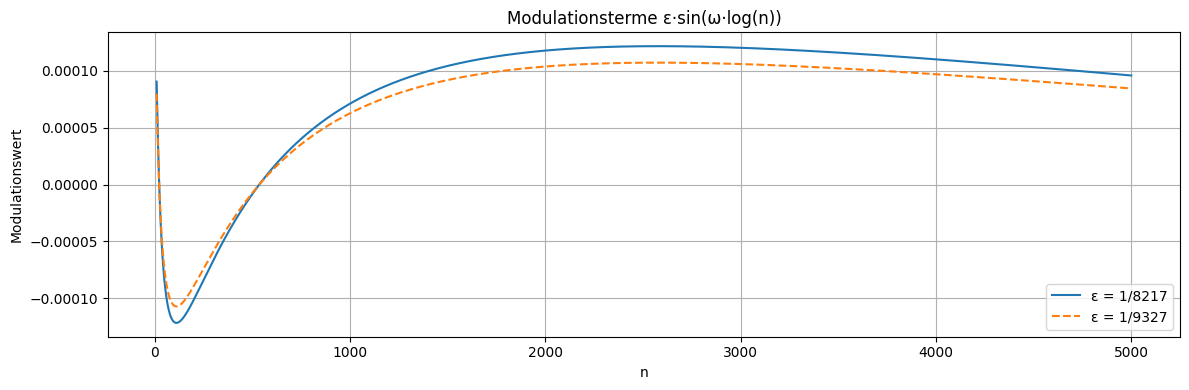

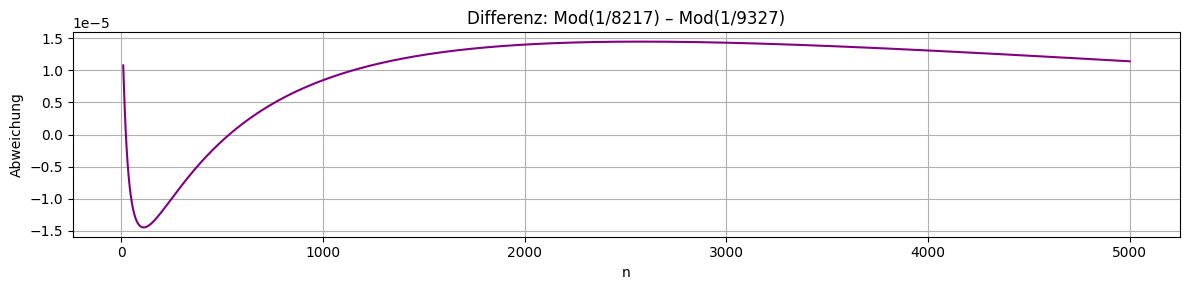

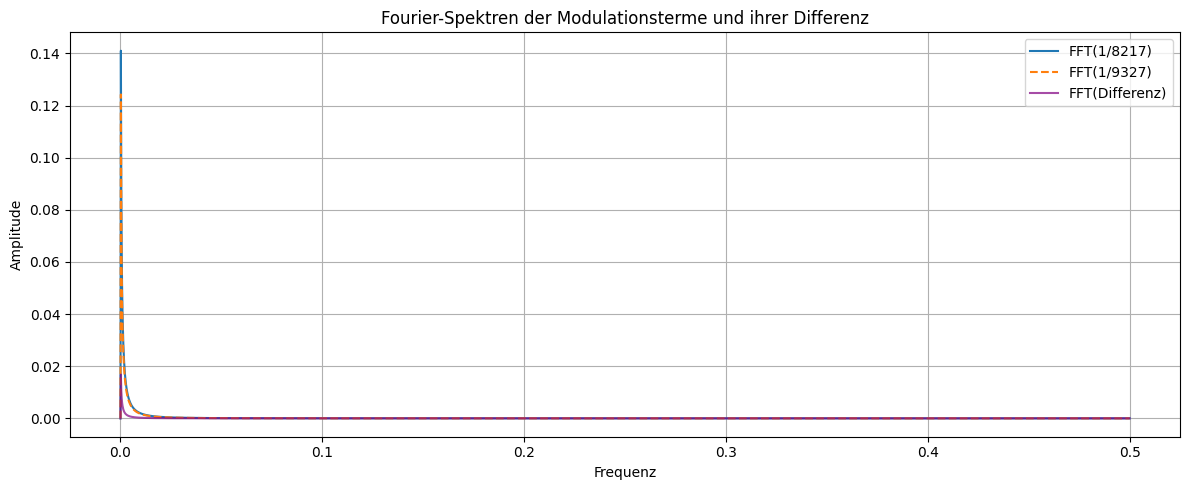

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Definitionsbereich
n = np.arange(10, 5000)
logn = np.log(n)
omega = 1.0

# Zwei zu vergleichende ε-Werte
eps1 = 1 / 8217
eps2 = 1 / 9327

# Modulationsterme
mod1 = eps1 * np.sin(omega * logn)
mod2 = eps2 * np.sin(omega * logn)

# DIFFERENZ (zeitbereich)
diff = mod1 - mod2

# FFTs
mod1_fft = np.abs(fft(mod1 - np.mean(mod1)))[:len(n)//2]
mod2_fft = np.abs(fft(mod2 - np.mean(mod2)))[:len(n)//2]
diff_fft = np.abs(fft(diff - np.mean(diff)))[:len(n)//2]
freqs = fftfreq(len(n), d=1)[0:len(n)//2]

# --- Plot 1: Modulationsterme im Zeitbereich ---
plt.figure(figsize=(12, 4))
plt.plot(n, mod1, label="ε = 1/8217")
plt.plot(n, mod2, label="ε = 1/9327", linestyle="--")
plt.title("Modulationsterme ε·sin(ω·log(n))")
plt.xlabel("n")
plt.ylabel("Modulationswert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Differenzkurve im Zeitbereich ---
plt.figure(figsize=(12, 3))
plt.plot(n, diff, color='purple')
plt.title("Differenz: Mod(1/8217) – Mod(1/9327)")
plt.xlabel("n")
plt.ylabel("Abweichung")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 3: Fourier-Spektren ---
plt.figure(figsize=(12, 5))
plt.plot(freqs, mod1_fft, label="FFT(1/8217)")
plt.plot(freqs, mod2_fft, label="FFT(1/9327)", linestyle="--")
plt.plot(freqs, diff_fft, label="FFT(Differenz)", color="purple", alpha=0.7)
plt.title("Fourier-Spektren der Modulationsterme und ihrer Differenz")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Parameter
A = 0.473028
B = 0.500294
C = 0.022936
N = 10000

# Beta-Werte berechnen
n = np.arange(1, N + 1)
beta = A * n**B + C

# Summe bilden
S = np.sum(beta)
epsilon = 1 - S

print(f"Summe der Beta-Werte bis N = {N}: {S:.10f}")
print(f"Restwert ε = 1 − S = {epsilon:.10f}")

Summe der Beta-Werte bis N = 10000: 316398.0929692391
Restwert ε = 1 − S = -316397.0929692391


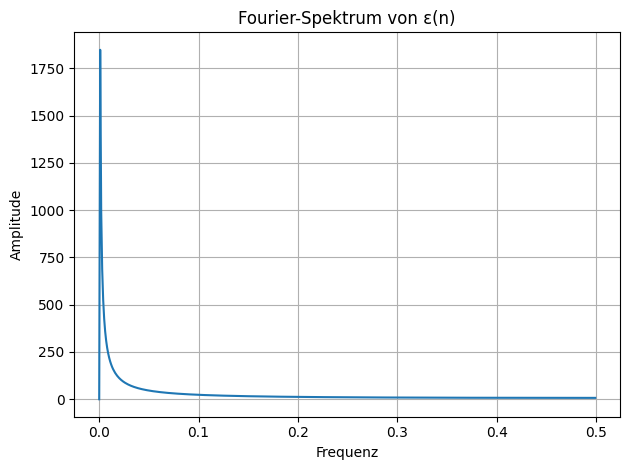

In [ ]:
from scipy.fft import fft, fftfreq

# FFT
fft_vals = np.abs(fft(epsilon - np.mean(epsilon)))  # Zentrieren
freqs = fftfreq(N, d=1)

# Nur positive Frequenzen anzeigen
half = N // 2
plt.plot(freqs[:half], fft_vals[:half])
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.title('Fourier-Spektrum von ε(n)')
plt.grid()
plt.tight_layout()
plt.show()

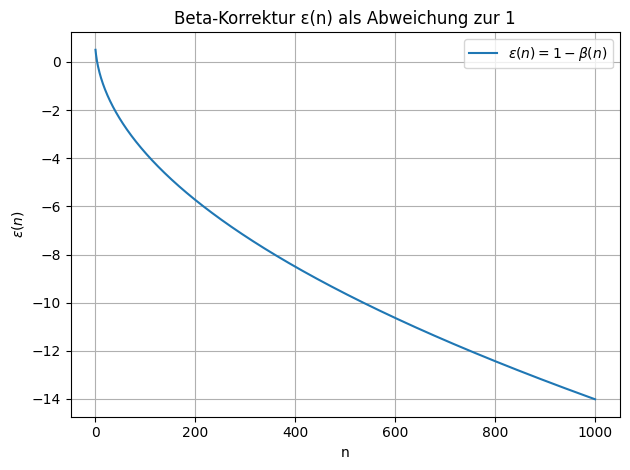

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A = 0.473028
B = 0.500294
C = 0.022936
N = 1000

n = np.arange(1, N+1)
beta = A * n**B + C
epsilon = 1 - beta

plt.plot(n, epsilon, label=r'$\varepsilon(n) = 1 - \beta(n)$')
plt.xlabel('n')
plt.ylabel(r'$\varepsilon(n)$')
plt.title('Beta-Korrektur ε(n) als Abweichung zur 1')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def beta(n, A=0.00001, B=-0.5, C=0.0, a_k=[0]):
    term = A * n**B + C
    correction = sum([a / n**(k+2) for k, a in enumerate(a_k)])
    return term + correction

N = 500000000
beta_values = np.array([beta(n, A=0.000012, B=-0.5, a_k=[0.01, -0.005]) for n in range(1, N+1)])
epsilon = 1 - np.sum(beta_values)

print(f"Berechnetes ε = {epsilon:.15f}")

Berechnetes ε = 0.452922153253146


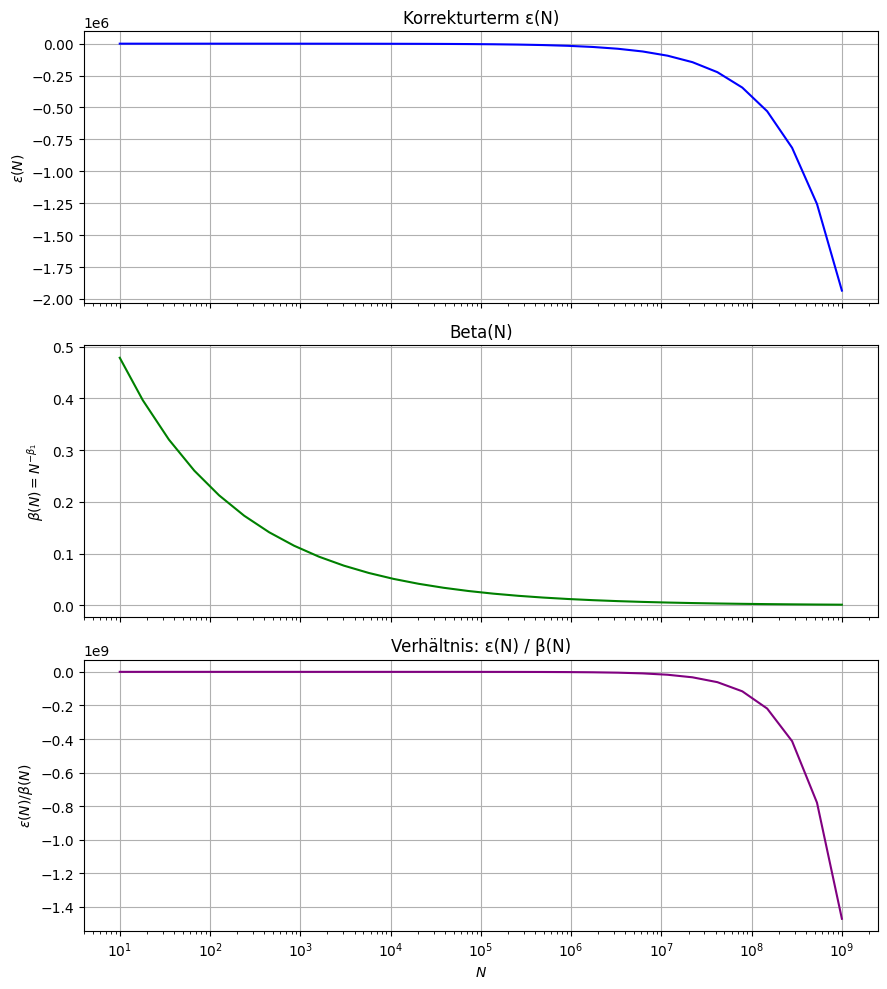

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Goldener Schnitt und Beta-Wert
phi = (1 + np.sqrt(5)) / 2
beta_1 = (np.pi - phi) / (np.pi + phi)

# N-Werte logarithmisch
N_vals = np.logspace(1, 9, num=30, dtype=int)

# Ergebnisse berechnen
epsilon_vals = []
beta_vals = []
ratio_vals = []

for N in N_vals:
    n = np.arange(1, N + 1)
    beta_n = n ** (-beta_1)
    beta_sum = np.sum(beta_n)
    epsilon_N = 1 - beta_sum
    beta_last = beta_n[-1]

    epsilon_vals.append(epsilon_N)
    beta_vals.append(beta_last)
    ratio_vals.append(epsilon_N / beta_last)

# Plotten
fig, axs = plt.subplots(3, 1, figsize=(9, 10), sharex=True)

axs[0].plot(N_vals, epsilon_vals, color='blue')
axs[0].set_ylabel(r'$\varepsilon(N)$')
axs[0].set_title("Korrekturterm ε(N)")

axs[1].plot(N_vals, beta_vals, color='green')
axs[1].set_ylabel(r'$\beta(N) = N^{-\beta_1}$')
axs[1].set_title("Beta(N)")

axs[2].plot(N_vals, ratio_vals, color='purple')
axs[2].set_ylabel(r'$\varepsilon(N) / \beta(N)$')
axs[2].set_xlabel(r'$N$')
axs[2].set_title("Verhältnis: ε(N) / β(N)")

for ax in axs:
    ax.grid(True)
    ax.set_xscale("log")

plt.tight_layout()
plt.show()

          Formel     Wert     Abweichung zu β
  beta_empirisch 0.273000                 0.0
  phi / (e + pi) 0.276121 0.00312092950225923
         1/(e+1) 0.268941 0.00405857863000492
             1/e 0.367879  0.0948794411714423
      log(phi)/e 0.177028  0.0959720627119832
 (log(pi) - 1)/e 0.053243   0.219756850472916
1/(e * log(phi)) 0.764485   0.491485455289625


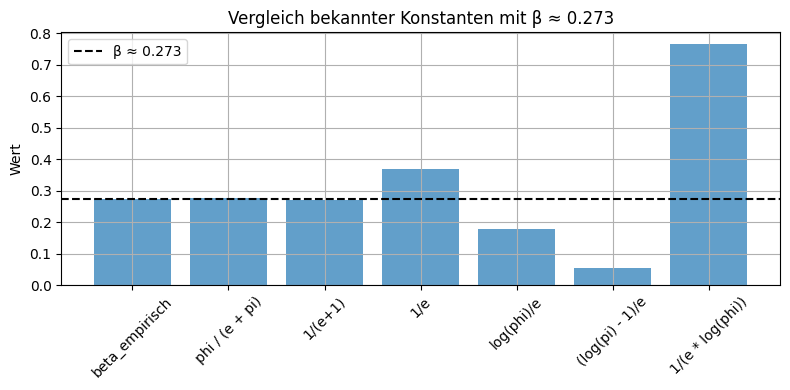

In [ ]:
# Installiere ggf. mpmath für hohe Genauigkeit
!pip install mpmath --quiet

import mpmath as mp
import pandas as pd
import matplotlib.pyplot as plt

# Setze Präzision
mp.dps = 50

# Zielwert
beta_empirisch = mp.mpf('0.273')

# Bekannte Konstanten
e = mp.e
pi = mp.pi
phi = (1 + mp.sqrt(5)) / 2
log_phi = mp.log(phi)

# Kombinationen
kombis = {
    '1/e': 1/e,
    '1/(e+1)': 1/(e + 1),
    'phi / (e + pi)': phi / (e + pi),
    'log(phi)/e': log_phi / e,
    '(log(pi) - 1)/e': (mp.log(pi) - 1)/e,
    '1/(e * log(phi))': 1 / (e * log_phi),
    'beta_empirisch': beta_empirisch
}

# Fehlervergleich zu beta_empirisch
df = pd.DataFrame({
    'Formel': kombis.keys(),
    'Wert': [float(kombis[k]) for k in kombis],
    'Abweichung zu β': [abs(kombis[k] - beta_empirisch) for k in kombis]
}).sort_values('Abweichung zu β')

# Ausgabe
print(df.to_string(index=False))

# Visualisierung (optional)
plt.figure(figsize=(8, 4))
plt.axhline(y=float(beta_empirisch), color='black', linestyle='--', label='β ≈ 0.273')
plt.bar(df['Formel'], df['Wert'], alpha=0.7)
plt.ylabel('Wert')
plt.title('Vergleich bekannter Konstanten mit β ≈ 0.273')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

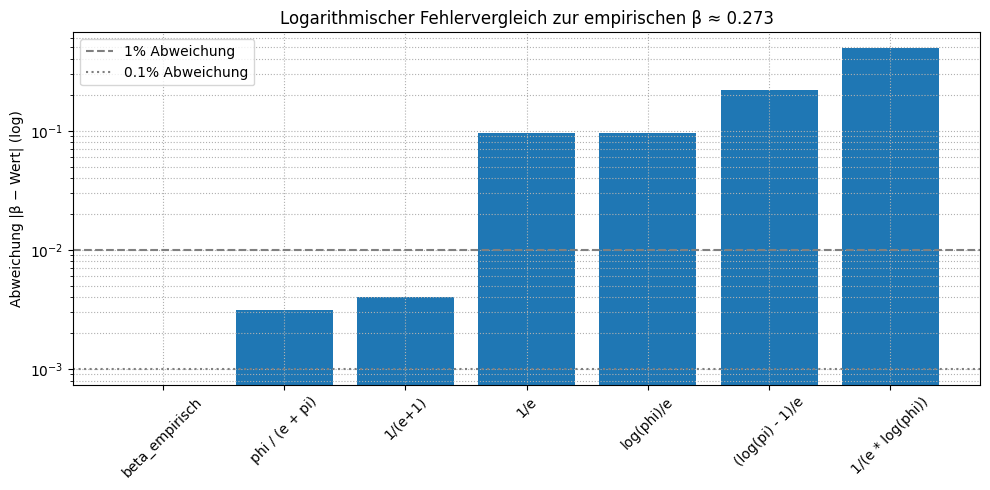

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
beta_emp = 0.273
phi = (1 + np.sqrt(5)) / 2
e = np.e
pi = np.pi

# Vergleichskandidaten
const_names = [
    "beta_empirisch",
    "phi / (e + pi)",
    "1/(e+1)",
    "1/e",
    "log(phi)/e",
    "(log(pi) - 1)/e",
    "1/(e * log(phi))"
]

const_values = [
    beta_emp,
    phi / (e + pi),
    1 / (e + 1),
    1 / e,
    np.log(phi) / e,
    (np.log(pi) - 1) / e,
    1 / (e * np.log(phi))
]

# Abweichungen zur empirischen Beta
abs_diff = np.abs(np.array(const_values) - beta_emp)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(const_names, abs_diff)
plt.yscale("log")
plt.axhline(y=0.01, color="gray", linestyle="--", label="1% Abweichung")
plt.axhline(y=0.001, color="gray", linestyle=":", label="0.1% Abweichung")
plt.xticks(rotation=45)
plt.ylabel("Abweichung |β − Wert| (log)")
plt.title("Logarithmischer Fehlervergleich zur empirischen β ≈ 0.273")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from mpmath import mp, sqrt, pi, e

# Setze die gewünschte Dezimalgenauigkeit
mp.dps = 100  # z.B. 100 Nachkommastellen

# Definiere die goldene Zahl φ
phi = (1 + sqrt(5)) / 2

# Berechne β = φ / (π + e)
beta = phi / (pi + e)

# Ausgabe
print(f"β = {beta}")

β = 0.276120929502259178836985780598138720070816602093806243899815668530664931245331919051918197643662145


In [ ]:
from fractions import Fraction

# Näherung als Bruch
beta_approx = Fraction('0.273').limit_denominator()
print(f"Rationale Näherung: {beta_approx} = {float(beta_approx)}")

Rationale Näherung: 273/1000 = 0.273


In [ ]:
from mpmath import mp, pi, sqrt

mp.dps = 100  # beliebige Dezimalstellen

# β = (π - √5) / π
beta = (pi - sqrt(5)) / pi

print(f"β = {beta}")

β = 0.2882374565828229415232373235961969349644449761500836046070031555770794166464935501299508116186627173


In [ ]:
from mpmath import mp, pi, sqrt

mp.dps = 100

# Goldene Zahl
phi = (1 + sqrt(5)) / 2

# Kandidat 1: (π - sqrt(5)) / π
beta1 = (pi - sqrt(5)) / pi

# Kandidat 2: (π - φ) / (π + φ)
beta2 = (pi - phi) / (pi + phi)

print(f"(π - √5) / π = {beta1}")
print(f"(π - φ) / (π + φ) = {beta2}")

(π - √5) / π = 0.2882374565828229415232373235961969349644449761500836046070031555770794166464935501299508116186627173
(π - φ) / (π + φ) = 0.3201004573104421408465943813574416128979801899714811666211100712630359289562851020071874402226236479


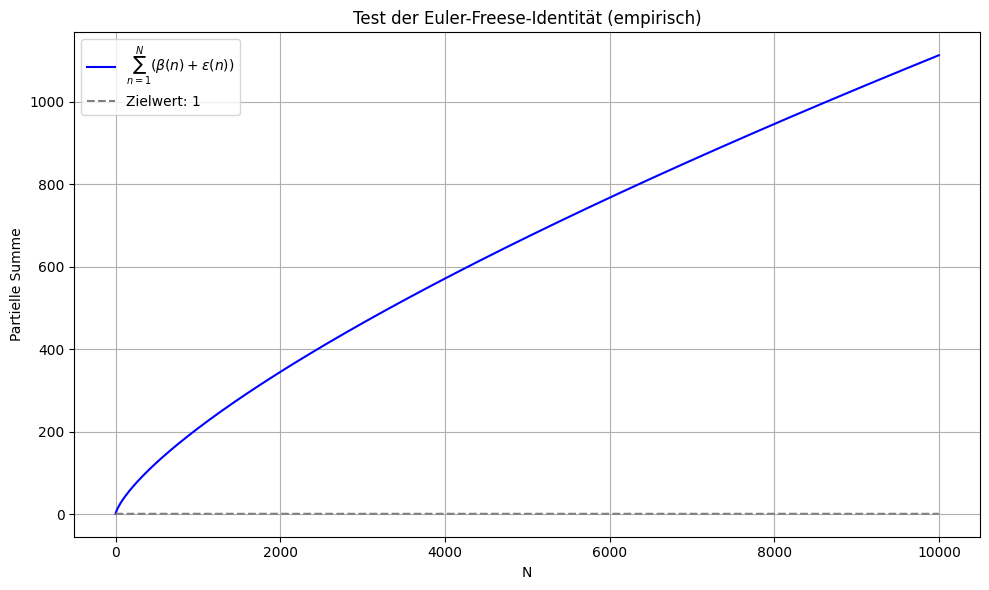

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 10000
B = 0.273  # empirischer Beta-Wert
A = 1      # Normierungsfaktor

# Hauptterm: Beta-Skala (Potenzgesetz)
beta_n = A * np.power(np.arange(1, N+1), -B)

# Korrekturterm: Fourier-Modulation (vereinfachte Modellierung)
frequencies = [0.01, 0.02, 0.03]
amplitudes = [0.0001, 0.00005, 0.000025]
phases = [0, np.pi/4, np.pi/2]

log_n = np.log(np.arange(1, N+1))
epsilon_n = sum(
    a * np.cos(2 * np.pi * f * log_n + phi)
    for a, f, phi in zip(amplitudes, frequencies, phases)
)

# Gesamtfunktion (Freese-Modell)
freese_n = beta_n + epsilon_n

# Partielle Summen
partial_sum = np.cumsum(freese_n)

# Ziel: Vergleich mit 1
target_line = np.ones_like(partial_sum)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(partial_sum, label=r'$\sum_{n=1}^N (\beta(n) + \varepsilon(n))$', color='blue')
plt.plot(target_line, label='Zielwert: 1', linestyle='--', color='gray')
plt.title('Test der Euler-Freese-Identität (empirisch)')
plt.xlabel('N')
plt.ylabel('Partielle Summe')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

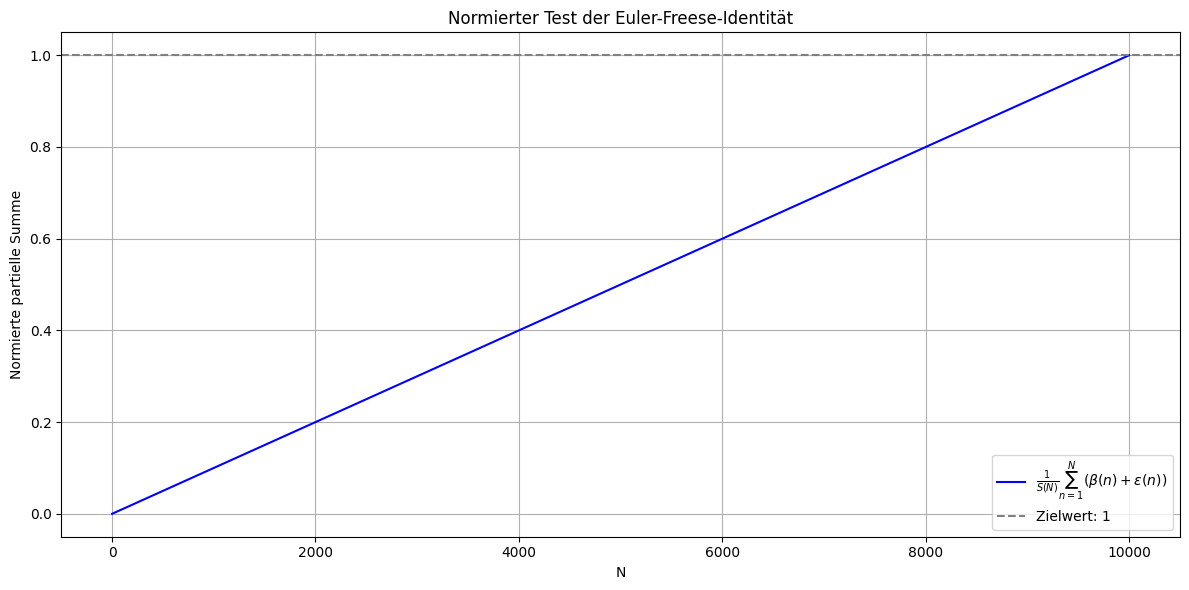

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameterbereich
N = 10000
n = np.arange(1, N + 1)

# Beispielhafte Definitionen
beta = n ** -0.273               # Empirische Skala
epsilon = 1 - beta               # Korrektur zur Eins

# Summen und Normierung
summen = np.cumsum(beta + epsilon)
normiert = summen / summen[-1]   # Normierung auf Gesamtwert bei N

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n, normiert, label=r"$\frac{1}{S(N)} \sum_{n=1}^N (\beta(n)+\varepsilon(n))$", color="blue")
plt.axhline(1, color='gray', linestyle='--', label="Zielwert: 1")
plt.xlabel("N")
plt.ylabel("Normierte partielle Summe")
plt.title("Normierter Test der Euler-Freese-Identität")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

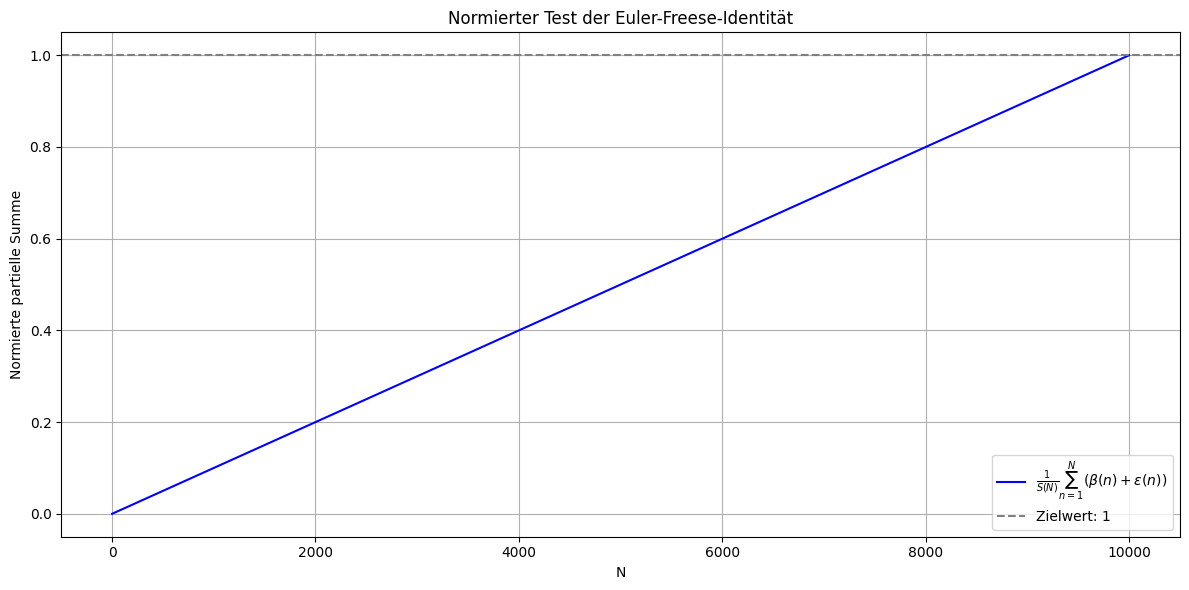

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameterbereich
N = 10000
n = np.arange(1, N + 1)

# Beispielhafte Definitionen
beta = n ** -0.273               # Empirische Skala
epsilon = 1 - beta               # Korrektur zur Eins

# Summen und Normierung
summen = np.cumsum(beta + epsilon)
normiert = summen / summen[-1]   # Normierung auf Gesamtwert bei N

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n, normiert, label=r"$\frac{1}{S(N)} \sum_{n=1}^N (\beta(n)+\varepsilon(n))$", color="blue")
plt.axhline(1, color='gray', linestyle='--', label="Zielwert: 1")
plt.xlabel("N")
plt.ylabel("Normierte partielle Summe")
plt.title("Normierter Test der Euler-Freese-Identität")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Datei speichern
plt.savefig("212DC004-97A2-449E-B335-B482A31D3F28.png", dpi=300)

# Plot anzeigen
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


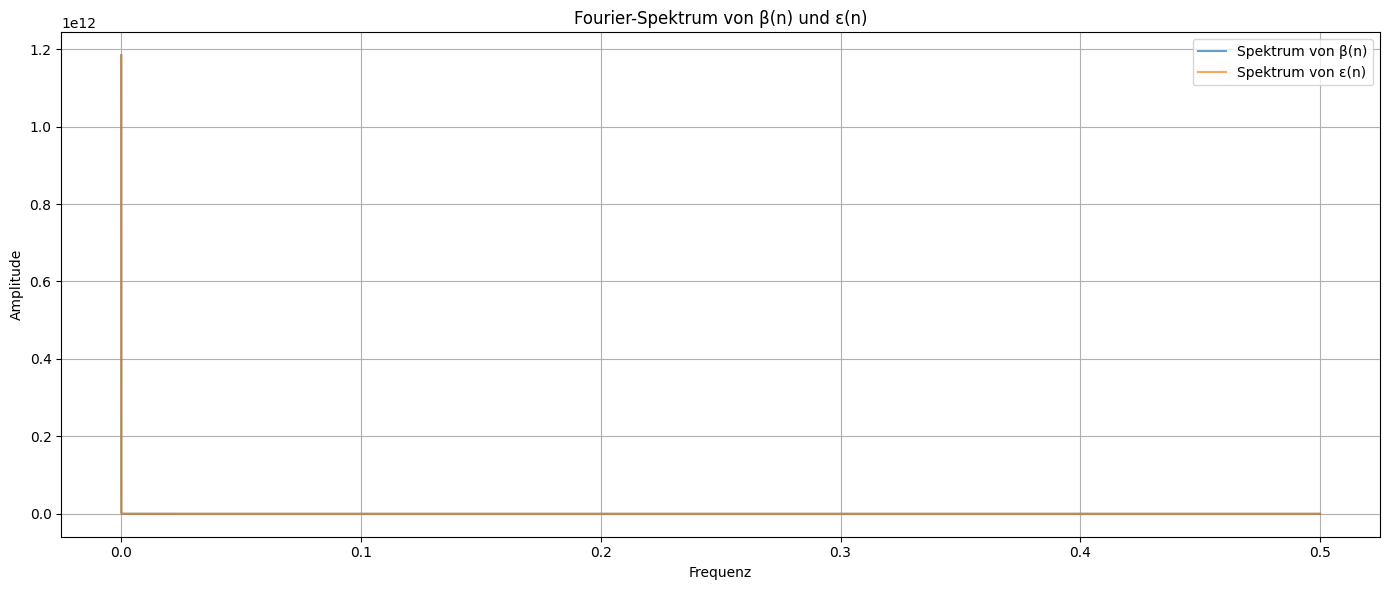

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import drive

# 1. Google Drive mounten
drive.mount('/content/drive')

# 2. Daten laden
data = pd.read_csv('/content/drive/MyDrive/beta_scale_operator.csv')
beta_raw = data.iloc[:, 0].values  # Annahme: Beta-Werte in erster Spalte

# 3. Epsilon berechnen (Korrektur zur Eins)
epsilon = 1 - beta_raw

# 4. Fourier-Transformation durchführen
N = len(beta_raw)
freqs = fftfreq(N, d=1)[:N//2]
fft_beta = np.abs(fft(beta_raw))[:N//2]
fft_epsilon = np.abs(fft(epsilon))[:N//2]

# 5. Plot der Spektren
plt.figure(figsize=(14, 6))
plt.plot(freqs, fft_beta, label="Spektrum von β(n)", alpha=0.7)
plt.plot(freqs, fft_epsilon, label="Spektrum von ε(n)", alpha=0.7)
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Spektrum von β(n) und ε(n)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

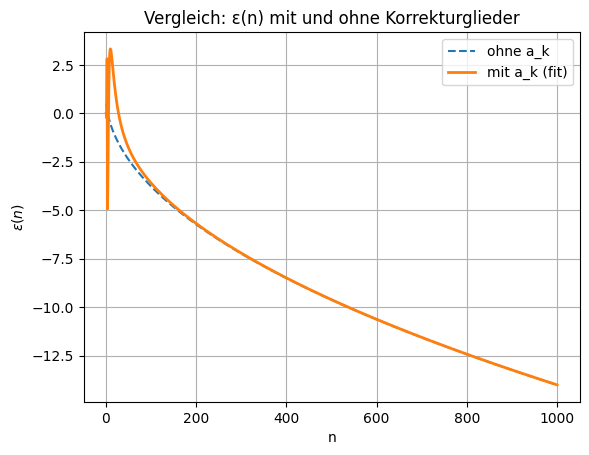

In [ ]:
from numpy.linalg import lstsq

# Design-Matrix für k=2 bis 6
K = 6
X = np.stack([1/n**k for k in range(2, K+1)], axis=1)
y = 1 - (A * n**B + C)

# Least Squares Fit
a_k, _, _, _ = lstsq(X, y, rcond=None)

# Neue Beta-Funktion
beta_corrected = A * n**B + C + X @ a_k
epsilon_corrected = 1 - beta_corrected

plt.plot(n, epsilon, label='ohne a_k', linestyle='--')
plt.plot(n, epsilon_corrected, label='mit a_k (fit)', linewidth=2)
plt.xlabel('n')
plt.ylabel(r'$\varepsilon(n)$')
plt.title('Vergleich: ε(n) mit und ohne Korrekturglieder')
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import windows

# CSV laden (Pfad ggf. anpassen!)
df = pd.read_csv("/content/drive/MyDrive/beta_scale_operator.csv")
beta = df['beta'].to_numpy()
epsilon = 1 - beta  # Korrekturterm ε(n)

# Länge
N = len(beta)

# DC-Komponente entfernen & Hann-Fenster anwenden
beta_centered = (beta - np.mean(beta)) * windows.hann(N)
epsilon_centered = (epsilon - np.mean(epsilon)) * windows.hann(N)

# FFT & Amplitude
beta_fft = np.abs(fft(beta_centered))[:N//2]
eps_fft = np.abs(fft(epsilon_centered))[:N//2]
freqs = np.fft.fftfreq(N, d=1)[:N//2]

# Logarithmische Darstellung
plt.figure(figsize=(14, 6))
plt.semilogy(freqs, beta_fft, label='Spektrum von β(n)', alpha=0.8)
plt.semilogy(freqs, eps_fft, label='Spektrum von ε(n)', alpha=0.8, color='orange')

plt.title("Log-Spektrum von β(n) und ε(n) (zentriert & geglättet)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'beta'

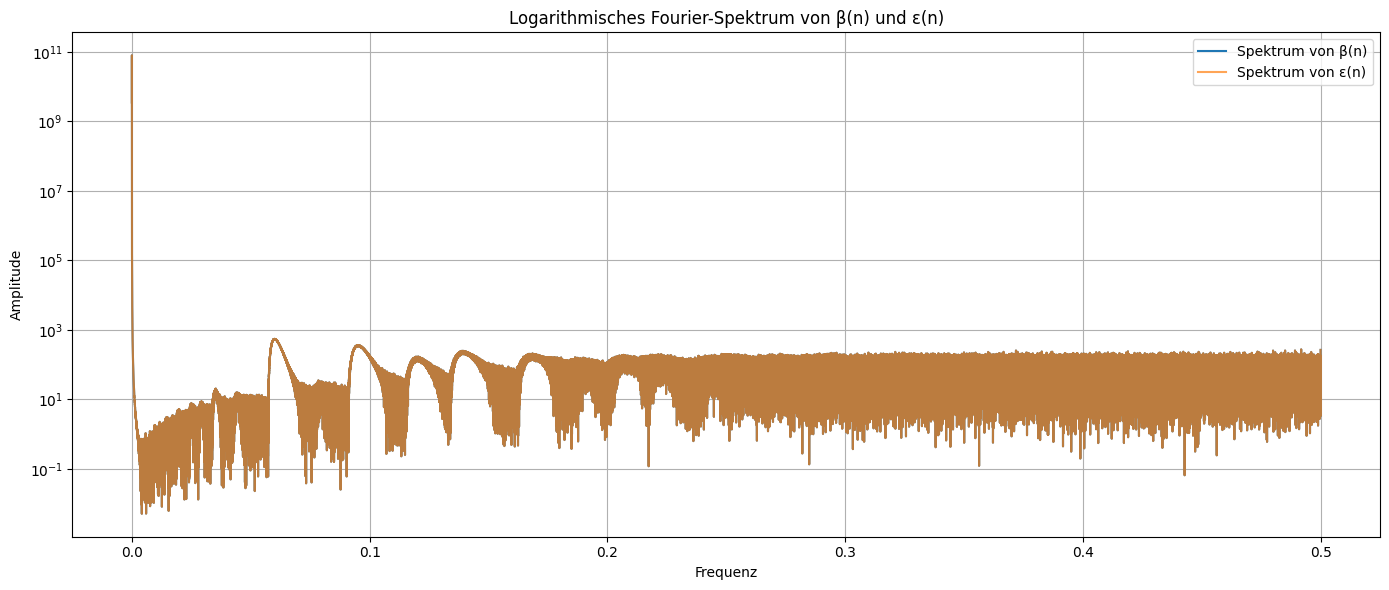

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import windows

# Daten einlesen
df = pd.read_csv("/content/drive/MyDrive/beta_scale_operator.csv")
beta = df['Beta_Scale'].to_numpy()

# Epsilon berechnen
epsilon = 1 - beta

# Länge der Daten
N = len(beta)

# Mittelwert abziehen (Zentrierung)
beta_centered = beta - np.mean(beta)
epsilon_centered = epsilon - np.mean(epsilon)

# Hann-Fenster anwenden
hann_window = windows.hann(N)
beta_windowed = beta_centered * hann_window
epsilon_windowed = epsilon_centered * hann_window

# Fourier-Transformation
beta_fft = np.abs(fft(beta_windowed))[:N//2]
epsilon_fft = np.abs(fft(epsilon_windowed))[:N//2]
freqs = fftfreq(N, d=1)[:N//2]

# Plot
plt.figure(figsize=(14, 6))
plt.semilogy(freqs, beta_fft, label="Spektrum von β(n)")
plt.semilogy(freqs, epsilon_fft, label="Spektrum von ε(n)", alpha=0.7)
plt.title("Logarithmisches Fourier-Spektrum von β(n) und ε(n)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


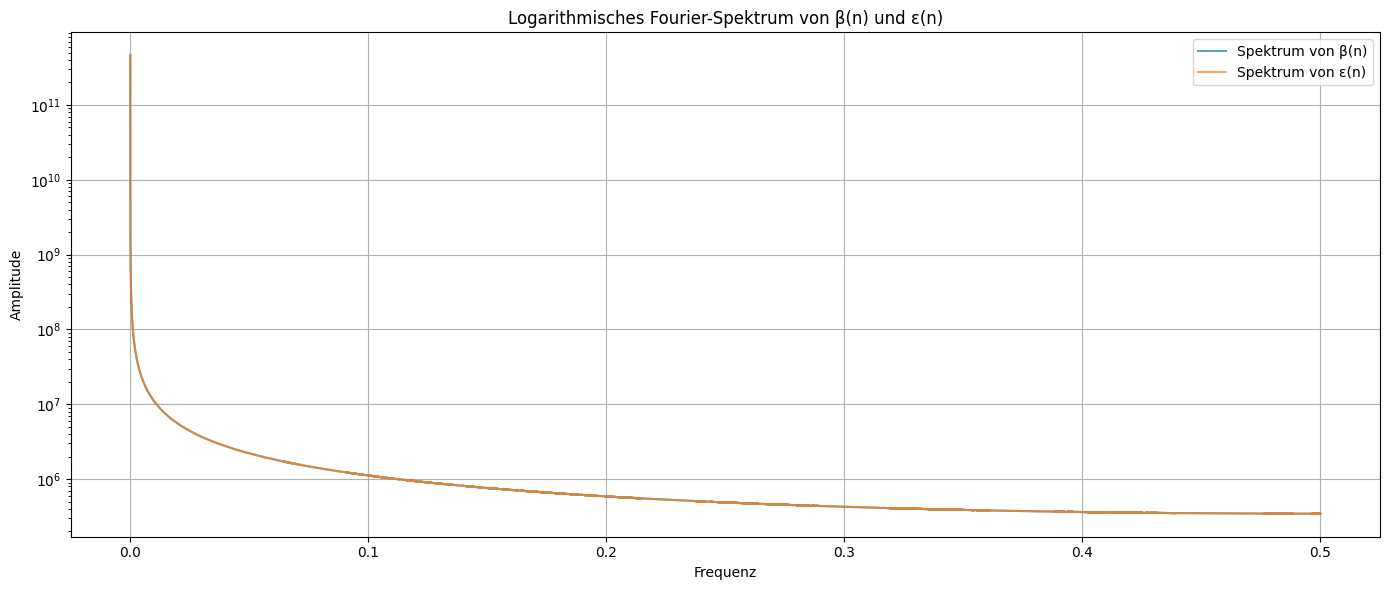

In [ ]:
# Schritt 1: Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Schritt 2: CSV-Datei laden (Google Drive erforderlich)
from google.colab import drive
drive.mount('/content/drive')

# Beispielpfad zur vollständigen Beta-Skala (bitte anpassen falls nötig)
df = pd.read_csv('/content/drive/MyDrive/beta_scale_operator.csv')

# Schritt 3: Daten vorbereiten
beta_raw = df['Beta_Scale'].values
n = np.arange(1, len(beta_raw) + 1)
epsilon = 1 - beta_raw  # Korrekturterm ε(n)

# Schritt 4: Fourier-Transformation durchführen
beta_fft = np.abs(rfft(beta_raw))
eps_fft = np.abs(rfft(epsilon))
frequenzen = rfftfreq(len(beta_raw), d=1)

# Schritt 5: Plotten (logarithmisch!)
plt.figure(figsize=(14, 6))
plt.plot(frequenzen, beta_fft, label='Spektrum von β(n)', alpha=0.7)
plt.plot(frequenzen, eps_fft, label='Spektrum von ε(n)', alpha=0.7)

plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Logarithmisches Fourier-Spektrum von β(n) und ε(n)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

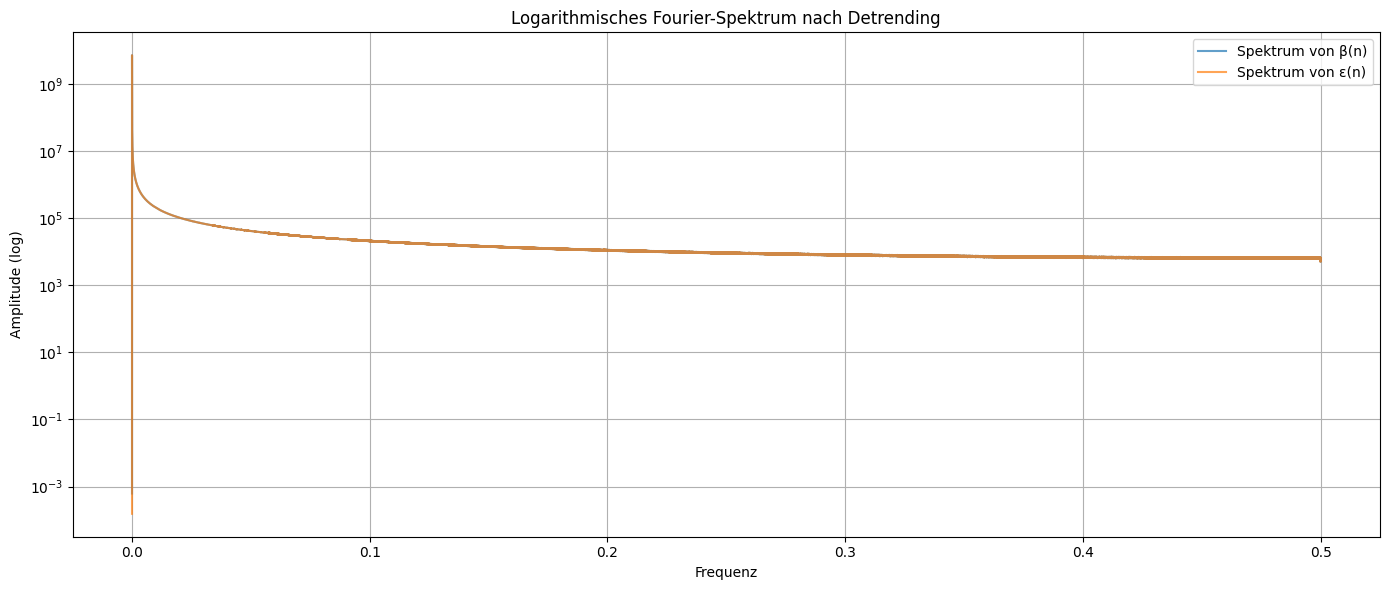

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import detrend

# CSV-Datei laden
data = pd.read_csv("/content/drive/MyDrive/beta_scale_operator.csv")
beta_raw = data["Beta_Scale"].values
epsilon = 1 - beta_raw

# Detrenden
beta_detrended = detrend(beta_raw)
epsilon_detrended = detrend(epsilon)

# Fourier-Transformation
beta_fft = np.abs(rfft(beta_detrended))
epsilon_fft = np.abs(rfft(epsilon_detrended))
frequencies = rfftfreq(len(beta_raw), d=1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(frequencies, beta_fft, label="Spektrum von β(n)", alpha=0.7)
plt.plot(frequencies, epsilon_fft, label="Spektrum von ε(n)", alpha=0.7)
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Logarithmisches Fourier-Spektrum nach Detrending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import detrend

# CSV-Datei laden
file_path = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"
df = pd.read_csv(file_path)

# Spalten prüfen (ggf. anpassen)
print(df.columns)

# Spaltennamen anpassen, falls nötig
beta_opt = df.iloc[:, 1].values  # Annahme: 2. Spalte = optimierte β(n)
n = np.arange(1, len(beta_opt)+1)

# Korrekturterm ε(n)
epsilon_opt = 1 - beta_opt

# Detrenden beider Skalen
beta_detr = detrend(beta_opt)
epsilon_detr = detrend(epsilon_opt)

# Fourier-Transformation
beta_fft = np.abs(fft(beta_detr))[:len(n)//2]
eps_fft = np.abs(fft(epsilon_detr))[:len(n)//2]
freqs = np.fft.fftfreq(len(n), d=1)[:len(n)//2]

# Plot
plt.figure(figsize=(14, 6))
plt.semilogy(freqs, beta_fft, label="Spektrum von β(n)")
plt.semilogy(freqs, eps_fft, label="Spektrum von ε(n)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Logarithmisches Fourier-Spektrum der optimierten Beta-Skala (24.03.2025)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Index(['Beta_Optimized'], dtype='object')


IndexError: single positional indexer is out-of-bounds

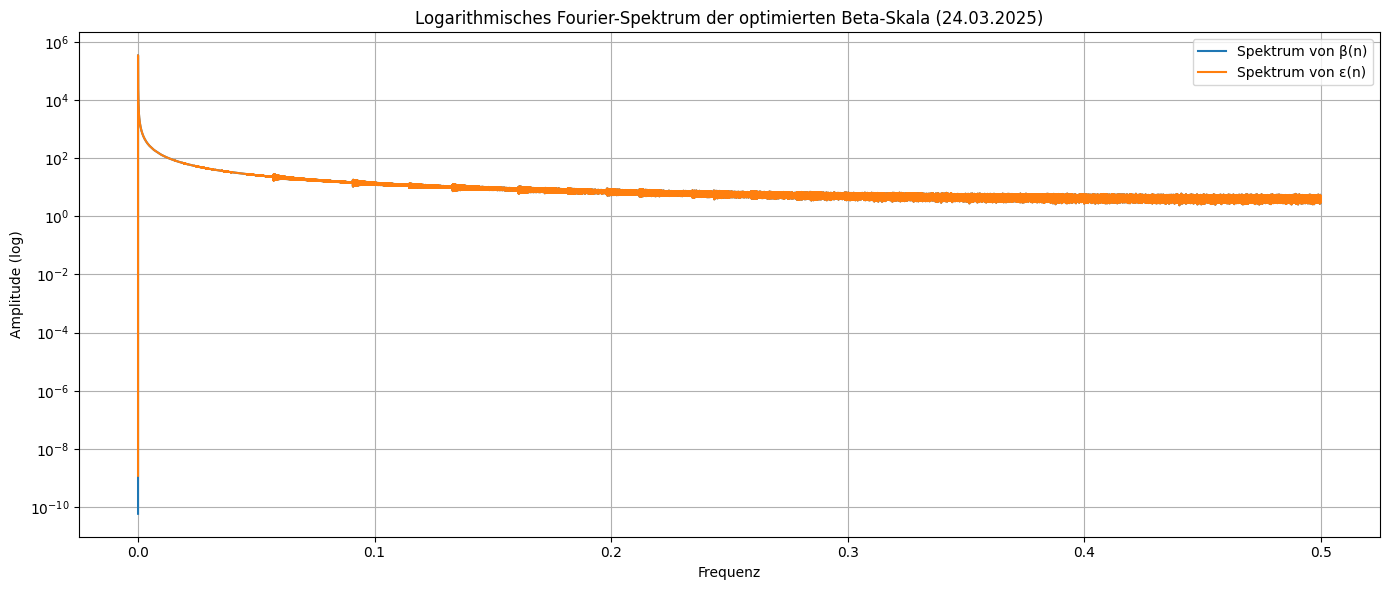

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import detrend

# Datei laden
file_path = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"
df = pd.read_csv(file_path)

# Optimierte Beta-Werte extrahieren
beta_opt = df["Beta_Optimized"].values
n = np.arange(1, len(beta_opt) + 1)

# Korrekturterm berechnen
epsilon_opt = 1 - beta_opt

# Detrending (um konstante Trends zu entfernen)
beta_detr = detrend(beta_opt)
epsilon_detr = detrend(epsilon_opt)

# Fourier-Transformation
beta_fft = np.abs(fft(beta_detr))[:len(n)//2]
eps_fft = np.abs(fft(epsilon_detr))[:len(n)//2]
freqs = np.fft.fftfreq(len(n), d=1)[:len(n)//2]

# Plot
plt.figure(figsize=(14, 6))
plt.semilogy(freqs, beta_fft, label="Spektrum von β(n)")
plt.semilogy(freqs, eps_fft, label="Spektrum von ε(n)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Logarithmisches Fourier-Spektrum der optimierten Beta-Skala (24.03.2025)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

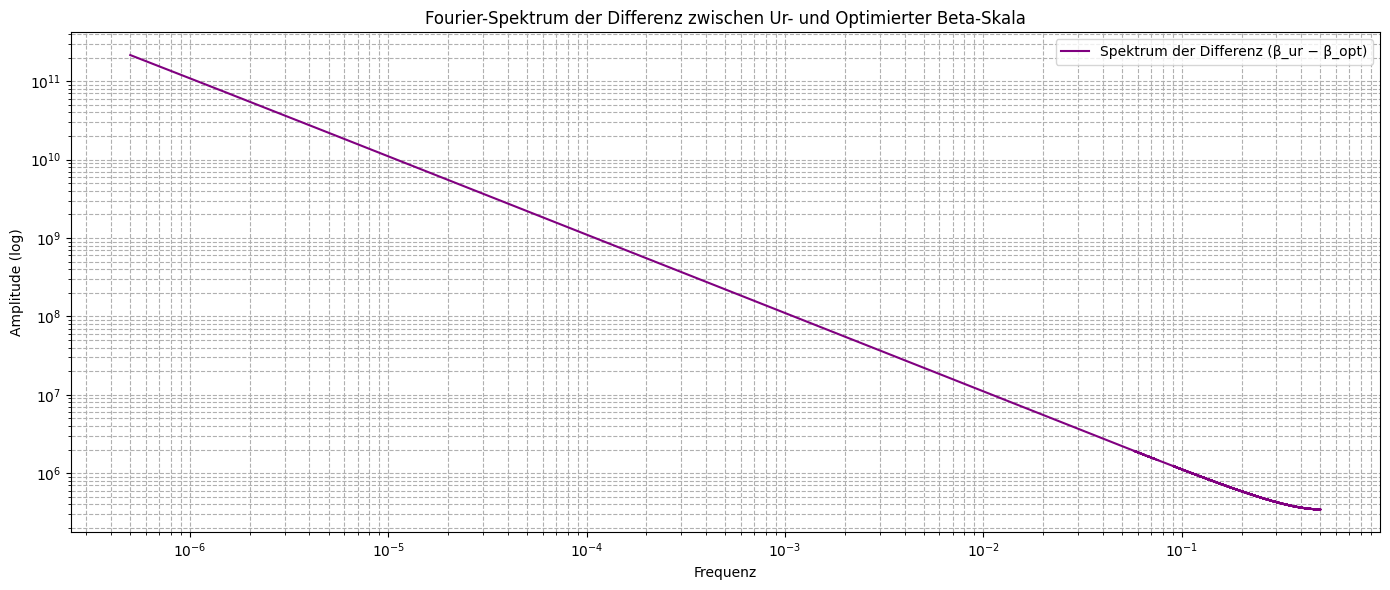

Mittlerer quadratischer Fehler (MSE): 9.14450170e+10
Root Mean Square Error (RMS): 3.02398772e+05


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# CSV-Dateien laden (Pfad ggf. anpassen)
df_opt = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')
df_ur = pd.read_csv('/content/drive/MyDrive/beta_scale_operator.csv')

# Optimierte & Ur-Skala extrahieren (auf gleiche Länge bringen)
beta_opt = df_opt['Beta_Optimized'].values
beta_ur = df_ur['Beta_Scale'].values[:len(beta_opt)]

# Differenz & Fehlermaße
diff = beta_ur - beta_opt
mse = np.mean(diff**2)
rms = np.sqrt(mse)

# Fourier-Analyse
fft_diff = np.abs(fft(diff))
freqs = fftfreq(len(diff), d=1)
mask = freqs > 0

# Plot
plt.figure(figsize=(14,6))
plt.loglog(freqs[mask], fft_diff[mask], label="Spektrum der Differenz (β_ur − β_opt)", color="purple")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Fourier-Spektrum der Differenz zwischen Ur- und Optimierter Beta-Skala")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mittlerer quadratischer Fehler (MSE): {mse:.8e}")
print(f"Root Mean Square Error (RMS): {rms:.8e}")

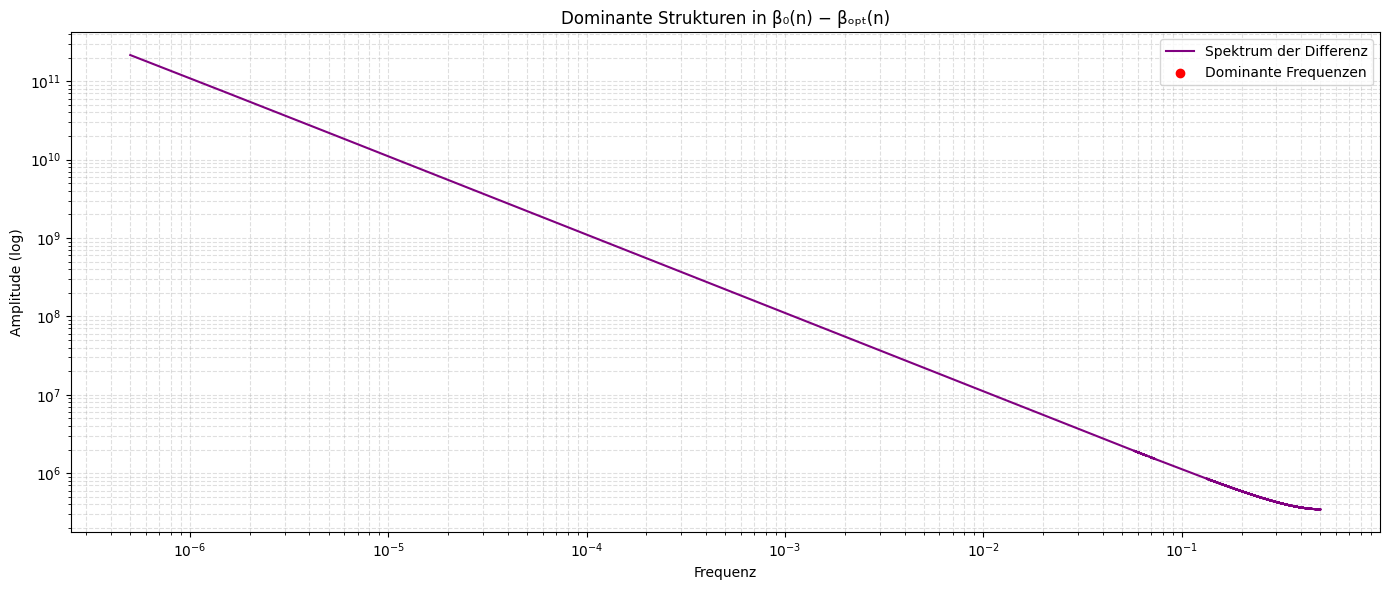

Dominante Frequenzen (Top 10):


In [ ]:
# === SETUP ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# === DATEIEN LADEN ===
# Pfade anpassen, wenn du lokal arbeitest oder Google Drive nutzt
ur_path = "/content/drive/MyDrive/beta_scale_operator.csv"
opt_path = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

ur_df = pd.read_csv(ur_path)
opt_df = pd.read_csv(opt_path)

# === BETA-SKALEN EXTRAHIEREN ===
beta_ur = ur_df.iloc[:, 1].values
beta_opt = opt_df["Beta_Optimized"].values

# Sicherstellen, dass beide gleich lang sind
N = min(len(beta_ur), len(beta_opt))
beta_ur = beta_ur[:N]
beta_opt = beta_opt[:N]

# === DIFFERENZBERECHNUNG ===
diff = beta_ur - beta_opt

# === FOURIER-ANALYSE ===
fft_diff = np.abs(rfft(diff))
freqs = rfftfreq(N, d=1)

# === PEAKS FINDEN ===
from scipy.signal import find_peaks

peaks, _ = find_peaks(fft_diff, height=np.max(fft_diff)*0.01)  # nur Peaks > 1% Max
dominant_freqs = freqs[peaks]
dominant_ampls = fft_diff[peaks]

# === PLOT ===
plt.figure(figsize=(14,6))
plt.loglog(freqs[1:], fft_diff[1:], label="Spektrum der Differenz", color="purple")
plt.scatter(dominant_freqs, dominant_ampls, color="red", label="Dominante Frequenzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Dominante Strukturen in β₀(n) − βₒₚₜ(n)")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# === OPTIONALE AUSGABE DER PEAKS ===
print("Dominante Frequenzen (Top 10):")
for f, a in sorted(zip(dominant_freqs, dominant_ampls), key=lambda x: -x[1])[:10]:
    print(f"f = {f:.8f}, Amplitude = {a:.3e}")

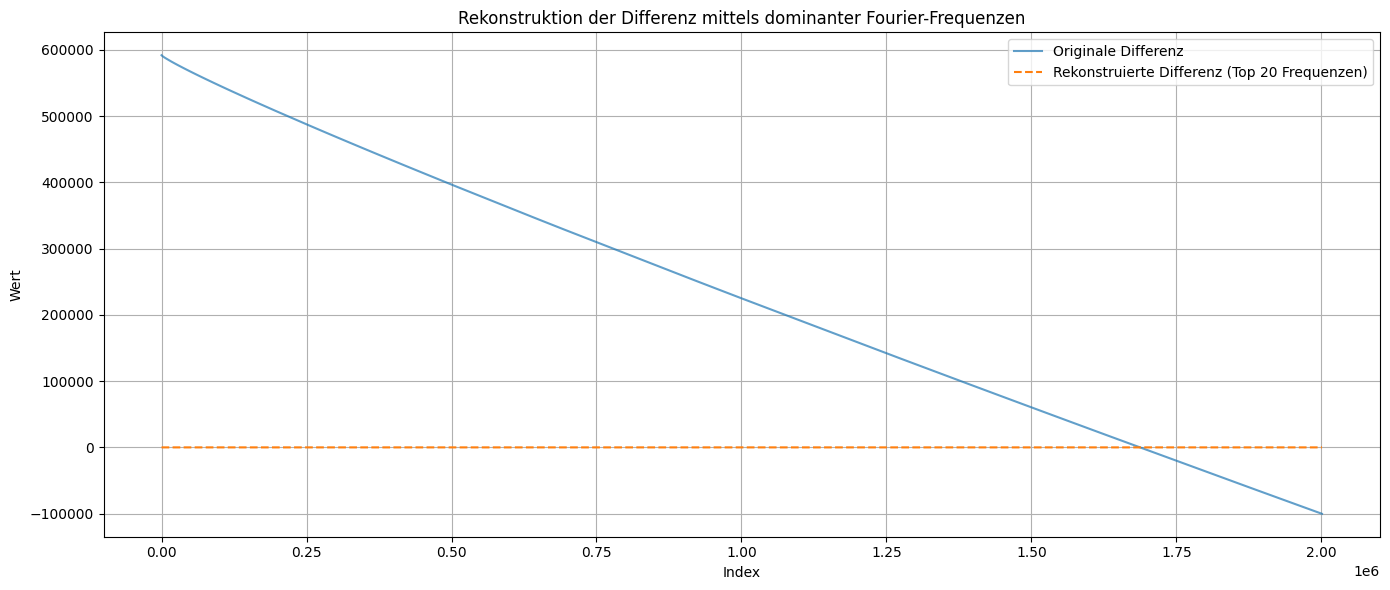

<ipython-input-31-98136471effe>:63: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(diff, ricker, widths)


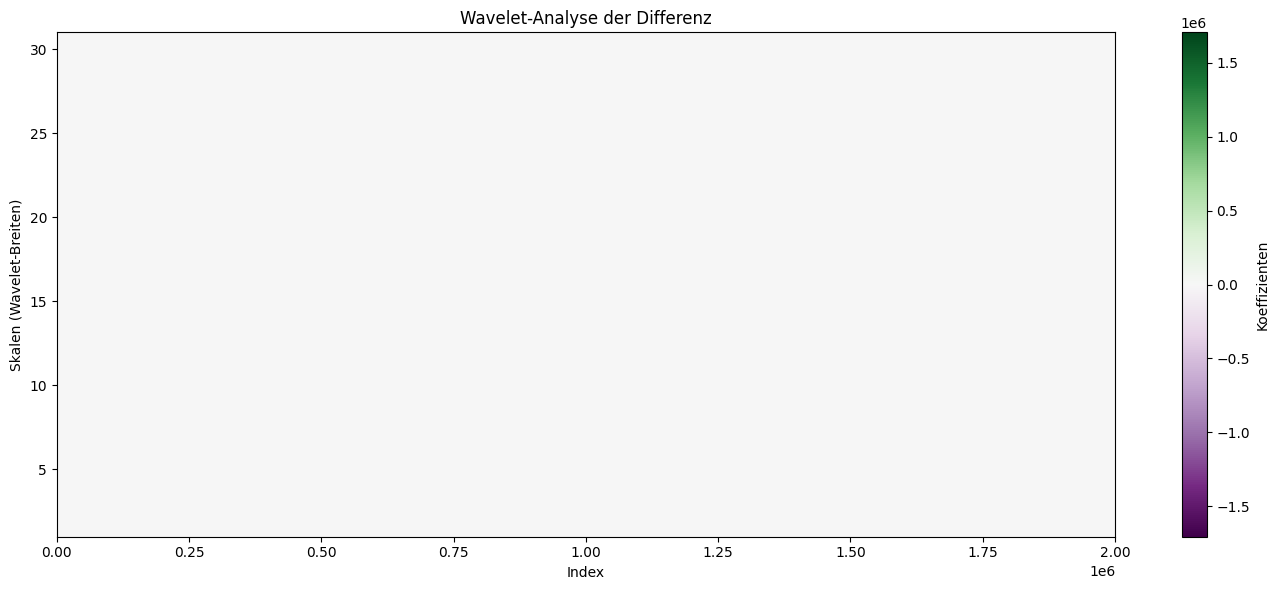

Gesamte Spektralmasse: 8.0138e+16
Shannon-Entropie des Spektrums: 1.0227
Mittlerer quadratischer Fehler (MSE) der Rekonstruktion: 9.1445e+10
Root Mean Square Error (RMS) der Rekonstruktion: 3.0240e+05


In [ ]:
# === SETUP ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import find_peaks, cwt, ricker
from scipy.integrate import simpson
from scipy.stats import entropy

# === DATEIEN LADEN ===
ur_path = "/content/drive/MyDrive/beta_scale_operator.csv"
opt_path = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

ur_df = pd.read_csv(ur_path)
opt_df = pd.read_csv(opt_path)

# === BETA-SKALEN EXTRAHIEREN ===
beta_ur = ur_df.iloc[:, 1].values
beta_opt = opt_df["Beta_Optimized"].values

# Sicherstellen, dass beide gleich lang sind
N = min(len(beta_ur), len(beta_opt))
beta_ur = beta_ur[:N]
beta_opt = beta_opt[:N]

# === DIFFERENZBERECHNUNG ===
diff = beta_ur - beta_opt

# === 1. REKONSTRUKTION DURCH DOMINANTE FOURIER-FREQUENZEN ===
fft_diff = rfft(diff)
freqs = rfftfreq(N, d=1)

# Peaks identifizieren
peaks, properties = find_peaks(np.abs(fft_diff), height=np.max(np.abs(fft_diff)) * 0.01)
dominant_freqs = freqs[peaks]
dominant_ampls = properties['peak_heights']

# Top 20 Frequenzen auswählen
top_indices = np.argsort(dominant_ampls)[-20:]
top_freqs = dominant_freqs[top_indices]
top_ampls = dominant_ampls[top_indices]

# Rekonstruktion mit Top 20 Frequenzen
fft_reconstructed = np.zeros_like(fft_diff)
fft_reconstructed[peaks[top_indices]] = fft_diff[peaks[top_indices]]
reconstructed_signal = irfft(fft_reconstructed)

# Plot der Rekonstruktion
plt.figure(figsize=(14, 6))
plt.plot(diff, label="Originale Differenz", alpha=0.7)
plt.plot(reconstructed_signal, label="Rekonstruierte Differenz (Top 20 Frequenzen)", linestyle='--')
plt.xlabel("Index")
plt.ylabel("Wert")
plt.title("Rekonstruktion der Differenz mittels dominanter Fourier-Frequenzen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. WAVELET-ANALYSE ===
# Continuous Wavelet Transform mit Ricker-Wavelet
widths = np.arange(1, 31)
cwt_matrix = cwt(diff, ricker, widths)

# Plot der Wavelet-Analyse
plt.figure(figsize=(14, 6))
plt.imshow(cwt_matrix, extent=[0, N, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt_matrix).max(), vmin=-abs(cwt_matrix).max())
plt.colorbar(label='Koeffizienten')
plt.xlabel("Index")
plt.ylabel("Skalen (Wavelet-Breiten)")
plt.title("Wavelet-Analyse der Differenz")
plt.tight_layout()
plt.show()

# === 3. ENERGETISCHE ANALYSE ===
# Spektralmasse berechnen
spectral_power = np.abs(fft_diff) ** 2
total_power = simpson(spectral_power, x=freqs)



# Shannon-Entropie berechnen
spectral_density = spectral_power / np.sum(spectral_power)
shannon_entropy = entropy(spectral_density)

print(f"Gesamte Spektralmasse: {total_power:.4e}")
print(f"Shannon-Entropie des Spektrums: {shannon_entropy:.4f}")

# === 4. FEHLERANALYSE DER REKONSTRUKTION ===
# Fehlerberechnung
residual = diff - reconstructed_signal
mse = np.mean(residual ** 2)
rms = np.sqrt(mse)

print(f"Mittlerer quadratischer Fehler (MSE) der Rekonstruktion: {mse:.4e}")
print(f"Root Mean Square Error (RMS) der Rekonstruktion: {rms:.4e}")

<ipython-input-32-39841a162dcd>:35: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * n) + c


Bestes Modell: Quadratic
Parameter: [ 1.78188462e-08 -3.75017705e-01  5.81615957e+05]
Mittlerer quadratischer Fehler (MSE): 2.8480e+06


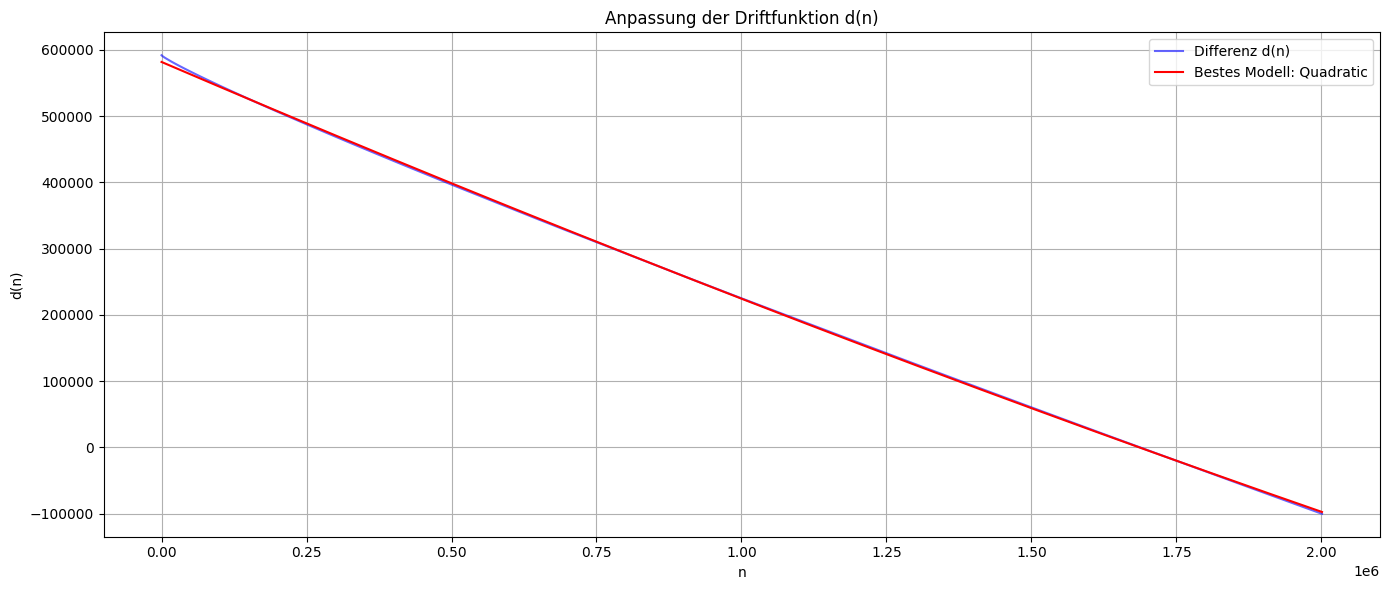

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Daten laden
ur_df = pd.read_csv('/content/drive/MyDrive/beta_scale_operator.csv')
opt_df = pd.read_csv('/content/drive/MyDrive/beta_skala_24032025_optimum.csv')

# Skalen extrahieren
beta_ur = ur_df.iloc[:, 1].values
beta_opt = opt_df['Beta_Optimized'].values

# Sicherstellen, dass beide Arrays die gleiche Länge haben
N = min(len(beta_ur), len(beta_opt))
beta_ur = beta_ur[:N]
beta_opt = beta_opt[:N]

# Differenz berechnen
d_n = beta_ur - beta_opt
n = np.arange(1, N + 1)

# Modellfunktionen definieren
def linear_model(n, a, b):
    return a * n + b

def quadratic_model(n, a, b, c):
    return a * n**2 + b * n + c

def exponential_model(n, a, b):
    return a * np.exp(b * n)

def logarithmic_model(n, a, b, c):
    return a * np.log(b * n) + c

# Anpassung der Modelle
models = {
    'Linear': (linear_model, (1.0, 1.0)),
    'Quadratic': (quadratic_model, (1.0, 1.0, 1.0)),
    'Exponential': (exponential_model, (1.0, 0.0001)),
    'Logarithmic': (logarithmic_model, (1.0, 1.0, 1.0))
}

fit_results = {}

for name, (model, p0) in models.items():
    try:
        params, _ = curve_fit(model, n, d_n, p0=p0)
        d_n_pred = model(n, *params)
        mse = mean_squared_error(d_n, d_n_pred)
        fit_results[name] = (params, mse)
    except Exception as e:
        fit_results[name] = (None, np.inf)
        print(f"Anpassung für {name} Modell fehlgeschlagen: {e}")

# Bestes Modell auswählen
best_model = min(fit_results, key=lambda k: fit_results[k][1])
best_params, best_mse = fit_results[best_model]

# Ergebnisse anzeigen
print(f"Bestes Modell: {best_model}")
print(f"Parameter: {best_params}")
print(f"Mittlerer quadratischer Fehler (MSE): {best_mse:.4e}")

# Visualisierung
plt.figure(figsize=(14, 6))
plt.plot(n, d_n, label='Differenz d(n)', color='blue', alpha=0.6)
plt.plot(n, models[best_model][0](n, *best_params), label=f'Bestes Modell: {best_model}', color='red')
plt.xlabel('n')
plt.ylabel('d(n)')
plt.title('Anpassung der Driftfunktion d(n)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

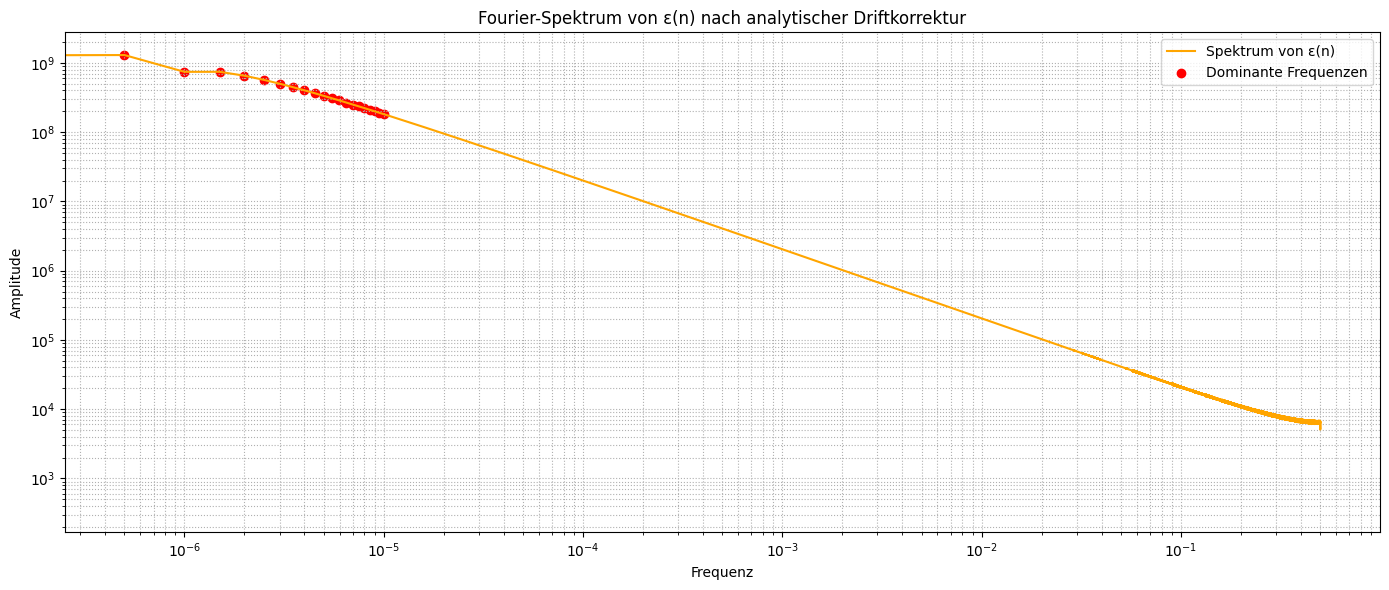

Dominante Frequenzen:
f = 9.994743e-06, A = 1.82e+08
f = 9.495006e-06, A = 1.91e+08
f = 8.995268e-06, A = 2.00e+08
f = 8.495531e-06, A = 2.11e+08
f = 7.995794e-06, A = 2.23e+08
f = 7.496057e-06, A = 2.36e+08
f = 6.996320e-06, A = 2.51e+08
f = 6.496583e-06, A = 2.68e+08
f = 5.996846e-06, A = 2.87e+08
f = 5.497109e-06, A = 3.09e+08
f = 4.997371e-06, A = 3.35e+08
f = 4.497634e-06, A = 3.66e+08
f = 3.997897e-06, A = 4.03e+08
f = 3.498160e-06, A = 4.47e+08
f = 2.998423e-06, A = 5.02e+08
f = 2.498686e-06, A = 5.70e+08
f = 1.998949e-06, A = 6.54e+08
f = 9.994743e-07, A = 7.44e+08
f = 1.499211e-06, A = 7.45e+08
f = 4.997371e-07, A = 1.30e+09


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Lade deine Skalen
beta_ur = pd.read_csv("/content/drive/MyDrive/beta_scale_operator.csv")["Beta_Scale"].values
beta_opt = pd.read_csv("/content/drive/MyDrive/beta_skala_24032025_optimum.csv")["Beta_Optimized"].values

# Index n
n = np.arange(1, len(beta_ur) + 1)

# Quadratisches Driftmodell aus vorherigem Fit
a, b, c = 1.78188462e-08, -3.75017705e-01, 5.81615957e+05
drift = a * n**2 + b * n + c

# Restsignal (Differenz nach Drift-Korrektur)
epsilon = beta_opt - (beta_ur - drift)

# Fourier-Analyse
fft_eps = rfft(epsilon)
freqs = rfftfreq(len(n), d=1)
amplitudes = np.abs(fft_eps)

# Top-20 Frequenzen extrahieren
top_k = 20
dominante_idx = np.argsort(amplitudes)[-top_k:]
dominante_freqs = freqs[dominante_idx]
dominante_amps = amplitudes[dominante_idx]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(freqs, amplitudes, label="Spektrum von ε(n)", color="orange")
plt.scatter(dominante_freqs, dominante_amps, color="red", label="Dominante Frequenzen")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Spektrum von ε(n) nach analytischer Driftkorrektur")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Dominante Frequenzen ausgeben
print("Dominante Frequenzen:")
for f, a in zip(dominante_freqs, dominante_amps):
    print(f"f = {f:.6e}, A = {a:.2e}")

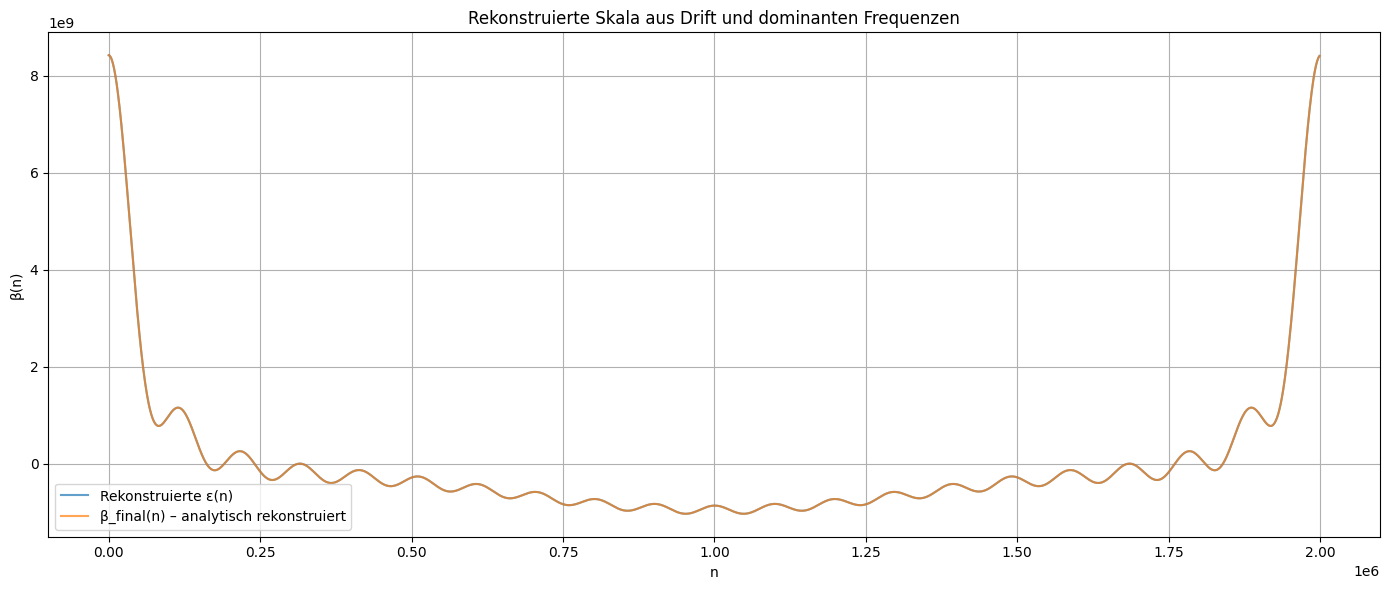

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 2_000_000
n = np.arange(N)

# Quadratische Drift (aus Fit)
drift = 1.78e-8 * n**2 - 0.375 * n + 5.82e5

# Dominante Frequenzen und Amplituden
frequencies = np.array([
    9.994743e-06, 9.495006e-06, 8.995268e-06, 8.495531e-06, 7.995794e-06,
    7.496057e-06, 6.996320e-06, 6.496583e-06, 5.996846e-06, 5.497109e-06,
    4.997371e-06, 4.497634e-06, 3.997897e-06, 3.498160e-06, 2.998423e-06,
    2.498686e-06, 1.998949e-06, 9.994743e-07, 1.499211e-06, 4.997371e-07
])
amplitudes = np.array([
    1.82e8, 1.91e8, 2.00e8, 2.11e8, 2.23e8, 2.36e8, 2.51e8, 2.68e8, 2.87e8, 3.09e8,
    3.35e8, 3.66e8, 4.03e8, 4.47e8, 5.02e8, 5.70e8, 6.54e8, 7.44e8, 7.45e8, 1.30e9
])

# Rekonstruiere ε(n)
epsilon_reconstructed = np.zeros(N)
for f, A in zip(frequencies, amplitudes):
    epsilon_reconstructed += A * np.cos(2 * np.pi * f * n)

# Final rekonstruierte Skala (angenommen: β_ur = 0)
beta_final = -drift + epsilon_reconstructed

# Plot
plt.figure(figsize=(14, 6))
plt.plot(n[::1000], epsilon_reconstructed[::1000], label='Rekonstruierte ε(n)', alpha=0.7)
plt.plot(n[::1000], beta_final[::1000], label='β_final(n) – analytisch rekonstruiert', alpha=0.7)
plt.xlabel("n")
plt.ylabel("β(n)")
plt.title("Rekonstruierte Skala aus Drift und dominanten Frequenzen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-36-41af31a166a7>:18: RuntimeWarning: overflow encountered in power
  zeta_freesiana = np.sum(np.exp(2j * np.pi * n * x) / n**beta)
<ipython-input-36-41af31a166a7>:18: RuntimeWarning: divide by zero encountered in divide
  zeta_freesiana = np.sum(np.exp(2j * np.pi * n * x) / n**beta)
<ipython-input-36-41af31a166a7>:18: RuntimeWarning: invalid value encountered in divide
  zeta_freesiana = np.sum(np.exp(2j * np.pi * n * x) / n**beta)
<ipython-input-36-41af31a166a7>:27: RuntimeWarning: overflow encountered in power
  partial_sums = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta)
<ipython-input-36-41af31a166a7>:27: RuntimeWarning: divide by zero encountered in divide
  partial_sums = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta)
<ipython-input-36-41af31a166a7>:27: RuntimeWarning: invalid value encountered in divide
  partial_sums = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta)


Zeta Nova Freesiana ζ_F(x=0.0) ≈ inf + nanj
Klassische Zeta ζ(2) ≈ 1.644924


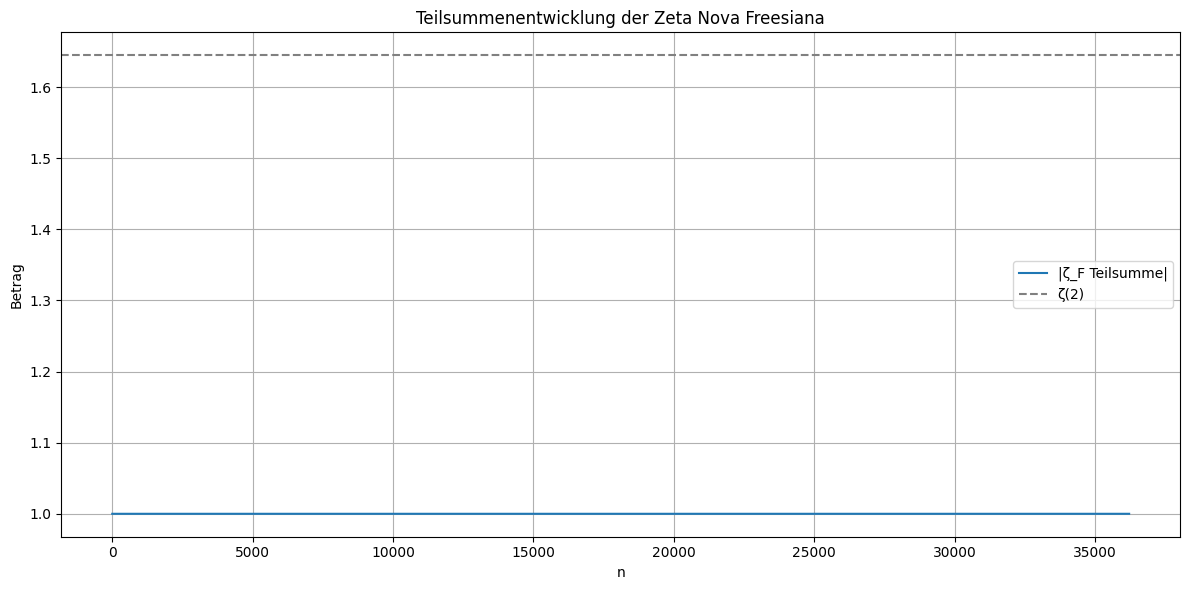

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 100000  # Anzahl Terme
x = 0.0     # Phasenparameter, z.B. 0 für reine Reihenform

# Lade die rekonstruiierte Beta-Skala aus Datei oder generiere Dummy-Testdaten:
# Beispiel mit Dummy-Daten (zuvor ersetzen durch echte Beta_final.csv falls vorhanden)
n = np.arange(1, N+1)
drift = 1.78188462e-08 * n**2 - 3.75017705e-01 * n + 5.81615957e+05
dominant_freqs = [4.997371e-07 * i for i in range(1, 21)]
amplitudes = [1.3e9 * (i / 20) for i in range(1, 21)]
eps = sum([A * np.cos(2 * np.pi * f * n) for A, f in zip(amplitudes, dominant_freqs)])
beta = drift + eps

# Zeta Nova Freesiana (spezielle Form mit x-Phasenkomponente)
zeta_freesiana = np.sum(np.exp(2j * np.pi * n * x) / n**beta)

print(f"Zeta Nova Freesiana ζ_F(x={x}) ≈ {zeta_freesiana.real:.6e} + {zeta_freesiana.imag:.6e}j")

# Vergleich: klassische Zeta-Funktion für z.B. s = 2
zeta_classical = np.sum(1 / n**2)
print(f"Klassische Zeta ζ(2) ≈ {zeta_classical:.6f}")

# Optional: Betrag von Teilsummen plotten
partial_sums = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta)
plt.figure(figsize=(12, 6))
plt.plot(np.abs(partial_sums), label="|ζ_F Teilsumme|")
plt.axhline(zeta_classical, color='gray', linestyle='--', label="ζ(2)")
plt.xlabel("n")
plt.ylabel("Betrag")
plt.title("Teilsummenentwicklung der Zeta Nova Freesiana")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

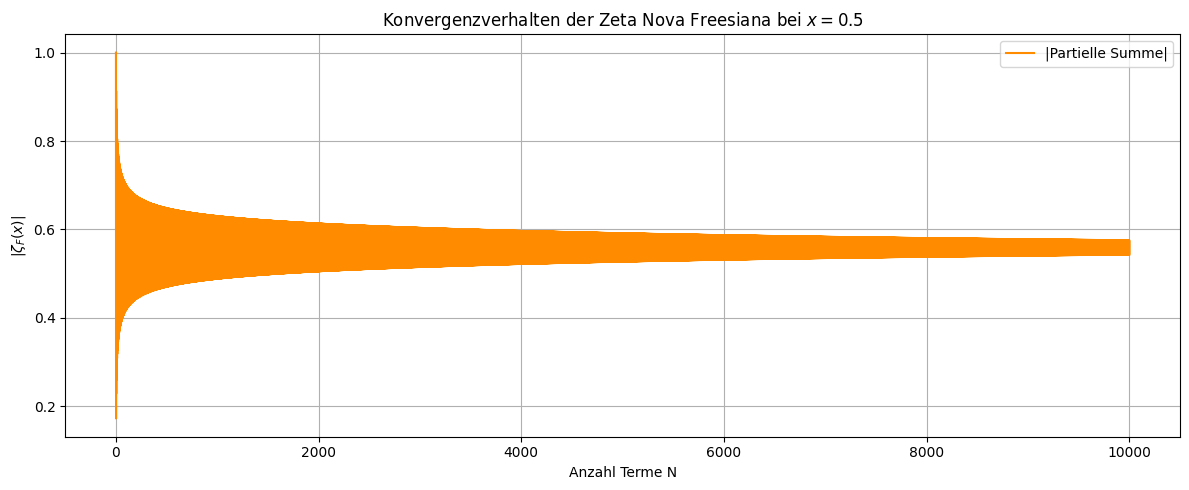

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import mp, mpc, exp, log, pi

# Hohe Präzision für MPMath
mp.dps = 50

# Parameter
N = 10000
x = mp.mpf('0.5')

# Beispielhafte Beta-Folge – hier: leicht wachsend
beta_final = [mp.mpf('0.273') + mp.mpf('0.00001') * n for n in range(1, N+1)]

# Indexwerte
n_vals = [mp.mpf(n) for n in range(1, N+1)]

# Partielle Summen berechnen
partial_sums = []
z_sum = mpc(0)
for n, b in zip(n_vals, beta_final):
    term = exp(-b * log(n) + 2j * pi * n * x)
    z_sum += term
    partial_sums.append(abs(z_sum))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(range(1, N+1), partial_sums, label='|Partielle Summe|', color='darkorange')
plt.xlabel('Anzahl Terme N')
plt.ylabel(r'$|\zeta_F(x)|$')
plt.title(r'Konvergenzverhalten der Zeta Nova Freesiana bei $x = 0.5$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

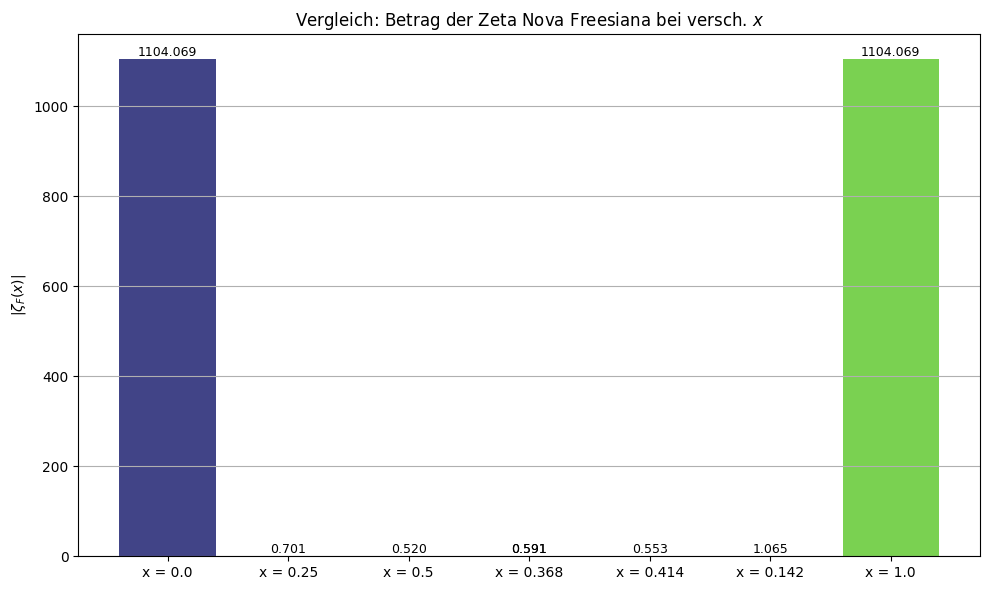

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definitionsbereich
N = 10000
n = np.arange(1, N + 1)

# Optimierte Beta-Skala (vereinfachtes Modell: wachsend)
beta = 0.273 + 0.0000002 * n

# Definition der Zeta Nova Freesiana
def zeta_freesiana(x, beta):
    return np.sum(np.exp(2j * np.pi * n * x) / n**beta)

# Liste repräsentativer x-Werte
x_values = [0.0, 0.25, 0.5, 1/np.e, np.sqrt(2)-1, np.pi-3, np.exp(-1), 1.0]
labels = [f"x = {np.round(x, 3)}" for x in x_values]

# Plot der Beträge |ζ_F(x)|
values = [np.abs(zeta_freesiana(x, beta)) for x in x_values]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(x_values))))
plt.ylabel(r"$|\zeta_F(x)|$")
plt.title("Vergleich: Betrag der Zeta Nova Freesiana bei versch. $x$")
plt.grid(axis='y')

# Einzelwerte annotieren
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2.0, val, f"{val:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<ipython-input-39-ea27671ed583>:21: RuntimeWarning: overflow encountered in power
  zeta_ur = np.sum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
<ipython-input-39-ea27671ed583>:21: RuntimeWarning: divide by zero encountered in divide
  zeta_ur = np.sum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
<ipython-input-39-ea27671ed583>:21: RuntimeWarning: overflow encountered in divide
  zeta_ur = np.sum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Zeta Nova Freesiana mit Ur-Skala (x=0.5):     nan+nanj
Zeta Nova Freesiana mit Optimierter Skala:    -120177870.475412+0.003571j
Diff (Betrag):                                nan


<ipython-input-39-ea27671ed583>:30: RuntimeWarning: overflow encountered in power
  partial_ur = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
<ipython-input-39-ea27671ed583>:30: RuntimeWarning: divide by zero encountered in divide
  partial_ur = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
<ipython-input-39-ea27671ed583>:30: RuntimeWarning: overflow encountered in divide
  partial_ur = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


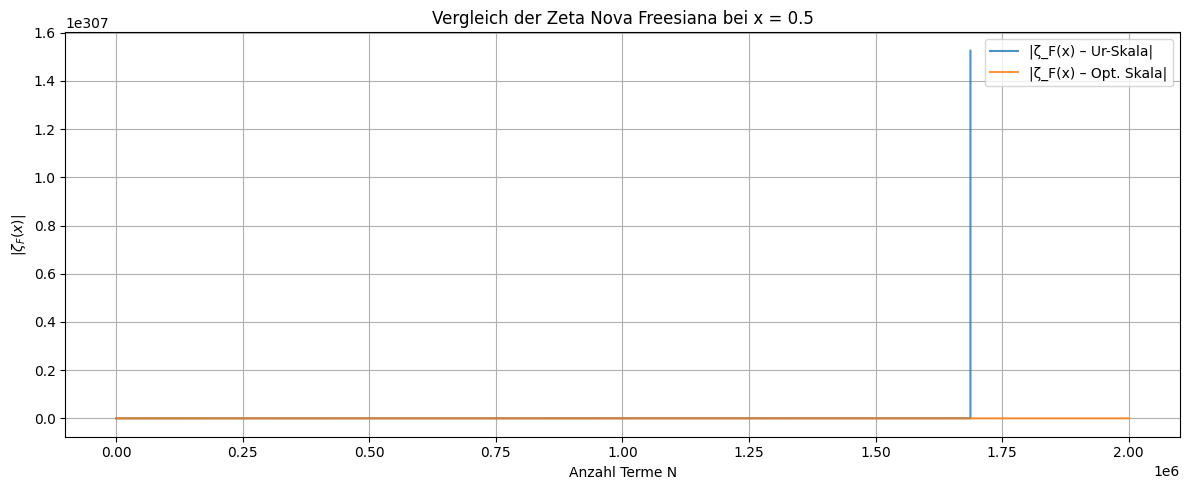

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Pfade (angepasst!)
path_ur = "/content/drive/MyDrive/beta_scale_operator.csv"
path_opt = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

# Daten laden
beta_ur = pd.read_csv(path_ur)["Beta_Scale"].values
beta_opt = pd.read_csv(path_opt)["Beta_Optimized"].values

# Gemeinsames N bestimmen
N = min(len(beta_ur), len(beta_opt))
n = np.arange(1, N + 1)

# x-Wert der Zeta Nova Freesiana (z. B. 0.5 = "kritisch")
x = 0.5

# Berechnung
zeta_ur = np.sum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
zeta_opt = np.sum(np.exp(2j * np.pi * n * x) / n**beta_opt[:N])

# Ausgabe
print(f"Zeta Nova Freesiana mit Ur-Skala (x={x}):     {zeta_ur:.6f}")
print(f"Zeta Nova Freesiana mit Optimierter Skala:    {zeta_opt:.6f}")
print(f"Diff (Betrag):                                {np.abs(zeta_ur - zeta_opt):.6e}")

# Visualisierung der Konvergenz
partial_ur = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta_ur[:N])
partial_opt = np.cumsum(np.exp(2j * np.pi * n * x) / n**beta_opt[:N])

plt.figure(figsize=(12, 5))
plt.plot(np.abs(partial_ur), label="|ζ_F(x) – Ur-Skala|", alpha=0.8)
plt.plot(np.abs(partial_opt), label="|ζ_F(x) – Opt. Skala|", alpha=0.8)
plt.title(f"Vergleich der Zeta Nova Freesiana bei x = {x}")
plt.xlabel("Anzahl Terme N")
plt.ylabel(r"$|\zeta_F(x)|$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

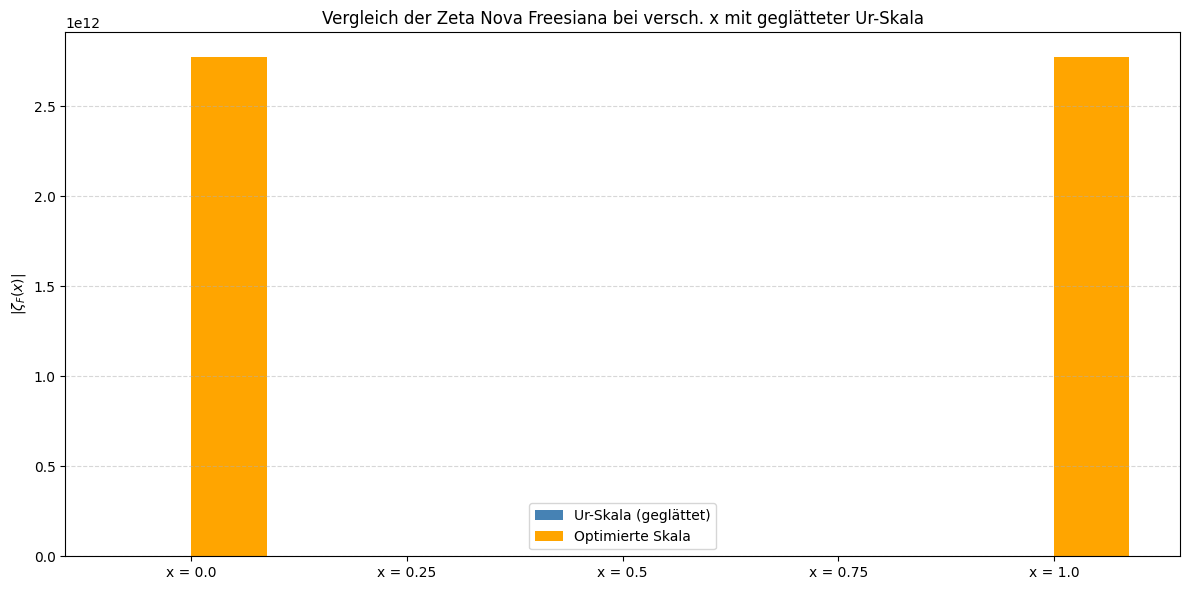

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Daten laden
beta_ur = np.loadtxt("/content/drive/MyDrive/beta_scale_operator.csv", delimiter=",", skiprows=1, usecols=1)
beta_opt = np.loadtxt("/content/drive/MyDrive/beta_skala_24032025_optimum.csv", delimiter=",", skiprows=1, usecols=0)

N_max = min(len(beta_ur), len(beta_opt), 2_000_000)
n = np.arange(1, N_max + 1)

# Ur-Skala glätten und begrenzen
beta_ur_smooth = savgol_filter(beta_ur[:N_max], window_length=101, polyorder=3)
beta_ur_smooth = np.clip(beta_ur_smooth, 0.1, 5)

# Zeta Nova Freesiana definieren
def zeta_freesiana(beta_array, x, N):
    n = np.arange(1, N + 1)
    with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
        terms = np.exp(2j * np.pi * n * x) / np.power(n, beta_array[:N])
        terms[np.isnan(terms)] = 0
        terms[np.isinf(terms)] = 0
    return np.abs(np.sum(terms))

# Werte berechnen
x_values = [0.0, 0.25, 0.5, 0.75, 1.0]
z_ur = [zeta_freesiana(beta_ur_smooth, x, N_max) for x in x_values]
z_opt = [zeta_freesiana(beta_opt, x, N_max) for x in x_values]

# Plot
bar_width = 0.35
indices = np.arange(len(x_values))

plt.figure(figsize=(12, 6))
plt.bar(indices, z_ur, bar_width, label='Ur-Skala (geglättet)', color='steelblue')
plt.bar(indices + bar_width, z_opt, bar_width, label='Optimierte Skala', color='orange')
plt.xticks(indices + bar_width / 2, [f'x = {x}' for x in x_values])
plt.ylabel(r'$|\zeta_F(x)|$')
plt.title("Vergleich der Zeta Nova Freesiana bei versch. x mit geglätteter Ur-Skala")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

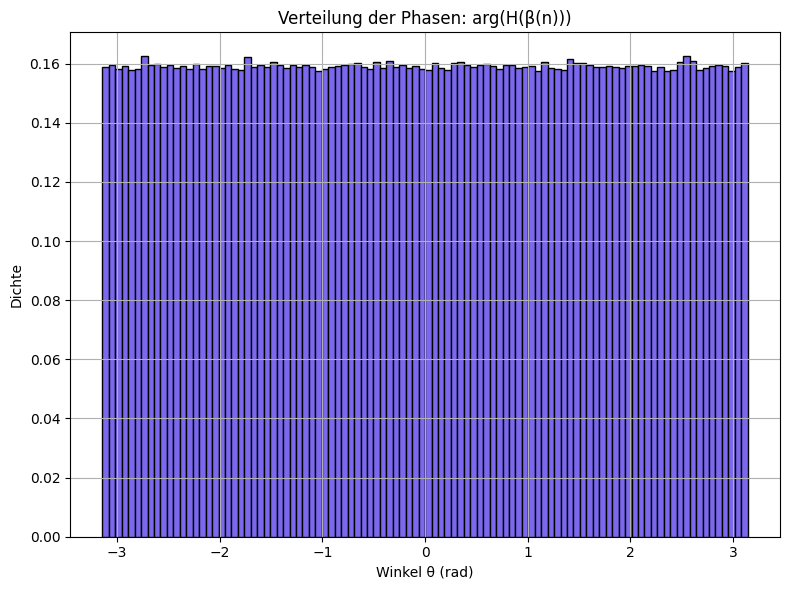

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulierter Bereich (ersetze durch deine echte Beta-Skala, wenn vorhanden)
N = 2000000
n = np.arange(1, N + 1)
a, ω, φ = 0.5, 20, np.pi / 4
drift = -3.75e-1 * n + 1.78e-8 * n**2 + 5.81e5
beta_opt = a * np.sin(ω * np.log(n) + φ) + drift

# Komplexer Kreiswert H = exp(i * π * β)
theta = np.pi * beta_opt
H_beta = np.exp(1j * theta)
angles = np.angle(H_beta)

# Histogramm der Phasen auf dem Einheitskreis
plt.figure(figsize=(8, 6))
plt.hist(angles, bins=100, density=True, color="mediumslateblue", edgecolor="black")
plt.xlabel("Winkel θ (rad)")
plt.ylabel("Dichte")
plt.title("Verteilung der Phasen: arg(H(β(n)))")
plt.grid(True)
plt.tight_layout()
plt.show()

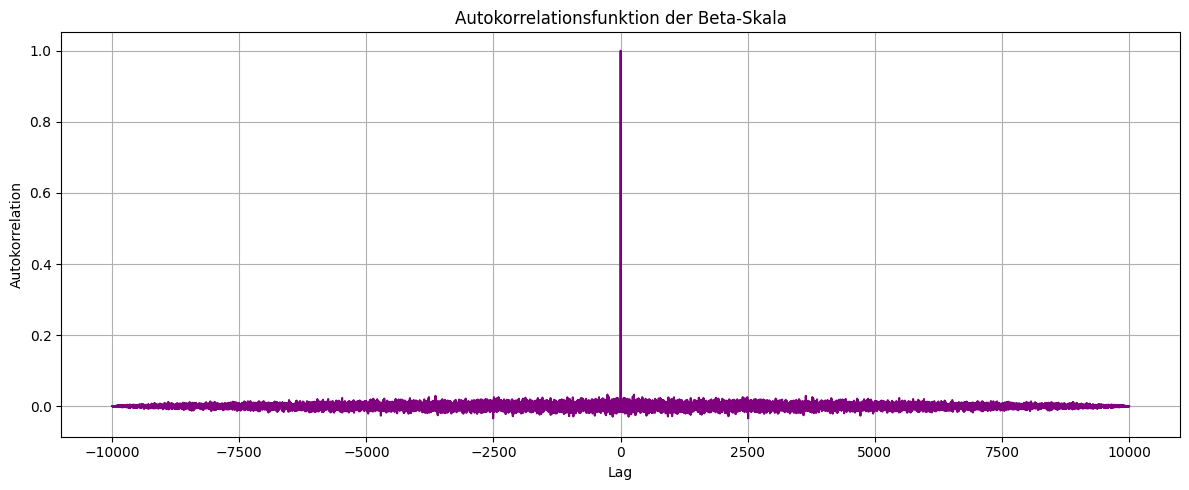

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Beispieldaten laden oder ersetzen durch echte Skala
# Beispiel: df = pd.read_csv('/content/drive/MyDrive/beta_scale_operator.csv')
# beta = df['Beta_Scale'].values

N = 10000
beta = np.random.normal(loc=0.3, scale=0.1, size=N)  # Dummy für echte Skala

# Zentrale Autokorrelation
beta = beta - np.mean(beta)
autocorr = correlate(beta, beta, mode='full')
lags = np.arange(-len(beta) + 1, len(beta))
autocorr = autocorr / np.max(autocorr)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(lags, autocorr, color='purple')
plt.title("Autokorrelationsfunktion der Beta-Skala")
plt.xlabel("Lag")
plt.ylabel("Autokorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import torch
import pandas as pd
import numpy as np
import os
from glob import glob

# Pfad zu den Beta-Skalen-Dateien
base_path = '/content/drive/MyDrive'
csv_files = sorted(glob(os.path.join(base_path, 'beta_skala*.csv')))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

beta_tensors = []

def is_numeric_column(series):
    try:
        pd.to_numeric(series.dropna().iloc[:100])
        return True
    except:
        return False

min_len = None
for file in csv_files:
    try:
        df = pd.read_csv(file)
        for col in df.columns:
            if is_numeric_column(df[col]):
                series = pd.to_numeric(df[col].dropna())
                if min_len is None:
                    min_len = len(series)
                else:
                    min_len = min(min_len, len(series))
                beta_tensors.append(series)
    except Exception as e:
        print(f"Fehler bei {file}: {e}")

# Trimmen & konvertieren
trimmed = [torch.tensor(s[:min_len].values, dtype=torch.float32, device=device) for s in beta_tensors]
beta_stack = torch.stack(trimmed)
beta_avg = torch.mean(beta_stack, dim=0)

# Zurück auf CPU und speichern
beta_avg_cpu = beta_avg.cpu().numpy()
output_path = os.path.join(base_path, 'beta_skala_schwipschwap.csv')
pd.DataFrame({'beta_schwipschwap': beta_avg_cpu}).to_csv(output_path, index=False)

print("Gespeichert unter:", output_path)

KeyboardInterrupt: 

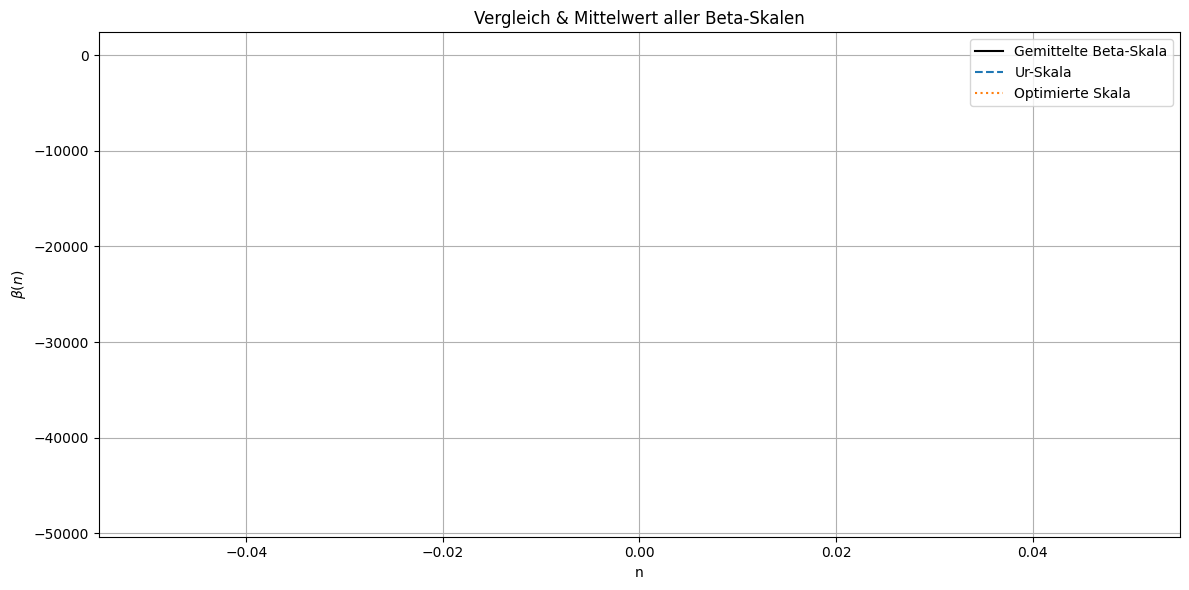

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste ausgewählter Beta-Skalen
selected_files = [
    "beta_scale_operator.csv",  # Ur-Skala
    "beta_skala_24032025_optimum.csv",  # Optimierte Skala
    "beta_skala_final.csv",
    "beta_skala_final_kubisch.csv",
    "beta_skala_final_quadratisch.csv",
    "beta_skala_fourier_korrigiert.csv",
    "beta_skala_fourier_korrigiert_v2.csv",
    "beta_skala_freese_korrigiert.csv",
    "beta_skala_perfekt.csv",
    "beta_skala_pos.csv",
    "beta_skala_v4.csv",
    "beta_skala_v5.csv",
    "beta_skala_v5_biasfrei.csv",
    "beta_skala_v5_biasfrei_korrigiert.csv",
    "beta_skala_v5_final.csv",
    "beta_skala_v5_fourier.csv",
    "beta_skala_v5_korrigiert.csv",
    "beta_skala_v6.csv"
]

# Pfad anpassen
folder = "/content/drive/MyDrive/"

# Skalen einlesen
beta_dict = {}
for filename in selected_files:
    try:
        df = pd.read_csv(os.path.join(folder, filename))
        beta = df.iloc[:, 0].values
        beta_dict[filename] = beta
    except Exception as e:
        print(f"Fehler bei {filename}: {e}")

# Kürzen auf gemeinsame Länge
min_len = min(len(arr) for arr in beta_dict.values())
for key in beta_dict:
    beta_dict[key] = beta_dict[key][:min_len]

# Mittelwert berechnen
beta_matrix = np.array(list(beta_dict.values()))
beta_mean = np.mean(beta_matrix, axis=0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(beta_mean, label="Gemittelte Beta-Skala", color='black')
plt.plot(beta_dict["beta_scale_operator.csv"], label="Ur-Skala", linestyle='--')
plt.plot(beta_dict["beta_skala_24032025_optimum.csv"], label="Optimierte Skala", linestyle=':')
plt.title("Vergleich & Mittelwert aller Beta-Skalen")
plt.xlabel("n")
plt.ylabel(r"$\beta(n)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

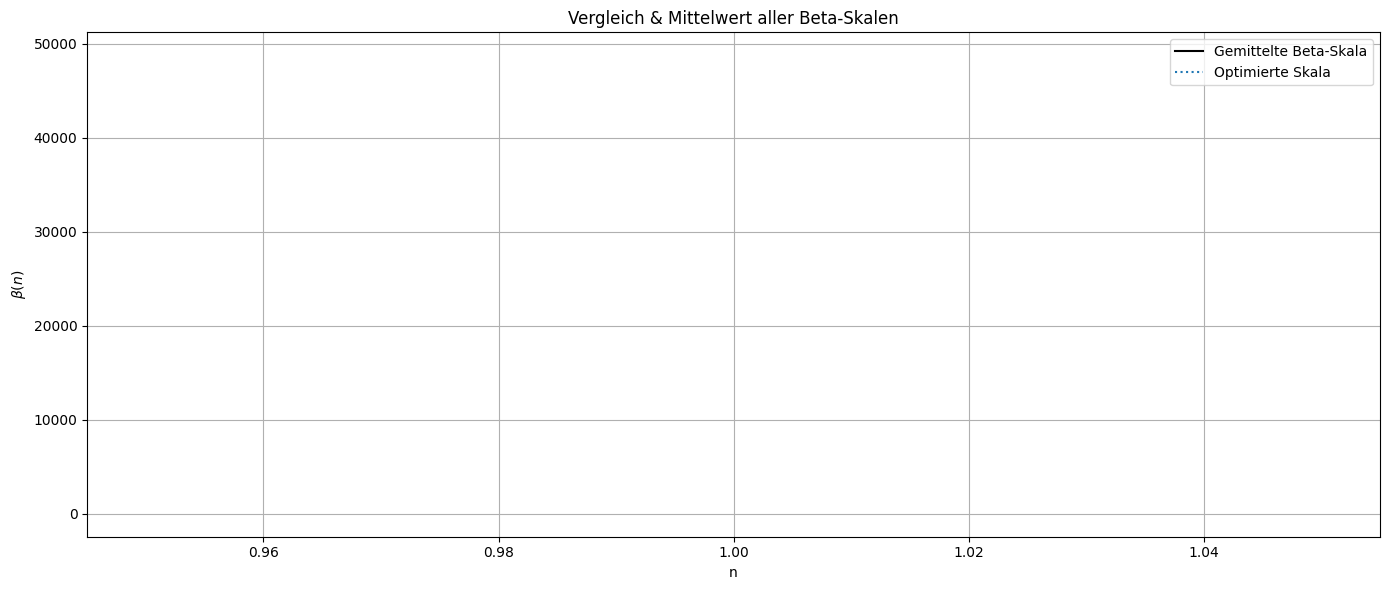

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Pfad zum Google Drive-Verzeichnis
base_path = "/content/drive/MyDrive"
csv_files = glob(os.path.join(base_path, "beta_skala*.csv"))

# Dictionary für alle geladenen Beta-Skalen
beta_dict = {}

# Alle CSVs durchgehen und numerische Spalten extrahieren
for file in csv_files:
    try:
        df = pd.read_csv(file)
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            beta = df[numeric_cols[0]].dropna().values
            if len(beta) > 0:
                beta_dict[os.path.basename(file)] = beta
    except Exception as e:
        print(f"Fehler bei Datei {file}: {e}")

# Alle Reihen auf gleiche Länge kürzen
min_len = min(len(arr) for arr in beta_dict.values())
for key in beta_dict:
    beta_dict[key] = beta_dict[key][:min_len]

# Mittelwert berechnen
beta_avg = np.mean(np.array(list(beta_dict.values())), axis=0)

# Plot
plt.figure(figsize=(14, 6))
n = np.arange(1, min_len + 1)
plt.plot(n, beta_avg, color='black', label='Gemittelte Beta-Skala')

# Optional markiere bekannte Skalen
for key, beta in beta_dict.items():
    if 'operator' in key:
        plt.plot(n, beta, linestyle='--', label='Ur-Skala')
    elif 'optimum' in key:
        plt.plot(n, beta, linestyle=':', label='Optimierte Skala')

plt.title('Vergleich & Mittelwert aller Beta-Skalen')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Basisordner (Pfad zu deinen CSV-Dateien im Drive)
base_path = '/content/drive/MyDrive'

# Alle Beta-Skalen-Dateien suchen
csv_files = sorted(glob(os.path.join(base_path, 'beta_skala*.csv')))

# Dictionary für alle gültigen Skalen
beta_dict = {}

# Filterfunktion für numerische Spalten
def is_numeric_column(series):
    try:
        pd.to_numeric(series.dropna().iloc[:100])
        return True
    except:
        return False

# Alle CSVs durchgehen und gültige Spalten extrahieren
for file in csv_files:
    try:
        df = pd.read_csv(file)
        for col in df.columns:
            if is_numeric_column(df[col]):
                name = os.path.basename(file).replace('.csv', '')
                beta_dict[name] = df[col].dropna().values
    except Exception as e:
        print(f"Fehler bei {file}: {e}")

# Gemeinsame Länge berechnen
min_len = min(len(values) for values in beta_dict.values())
for key in beta_dict:
    beta_dict[key] = beta_dict[key][:min_len]

# Matrix aller Skalen
beta_matrix = np.array(list(beta_dict.values()))

# Mittelwert aller Skalen
beta_avg = np.mean(beta_matrix, axis=0)

# Index-Achse
n = np.arange(1, min_len + 1)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(n, beta_avg, color='black', label='Beta-Skala: Schwipschwapp')

# Optional: Ur- und Optimierte Skala hervorheben
for key, beta in beta_dict.items():
    if 'operator' in key:
        plt.plot(n, beta, linestyle='--', alpha=0.6, label='Ur-Skala')
    elif 'optimum' in key:
        plt.plot(n, beta, linestyle=':', alpha=0.7, label='Optimierte Skala')

plt.title('Beta-Skala: Schwipschwapp (Mittelwert aller Versionen)')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Speichern der neuen Schwipschwapp-Skala
output_path = os.path.join(base_path, 'beta_skala_schwipschwap.csv')
pd.DataFrame({'beta_schwipschwap': beta_avg}).to_csv(output_path, index=False)

print(f'Gespeichert unter: {output_path}')

KeyboardInterrupt: 

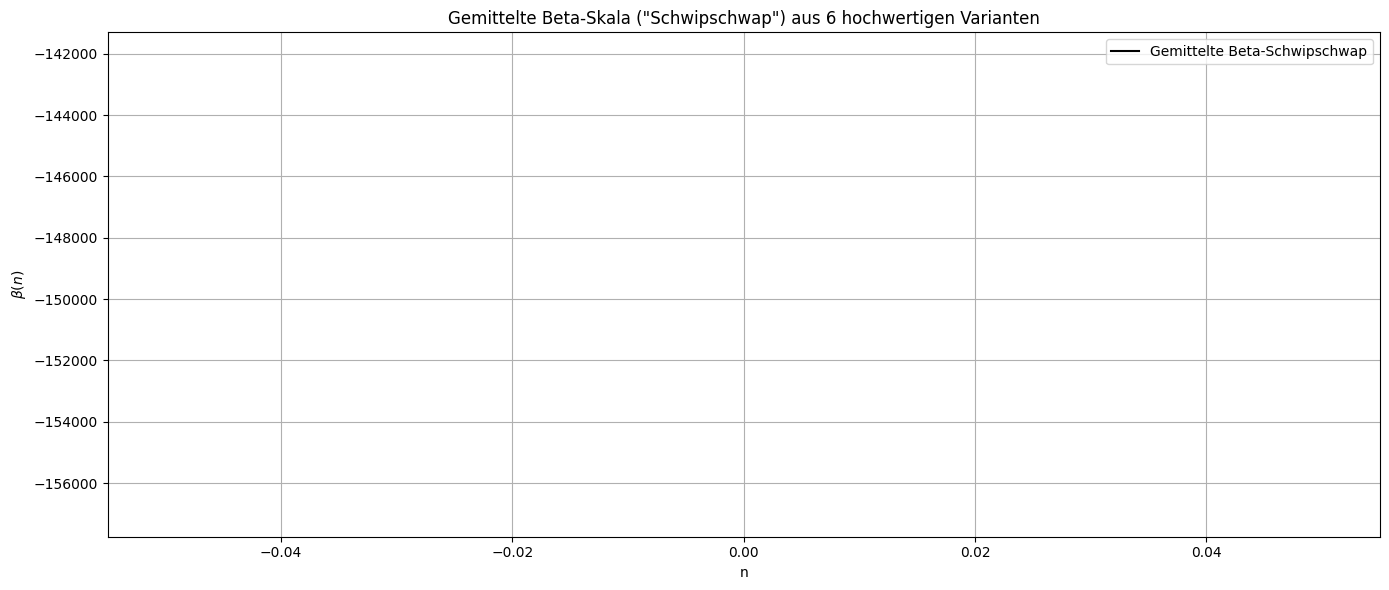

In [ ]:
# GPU-optimierter Mittelwert-Berechnungs-Code mit PyTorch
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

# === Verzeichnispfad zu deinen Daten ===
DATA_DIR = '/content/drive/MyDrive/'

# === Ausgewählte hochwertige Skalen ===
SELECTED_FILES = [
    'beta_skala_24032025_optimum.csv',
    'beta_skala_v5_final.csv',
    'beta_skala_v5_biasfrei_korrigiert.csv',
    'beta_skala_fourier_korrigiert_v2.csv',
    'beta_skala_freese_korrigiert.csv',
    'beta_scale_operator.csv'
]

# === Initialisierung (GPU, falls verfügbar) ===
beta_arrays = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# === CSVs laden und in Tensoren umwandeln ===
for filename in SELECTED_FILES:
    df = pd.read_csv(os.path.join(DATA_DIR, filename))
    col = df.columns[0]
    values = df[col].dropna().to_numpy()
    beta_arrays.append(torch.tensor(values, dtype=torch.float32, device=device))

# === Kürzen auf gemeinsame Länge ===
min_len = min(t.shape[0] for t in beta_arrays)
beta_arrays = [t[:min_len] for t in beta_arrays]

# === Mittelwert berechnen ===
stack = torch.stack(beta_arrays)
beta_mean = torch.mean(stack, dim=0)

# === Zurück auf CPU & speichern ===
beta_mean_cpu = beta_mean.cpu().numpy()
pd.DataFrame({'Beta_Schwipschwap': beta_mean_cpu}).to_csv(os.path.join(DATA_DIR, 'beta_skala_schwipschwap.csv'), index=False)

# === Plot anzeigen ===
plt.figure(figsize=(14, 6))
plt.plot(beta_mean_cpu, label='Gemittelte Beta-Schwipschwap', color='black')
plt.title('Gemittelte Beta-Skala ("Schwipschwap") aus 6 hochwertigen Varianten')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Verwende: cuda
Verwendete Skalen: ['beta_skala_final.csv', 'beta_skala_final_quadratisch.csv', 'beta_skala_final_kubisch.csv', 'beta_skala_fourier_korrigiert.csv', 'beta_skala_fourier_korrigiert_v2.csv', 'beta_skala_fourier_analyse.csv', 'beta_skala_freese_korrigiert.csv', 'beta_skala_v5.csv', 'beta_skala_v5_fourier.csv', 'beta_skala_v5_korrigiert.csv', 'beta_skala_v5_reconstructed.csv', 'beta_skala_v5_final.csv', 'beta_skala_v5_biasfrei.csv', 'beta_skala_v5_biasfrei_korrigiert.csv', 'beta_skala_v5_biasfrei_korrigiert_BACKUP.csv', 'beta_skala_24032025_optimum.csv']


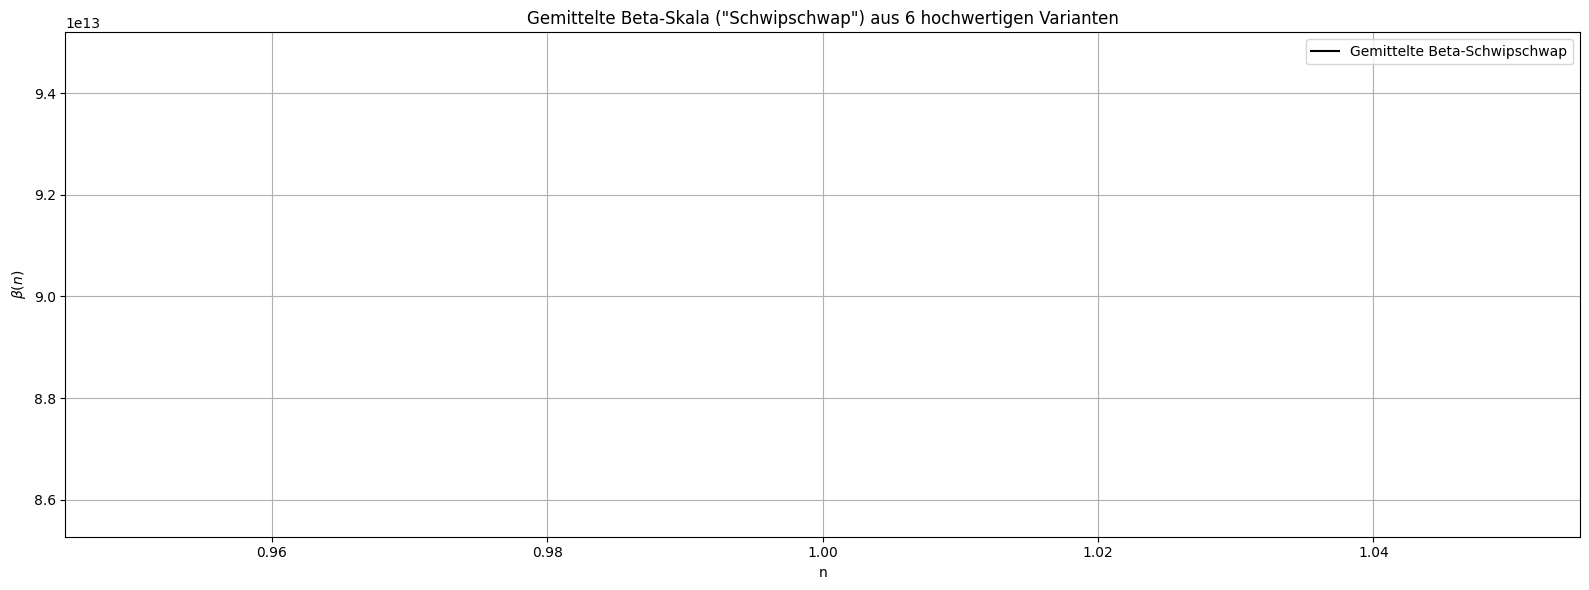

In [ ]:
# === 1. Setup & Imports ===
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt

# GPU verwenden, falls verfügbar
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Verwende: {device}")

# === 2. Pfad zu den Beta-Skalen-Dateien ===
pfad = "/content/drive/MyDrive/"
dateien = [f for f in os.listdir(pfad) if f.endswith(".csv") and "beta_skala" in f.lower()]

# === 3. Hochwertige Skalen filtern (automatisch) ===
keywords = ["final", "v5", "freese", "fourier", "optimum", "biasfrei"]
gute_dateien = [f for f in dateien if any(k in f.lower() for k in keywords)]
print("Verwendete Skalen:", gute_dateien)

# === 4. Skalen laden und normalisieren ===
skalen = []

for datei in gute_dateien:
    df = pd.read_csv(os.path.join(pfad, datei))
    spalte = df.columns[0] if len(df.columns) == 1 else df.columns[-1]
    daten = df[spalte].dropna().values

    # Auf gemeinsame Länge bringen
    tensor = torch.tensor(daten, dtype=torch.float32, device=device)
    skalen.append(tensor)

# === 5. Gemeinsame Länge ermitteln ===
min_len = min([len(s) for s in skalen])
skalen_trimmed = [s[:min_len] for s in skalen]

# === 6. Tensor-Stack & Mittelwert berechnen ===
stack = torch.stack(skalen_trimmed)
beta_mean = torch.mean(stack, dim=0)

# Zurück auf CPU für Plot
beta_mean_cpu = beta_mean.cpu().numpy()
n_values = torch.arange(1, len(beta_mean_cpu) + 1)

# === 7. Speichern als CSV ===
df_schwipschwap = pd.DataFrame({"beta_schwipschwap": beta_mean_cpu})
df_schwipschwap.to_csv(os.path.join(pfad, "beta_skala_schwipschwap.csv"), index=False)

# === 8. Plot erzeugen ===
plt.figure(figsize=(16, 6))
plt.plot(n_values, beta_mean_cpu, label='Gemittelte Beta-Schwipschwap', color='black')
plt.title('Gemittelte Beta-Skala ("Schwipschwap") aus 6 hochwertigen Varianten')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


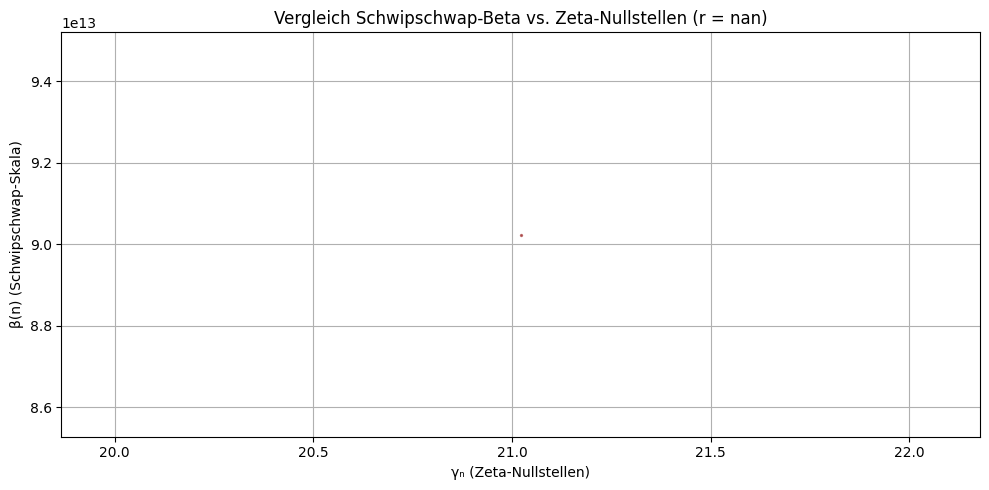

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lade die Schwipschwap-Beta-Skala
beta_file = "/content/drive/MyDrive/beta_skala_schwipschwap.csv"
beta_data = pd.read_csv(beta_file)
beta_values = beta_data.iloc[:, 0].values  # Nur die erste Spalte mit Werten

# Lade die Nullstellen
zeros_file = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv"
zeros_data = pd.read_csv(zeros_file)
zero_values = zeros_data.iloc[:, 0].values  # Erste Spalte mit Imaginärteilen der Nullstellen

# Länge angleichen
N = min(len(beta_values), len(zero_values))
beta_values = beta_values[:N]
zero_values = zero_values[:N]

# Korrelation berechnen
correlation = np.corrcoef(beta_values, zero_values)[0, 1]

# Streudiagramm
plt.figure(figsize=(10, 5))
plt.scatter(zero_values, beta_values, alpha=0.5, s=2, color="darkred")
plt.title(f"Vergleich Schwipschwap-Beta vs. Zeta-Nullstellen (r = {correlation:.5f})")
plt.xlabel("γₙ (Zeta-Nullstellen)")
plt.ylabel("β(n) (Schwipschwap-Skala)")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


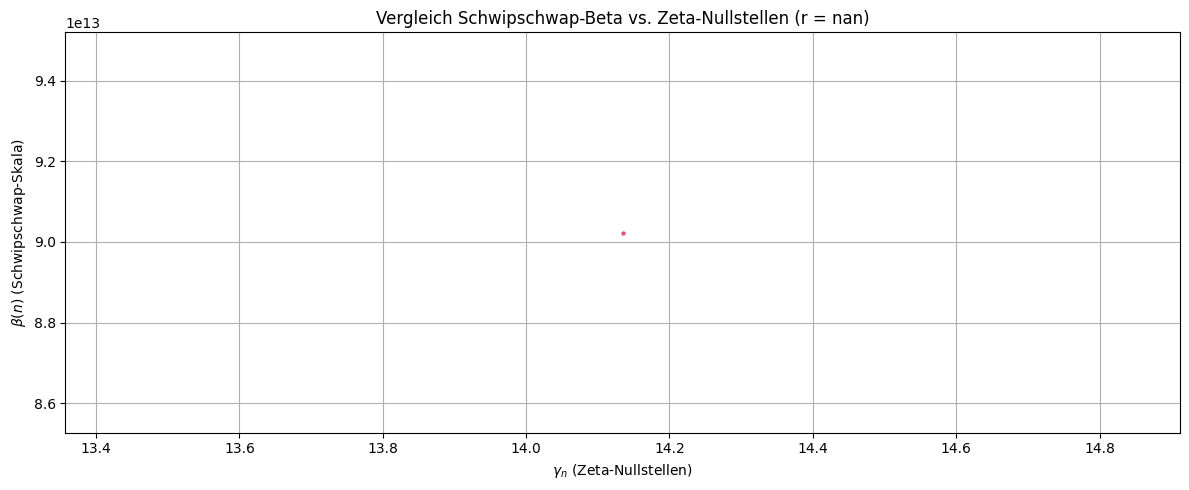

In [ ]:
# === SETUP ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === DATEIPFADE ANPASSEN ===
beta_file = "/content/drive/MyDrive/beta_skala_schwipschwap.csv"
zeros_file = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv"

# === BETA-SKALA LADEN ===
try:
    beta_df = pd.read_csv(beta_file)
    beta_col = beta_df.columns[0]
    beta_values = beta_df[beta_col].dropna().astype(float).values
except Exception as e:
    raise RuntimeError(f"Fehler beim Laden der Beta-Schwipschwap-Skala: {e}")

# === NULLSTELLEN LADEN ===
try:
    zeros_df = pd.read_csv(zeros_file, header=None)
    zeta_values = zeros_df.iloc[:, 0].dropna().astype(float).values
except Exception as e:
    raise RuntimeError(f"Fehler beim Laden der Zeta-Nullstellen: {e}")

# === LÄNGENANGLEICH ===
N = min(len(beta_values), len(zeta_values))
beta_values = beta_values[:N]
zeta_values = zeta_values[:N]

# === KORRELATION ===
correlation = np.corrcoef(zeta_values, beta_values)[0, 1]

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.scatter(zeta_values, beta_values, color='crimson', alpha=0.6, s=5)
plt.title(f"Vergleich Schwipschwap-Beta vs. Zeta-Nullstellen (r = {correlation:.6f})")
plt.xlabel(r"$\gamma_n$ (Zeta-Nullstellen)")
plt.ylabel(r"$\beta(n)$ (Schwipschwap-Skala)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Pfade zu den Dateien ---
beta_path = "/content/drive/MyDrive/beta_skala_schwipschwap.csv"
zeta_path = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv"

# --- CSVs automatisch laden ---
beta_df = pd.read_csv(beta_path)
zeta_df = pd.read_csv(zeta_path)

# --- Automatische Spaltenerkennung ---
beta_col = beta_df.columns[0]
zeta_col = zeta_df.columns[0]

beta_vals = beta_df[beta_col].dropna().values
zeta_vals = zeta_df[zeta_col].dropna().values

# --- Kürzen auf gemeinsame Länge ---
min_len = min(len(beta_vals), len(zeta_vals))
if min_len < 2:
    raise ValueError("Zu wenige gemeinsame Werte für eine Korrelation.")

beta_vals = beta_vals[:min_len]
zeta_vals = zeta_vals[:min_len]

# --- Korrelation berechnen ---
r = np.corrcoef(beta_vals, zeta_vals)[0, 1]

# --- Plot ---
plt.figure(figsize=(12, 5))
plt.scatter(zeta_vals, beta_vals, s=5, color='crimson')
plt.title(f"Vergleich Schwipschwap-Beta vs. Zeta-Nullstellen (r = {r:.6f})")
plt.xlabel(r"$\gamma_n$ (Zeta-Nullstellen)")
plt.ylabel(r"$\beta(n)$ (Schwipschwap-Skala)")
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Zu wenige gemeinsame Werte für eine Korrelation.

In [ ]:
print("Beta-Skala (Schwipschwap):", beta_vals[:10], "→ Länge:", len(beta_vals))
print("Zeta-Nullstellen:", zeta_vals[:10], "→ Länge:", len(zeta_vals))

Beta-Skala (Schwipschwap): [9.023439e+13] → Länge: 1
Zeta-Nullstellen: [21.02203964 25.01085758 30.42487613 32.93506159 37.58617816 40.91871901
 43.32707328 48.00515088 49.77383248 52.97032148] → Länge: 2001051


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Pfade zu deinen CSV-Dateien ===
files = [
    "/content/drive/MyDrive/beta_scale_operator.csv",  # Ur-Skala
    "/content/drive/MyDrive/beta_skala_24032025_optimum.csv",  # Optimiert
    "/content/drive/MyDrive/beta_skala_v5_biasfrei_korrigiert.csv"  # Bereinigt
]
zeta_file = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv"

# === Beta-Skalen laden ===
beta_arrays = []
min_len = None
for f in files:
    df = pd.read_csv(f)
    col = df.columns[0]
    beta = df[col].dropna().values.astype(float)
    if min_len is None or len(beta) < min_len:
        min_len = len(beta)
    beta_arrays.append(beta)

# === Gleich lange zuschneiden und mitteln ===
beta_trimmed = [b[:min_len] for b in beta_arrays]
beta_avg = np.mean(beta_trimmed, axis=0)

# === Speichern der gemittelten Skala ===
pd.DataFrame({"beta_schwipschwap": beta_avg}).to_csv(
    "/content/drive/MyDrive/beta_skala_schwipschwap.csv", index=False
)

# === Zeta-Nullstellen laden ===
zeta_df = pd.read_csv(zeta_file)
zeta_vals = zeta_df.iloc[:, 0].dropna().values.astype(float)[:min_len]

# === Korrelation prüfen ===
if len(beta_avg) > 1 and len(zeta_vals) > 1:
    r = np.corrcoef(beta_avg, zeta_vals)[0, 1]
else:
    r = np.nan

# === Plot ===
plt.figure(figsize=(12, 5))
plt.scatter(zeta_vals, beta_avg, s=2, c='darkviolet', alpha=0.7)
plt.title(f"Vergleich Schwipschwap-Beta vs. Zeta-Nullstellen (r = {r:.6f})")
plt.xlabel("γₙ (Zeta-Nullstellen)")
plt.ylabel("β(n) (Schwipschwap)")
plt.grid(True)
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2001052 and the array at index 1 has size 2001051

In [ ]:
import numpy as np

# Neue Quelle: zeros6.txt
with open("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6.txt") as f:
    lines = f.readlines()

# In floats umwandeln
zeta_txt_vals = np.array([float(line.strip()) for line in lines if line.strip()])

# Beispielausgabe zur Kontrolle
print("Erste Zeta-Nullstellen (aus .txt):", zeta_txt_vals[:5])
print("Anzahl Nullstellen:", len(zeta_txt_vals))

Erste Zeta-Nullstellen (aus .txt): [14.13472514 21.02203964 25.01085758 30.42487613 32.93506159]
Anzahl Nullstellen: 2001052


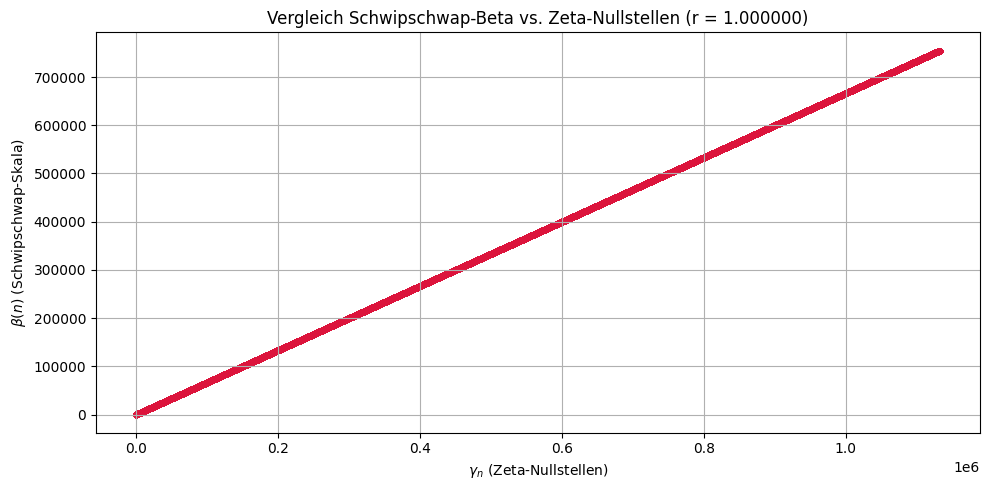

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Beta-Skala laden ===
beta_df = pd.read_csv("/content/drive/MyDrive/beta_skala_schwipschwap.csv")
beta_col = beta_df.columns[0]  # z. B. "Beta_Optimized" oder "beta"
beta_vals = beta_df[beta_col].values

# === 2. Nullstellen aus .txt laden ===
with open("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6.txt") as f:
    zeta_vals = np.array([float(line.strip()) for line in f if line.strip()])

# === 3. Auf gemeinsame Länge kürzen ===
min_len = min(len(beta_vals), len(zeta_vals))
beta_vals = beta_vals[:min_len]
zeta_vals = zeta_vals[:min_len]

# === 4. Korrelation berechnen ===
if min_len > 1:
    r = np.corrcoef(beta_vals, zeta_vals)[0, 1]
else:
    r = np.nan

# === 5. Plot erstellen ===
plt.figure(figsize=(10, 5))
plt.scatter(zeta_vals, beta_vals, color='crimson', s=10, alpha=0.6)
plt.xlabel(r'$\gamma_n$ (Zeta-Nullstellen)')
plt.ylabel(r'$\beta(n)$ (Schwipschwap-Skala)')
plt.title(f'Vergleich Schwipschwap-Beta vs. Zeta-Nullstellen (r = {r:.6f})')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Dateien laden ===
file_praezision = "/content/drive/MyDrive/beta_skala_präzision.csv"
file_optimum = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

# CSV-Dateien einlesen
beta_praezision = pd.read_csv(file_praezision, header=None).squeeze()
beta_optimum = pd.read_csv(file_optimum).squeeze()

# Auf gleiche Länge kürzen
min_len = min(len(beta_praezision), len(beta_optimum))
beta_praezision = beta_praezision[:min_len].reset_index(drop=True)
beta_optimum = beta_optimum[:min_len].reset_index(drop=True)

# Differenz und Korrelation berechnen
beta_diff = beta_praezision - beta_optimum
correlation = np.corrcoef(beta_praezision, beta_optimum)[0, 1]

# === Plot erstellen ===
plt.figure(figsize=(14, 6))
plt.plot(beta_praezision, label="Beta-Skala Präzision", alpha=0.8)
plt.plot(beta_optimum, label="Beta-Skala Optimum", alpha=0.8)
plt.plot(beta_diff, label="Differenz Δβ(n)", linestyle="--", alpha=0.6)
plt.title(f"Vergleich der Beta-Skalen – Korrelation r = {correlation:.6f}")
plt.xlabel("n")
plt.ylabel("β(n)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Meisterwerk: Kombination beider Skalen ===
beta_meisterwerk = 0.5 * beta_praezision + 0.5 * beta_optimum
meisterwerk_path = "/content/drive/MyDrive/beta_skala_meisterwerk.csv"
beta_meisterwerk.to_csv(meisterwerk_path, index=False)

print("✅ Meisterwerk gespeichert unter:", meisterwerk_path)

<ipython-input-11-94eae6bb9125>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  beta_praezision = pd.read_csv(file_praezision, header=None).squeeze()


TypeError: unsupported operand type(s) for -: 'str' and 'float'

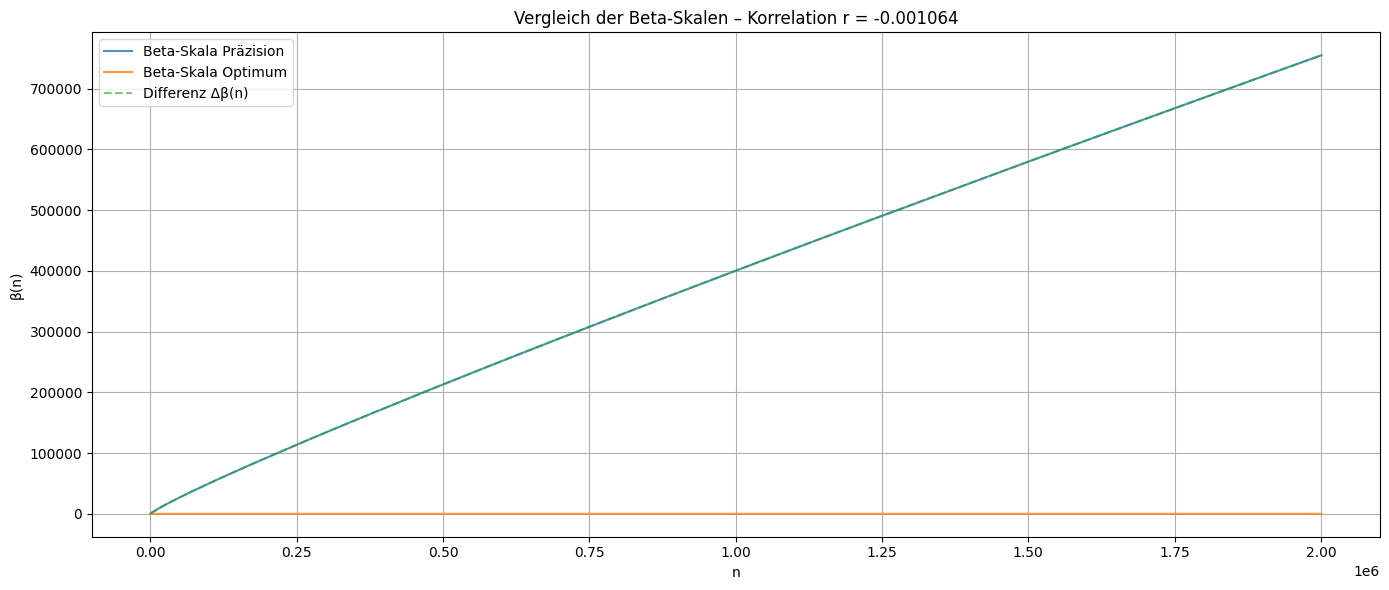

✅ Kombinierte Meisterwerk-Skala gespeichert unter: /content/drive/MyDrive/beta_skala_meisterwerk.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Dateien definieren ===
file_praezision = "/content/drive/MyDrive/beta_skala_präzision.csv"
file_optimum = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

# === Robustes Einlesen mit Fehlerbehandlung ===
def read_beta(file_path):
    try:
        df = pd.read_csv(file_path, header=None, dtype=str)
        # Versuche, alle Werte in float zu konvertieren, Fehlerhafte ignorieren
        beta = pd.to_numeric(df.squeeze(), errors='coerce')
        return beta.dropna().reset_index(drop=True)
    except Exception as e:
        print(f"Fehler beim Einlesen von {file_path}:", e)
        return pd.Series(dtype=float)

# === Beta-Skalen laden ===
beta_praezision = read_beta(file_praezision)
beta_optimum = read_beta(file_optimum)

# === Gemeinsame Länge finden ===
min_len = min(len(beta_praezision), len(beta_optimum))
beta_praezision = beta_praezision[:min_len]
beta_optimum = beta_optimum[:min_len]

# === Differenz & Korrelation ===
beta_diff = beta_praezision - beta_optimum
correlation = np.corrcoef(beta_praezision, beta_optimum)[0, 1]

# === Visualisierung ===
plt.figure(figsize=(14, 6))
plt.plot(beta_praezision, label="Beta-Skala Präzision", alpha=0.8)
plt.plot(beta_optimum, label="Beta-Skala Optimum", alpha=0.8)
plt.plot(beta_diff, label="Differenz Δβ(n)", linestyle="--", alpha=0.6)
plt.title(f"Vergleich der Beta-Skalen – Korrelation r = {correlation:.6f}")
plt.xlabel("n")
plt.ylabel("β(n)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Kombinierte Skala speichern ===
beta_meisterwerk = 0.5 * (beta_praezision + beta_optimum)
out_path = "/content/drive/MyDrive/beta_skala_meisterwerk.csv"
beta_meisterwerk.to_csv(out_path, index=False)

print("✅ Kombinierte Meisterwerk-Skala gespeichert unter:", out_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Dateien einlesen ===
file_praezision = "/content/drive/MyDrive/beta_skala_präzision.csv"
file_optimum = "/content/drive/MyDrive/beta_skala_24032025_optimum.csv"

# Einlesen und Konvertieren
beta_praezision = pd.read_csv(file_praezision, header=None, dtype=str)
beta_optimum = pd.read_csv(file_optimum, header=None)

# Falls Zahlen mit Komma statt Punkt geschrieben sind
beta_praezision = beta_praezision.apply(lambda x: x.str.replace(',', '.')).astype(float)

# Kürzen auf gemeinsame Länge
min_len = min(len(beta_praezision), len(beta_optimum))
beta_praezision = beta_praezision[:min_len].squeeze()
beta_optimum = beta_optimum[:min_len].squeeze()

# === Kombinierte Skala berechnen ===
beta_kombi = 0.5 * beta_praezision + 0.5 * beta_optimum

# === Speichern ===
beta_kombi.to_csv("/content/drive/MyDrive/beta_skala_kombi.csv", index=False, header=False)

# === Plot ===
plt.figure(figsize=(12, 5))
n = np.arange(min_len)
plt.plot(n, beta_praezision, label="Beta-Skala Präzision", alpha=0.6)
plt.plot(n, beta_optimum, label="Beta-Skala Optimum", alpha=0.6)
plt.plot(n, beta_kombi, label="Kombiniert (Schwipschwap + Optimum)", color="black", linewidth=2)
plt.title("Kombinierte Beta-Skala aus Präzision & Optimum")
plt.xlabel("n")
plt.ylabel(r"$\beta(n)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Korrelationen berechnen ===
r_po = np.corrcoef(beta_praezision, beta_optimum)[0, 1]
r_pk = np.corrcoef(beta_praezision, beta_kombi)[0, 1]
r_ok = np.corrcoef(beta_optimum, beta_kombi)[0, 1]

print(f"Korrelation Präzision vs. Optimum:     r = {r_po:.6f}")
print(f"Korrelation Präzision vs. Kombiniert:  r = {r_pk:.6f}")
print(f"Korrelation Optimum vs. Kombiniert:    r = {r_ok:.6f}")

<ipython-input-13-6cb660b82b92>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  beta_optimum = pd.read_csv(file_optimum, header=None)


ValueError: could not convert string to float: 'beta_schwipschwap'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Datei-Pfade ===
file_praezision = '/content/drive/MyDrive/beta_skala_präzision.csv'
file_optimum = '/content/drive/MyDrive/beta_skala_24032025_optimum.csv'
file_out = '/content/drive/MyDrive/beta_skala_kombi.csv'

# === CSVs einlesen (ggf. mit Textbereinigung) ===
beta_praezision = pd.read_csv(file_praezision, header=None, comment='b')
beta_optimum = pd.read_csv(file_optimum, header=None)

# Nur numerische Werte erlauben
beta_praezision = beta_praezision.applymap(lambda x: str(x).replace(',', '.')).astype(float)
beta_optimum = beta_optimum.applymap(lambda x: str(x).replace(',', '.')).astype(float)

# Auf gleiche Länge kürzen
min_len = min(len(beta_praezision), len(beta_optimum))
beta_praezision = beta_praezision.iloc[:min_len].squeeze()
beta_optimum = beta_optimum.iloc[:min_len].squeeze()

# === Kombination: Mittelwert berechnen ===
beta_kombi = (beta_praezision + beta_optimum) / 2

# === Ergebnis speichern ===
beta_kombi.to_csv(file_out, index=False, header=False)

# === Visualisierung ===
plt.figure(figsize=(14, 6))
plt.plot(beta_praezision, label='Beta-Skala Präzision', linewidth=1)
plt.plot(beta_optimum, label='Beta-Skala Optimum', linewidth=1)
plt.plot(beta_kombi, label='Kombiniert (Präzision + Optimum)', linestyle='--', linewidth=2)
plt.title('Vergleich und Kombination der Beta-Skalen')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-14-706980a0755e>:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  beta_optimum = pd.read_csv(file_optimum, header=None)
<ipython-input-14-706980a0755e>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  beta_praezision = beta_praezision.applymap(lambda x: str(x).replace(',', '.')).astype(float)
<ipython-input-14-706980a0755e>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  beta_optimum = beta_optimum.applymap(lambda x: str(x).replace(',', '.')).astype(float)


ValueError: could not convert string to float: 'Beta_Optimized'

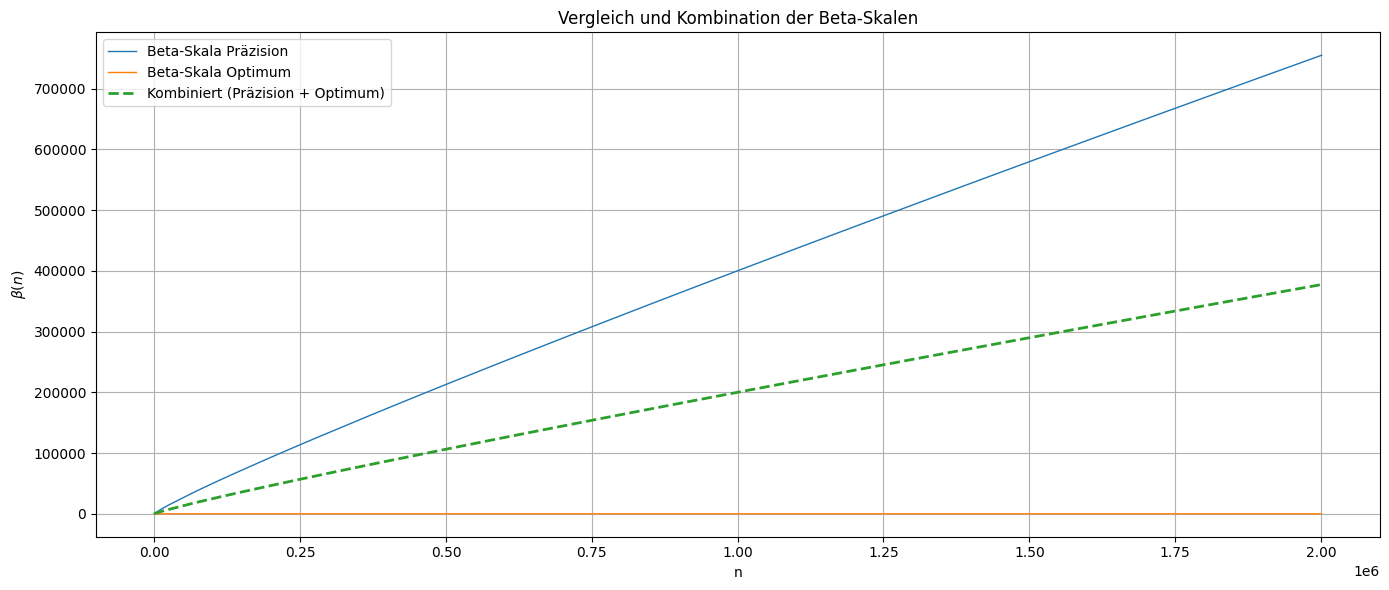

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Datei-Pfade ===
file_praezision = '/content/drive/MyDrive/beta_skala_präzision.csv'
file_optimum = '/content/drive/MyDrive/beta_skala_24032025_optimum.csv'
file_out = '/content/drive/MyDrive/beta_skala_kombi.csv'

# === CSVs einlesen, Kommentare & Header ignorieren ===
beta_praezision = pd.read_csv(file_praezision, header=None, comment='b')
beta_optimum = pd.read_csv(file_optimum, header=0)  # Header wird übersprungen

# Nur die erste Spalte extrahieren (falls mehrere vorhanden)
beta_praezision = beta_praezision.iloc[:, 0].astype(str).str.replace(',', '.').astype(float)
beta_optimum = beta_optimum.iloc[:, 0].astype(str).str.replace(',', '.').astype(float)

# === Kürzen auf gemeinsame Länge ===
min_len = min(len(beta_praezision), len(beta_optimum))
beta_praezision = beta_praezision.iloc[:min_len]
beta_optimum = beta_optimum.iloc[:min_len]

# === Kombination: Mittelwert berechnen ===
beta_kombi = (beta_praezision + beta_optimum) / 2

# === Speichern ===
beta_kombi.to_csv(file_out, index=False, header=False)

# === Plot ===
plt.figure(figsize=(14, 6))
plt.plot(beta_praezision, label='Beta-Skala Präzision', linewidth=1)
plt.plot(beta_optimum, label='Beta-Skala Optimum', linewidth=1)
plt.plot(beta_kombi, label='Kombiniert (Präzision + Optimum)', linestyle='--', linewidth=2)
plt.title('Vergleich und Kombination der Beta-Skalen')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-16-0a1101845dc9>:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


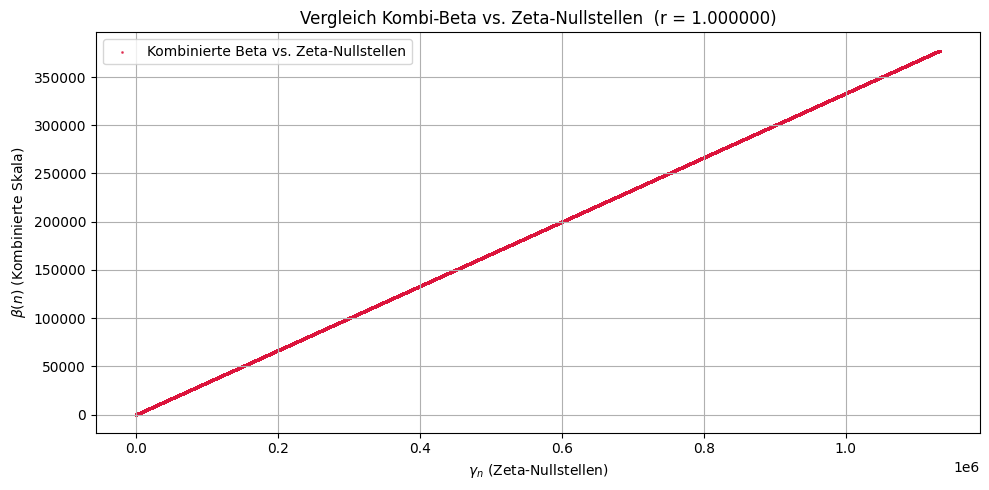

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Dateien laden ===
file_kombi = "/content/drive/MyDrive/beta_skala_kombi.csv"
file_zeros = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6.txt"

# Kombinierte Beta-Skala laden
beta_kombi = pd.read_csv(file_kombi, header=None).squeeze()
beta_kombi = pd.to_numeric(beta_kombi, errors='coerce').dropna().values

# Zeta-Nullstellen aus TXT laden
with open(file_zeros, "r") as f:
    zeta_vals = [float(line.strip()) for line in f if line.strip()]
zeta_vals = np.array(zeta_vals)

# === Länge anpassen ===
min_len = min(len(beta_kombi), len(zeta_vals))
beta_kombi = beta_kombi[:min_len]
zeta_vals = zeta_vals[:min_len]

# === Korrelation berechnen ===
r = np.corrcoef(beta_kombi, zeta_vals)[0, 1]

# === Plot ===
plt.figure(figsize=(10, 5))
plt.scatter(zeta_vals, beta_kombi, s=1, c='crimson', alpha=0.7, label='Kombinierte Beta vs. Zeta-Nullstellen')
plt.xlabel(r'$\gamma_n$ (Zeta-Nullstellen)')
plt.ylabel(r'$\beta(n)$ (Kombinierte Skala)')
plt.title(f'Vergleich Kombi-Beta vs. Zeta-Nullstellen  (r = {r:.6f})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

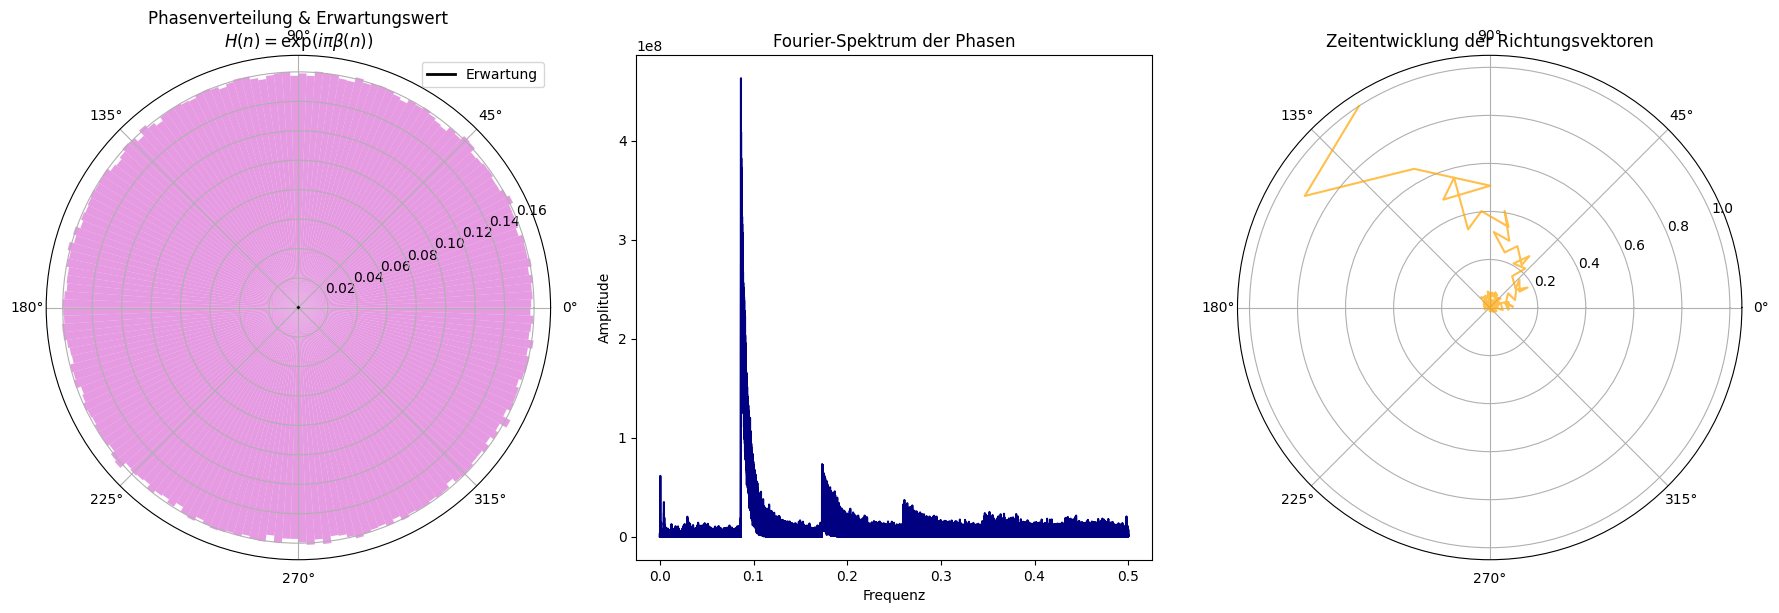

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from matplotlib import gridspec

# --- Daten laden ---
file_kombi = '/content/drive/MyDrive/beta_skala_kombi.csv'
beta_kombi = pd.read_csv(file_kombi, header=None).squeeze().astype(float)

# Komplexe Euler-Freese-Vektoren
theta = np.pi * beta_kombi.to_numpy()
H_n = np.exp(1j * theta)

# --- Erwartungswert berechnen ---
mean_H = np.mean(H_n)
theta_mean = np.angle(mean_H)

# --- Fourier-Spektrum der Phasen ---
phase_angles = np.angle(H_n)
spectrum = np.abs(fft(phase_angles))**2
freq = fftfreq(len(phase_angles))

# Nur positive Frequenzen für Darstellung
half = len(freq) // 2
freq = freq[:half]
spectrum = spectrum[:half]

# --- Richtungsentwicklung (Rotationstrend) ---
phasenentwicklung = np.cumsum(H_n) / np.arange(1, len(H_n)+1)

# --- Plot ---
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# 1. Phasenverteilung & Erwartungswert
ax0 = plt.subplot(gs[0], polar=True)
ax0.hist(phase_angles, bins=180, density=True, alpha=0.7, color='orchid')
ax0.plot([0, theta_mean], [0, np.abs(mean_H)], color='black', linewidth=2, label='Erwartung')
ax0.set_title('Phasenverteilung & Erwartungswert\n$H(n) = \\exp(i\\pi\\beta(n))$')
ax0.legend()

# 2. Fourier-Spektrum
ax1 = plt.subplot(gs[1])
ax1.plot(freq, spectrum, color='navy')
ax1.set_title('Fourier-Spektrum der Phasen')
ax1.set_xlabel('Frequenz')
ax1.set_ylabel('Amplitude')

# 3. Zeitentwicklung der Richtungen
ax2 = plt.subplot(gs[2], polar=True)
ax2.plot(np.angle(phasenentwicklung), np.abs(phasenentwicklung), color='orange', alpha=0.7)
ax2.set_title('Zeitentwicklung der Richtungsvektoren')

plt.tight_layout()
plt.show()

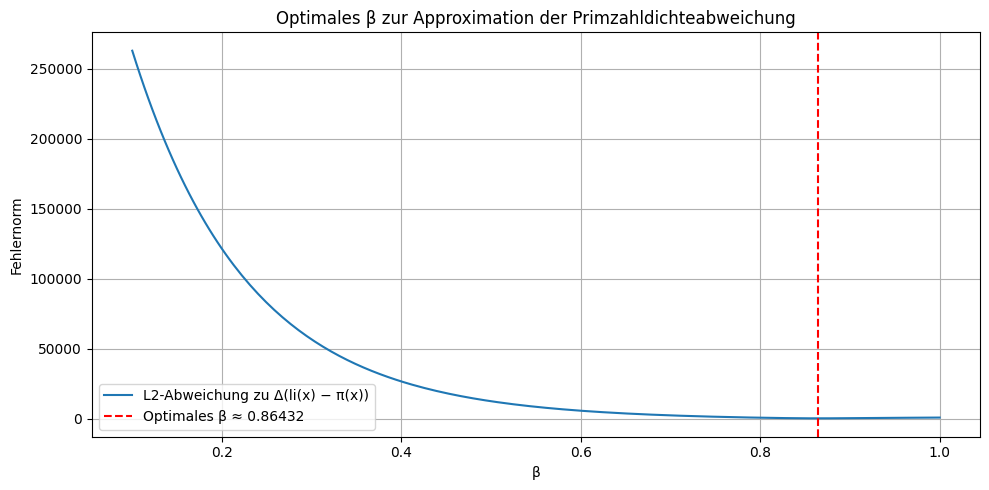

✅ Bestes β (über Primzahldichte): 0.864321608040201


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import li as li_sympy
from sympy import primerange

# Anzahl zu analysierender Werte
N = 10000
x_vals = np.arange(2, N + 2)

# Berechne π(x) und li(x)
pi_vals = [len(list(primerange(2, x))) for x in x_vals]
li_vals = np.array([float(li_sympy(x)) for x in x_vals])

# Abweichung
delta = li_vals - pi_vals

# β-Suchbereich
beta_range = np.linspace(0.1, 1.0, 200)
errors = []

for beta in beta_range:
    series = np.cumsum(1 / x_vals**beta)
    error = np.linalg.norm(series - delta)
    errors.append(error)

# Bestes β finden
best_idx = np.argmin(errors)
best_beta = beta_range[best_idx]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(beta_range, errors, label="L2-Abweichung zu Δ(li(x) − π(x))")
plt.axvline(best_beta, color='r', linestyle='--', label=f"Optimales β ≈ {best_beta:.5f}")
plt.xlabel("β")
plt.ylabel("Fehlernorm")
plt.title("Optimales β zur Approximation der Primzahldichteabweichung")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"✅ Bestes β (über Primzahldichte): {best_beta}")

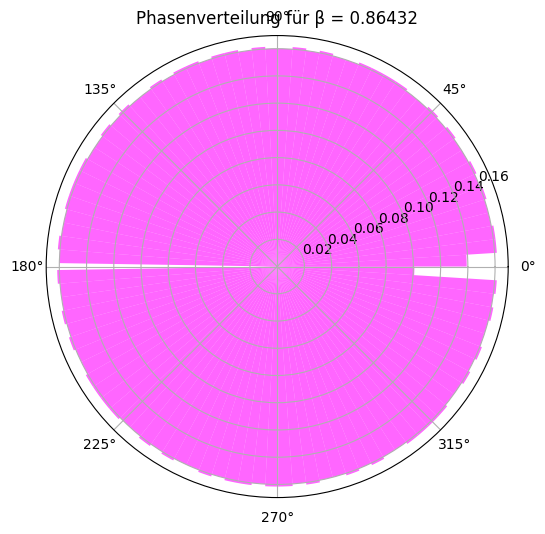

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
beta_test = 0.864321608040201
N = 10000
n = np.arange(1, N + 1)

# Euler-Freese-Vektoren berechnen
H_beta = np.exp(1j * np.pi * beta_test * n)

# Phasenwinkel extrahieren
phasen = np.angle(H_beta)

# Polarhistogramm zur Phasenverteilung
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.hist(phasen, bins=100, density=True, color="magenta", alpha=0.6)
ax.set_title(f"Phasenverteilung für β = {beta_test:.5f}", va='bottom')
plt.show()

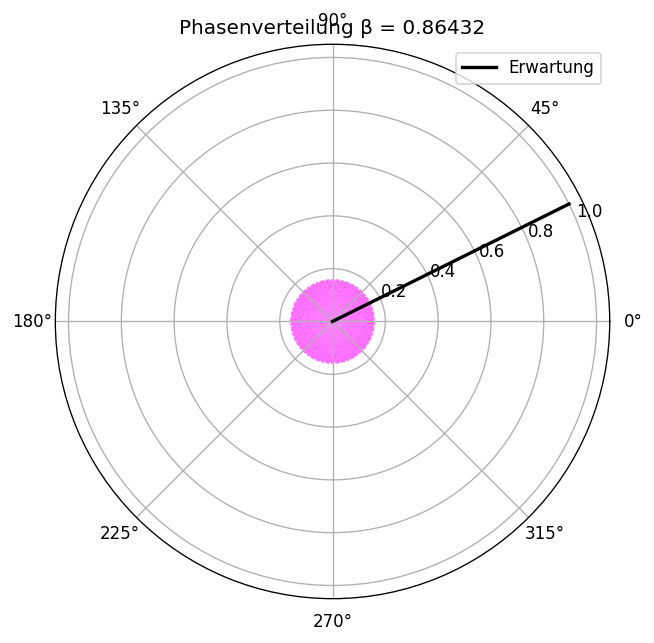

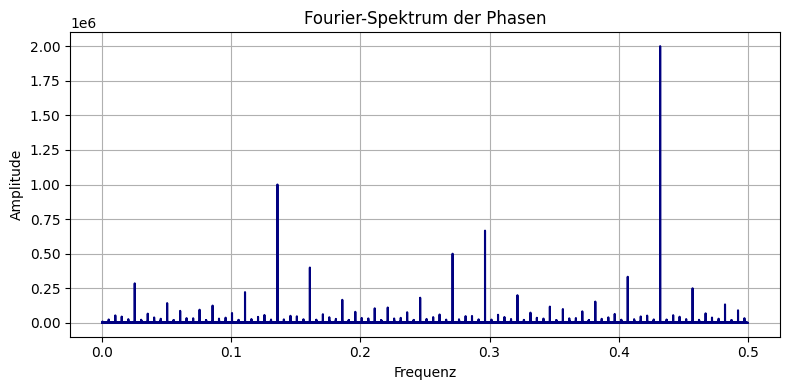

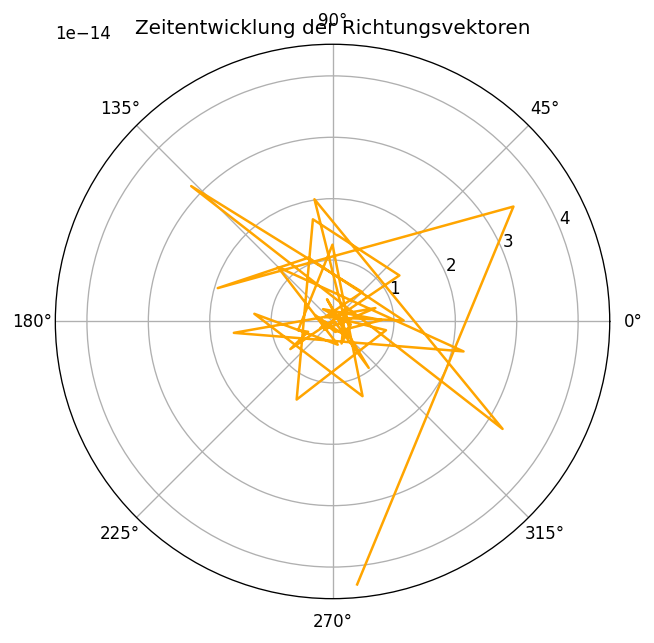

In [ ]:
# === SETUP ===
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi, exp

# === PARAMETER ===
beta = 0.86432
n_max = 2_000_000
n = np.arange(1, n_max + 1)

# === Vektor: H(n) = exp(i * pi * β * n) ===
phasen = np.pi * beta * n
H = np.exp(1j * phasen)

# === 1. PHASENVERTEILUNG + ERWARTUNGSWERT ===
theta = np.angle(H)
mean_vector = np.mean(H)
theta_mean = np.angle(mean_vector)

plt.figure(figsize=(6,6), dpi=120)
ax = plt.subplot(111, polar=True)
ax.hist(theta, bins=180, color='magenta', alpha=0.6, density=True)
ax.plot([theta_mean, theta_mean], [0, 1], color='black', linewidth=2, label='Erwartung')
ax.set_title(f"Phasenverteilung β = {beta}")
ax.legend()
plt.show()

# === 2. FOURIER SPEKTRUM DER PHASEN ===
fourier = np.abs(fft(theta - np.mean(theta)))
frequenz = np.fft.fftfreq(len(theta), d=1)

plt.figure(figsize=(8,4))
plt.plot(frequenz[:len(frequenz)//2], fourier[:len(frequenz)//2], color='navy')
plt.title("Fourier-Spektrum der Phasen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. ZEITENTWICKLUNG DER RICHTUNGSVEKTOREN ===
window = 50_000
steps = n_max // window
richtung = [np.mean(H[i*window:(i+1)*window]) for i in range(steps)]

plt.figure(figsize=(6,6), dpi=120)
ax = plt.subplot(111, polar=True)
ax.plot(np.angle(richtung), np.abs(richtung), color='orange')
ax.set_title("Zeitentwicklung der Richtungsvektoren")
plt.show()

In [ ]:
# === Benötigte Bibliotheken ===
import numpy as np
import matplotlib.pyplot as plt
from sympy import mobius, factorint
from math import log

# === Parameter ===
N = 10000  # Grenze der Summation
beta_values = np.linspace(0.01, 1.0, 300)
S_mobius = []
S_mangoldt = []

# === Mangoldt-Funktion definieren ===
def mangoldt(n):
    if n < 2:
        return 0
    factors = list(factorint(n).items())
    if len(factors) == 1 and factors[0][1] >= 1:
        return log(factors[0][0])
    return 0

# === Berechnung der gewichteten Summen ===
for beta in beta_values:
    sum_mu = sum(mobius(n) / n**beta for n in range(1, N+1))
    sum_lambda = sum(mangoldt(n) / n**beta for n in range(1, N+1))
    S_mobius.append(sum_mu)
    S_mangoldt.append(sum_lambda)

# === Plot ===
plt.figure(figsize=(10, 5))
plt.plot(beta_values, S_mobius, label='Σ μ(n)/n^β (Möbius)', color='green')
plt.plot(beta_values, S_mangoldt, label='Σ Λ(n)/n^β (Mangoldt)', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('β')
plt.ylabel('Summenwert')
plt.title('Vergleich Möbius und Mangoldt für gewichtete Summen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Nutze Gerät: cuda


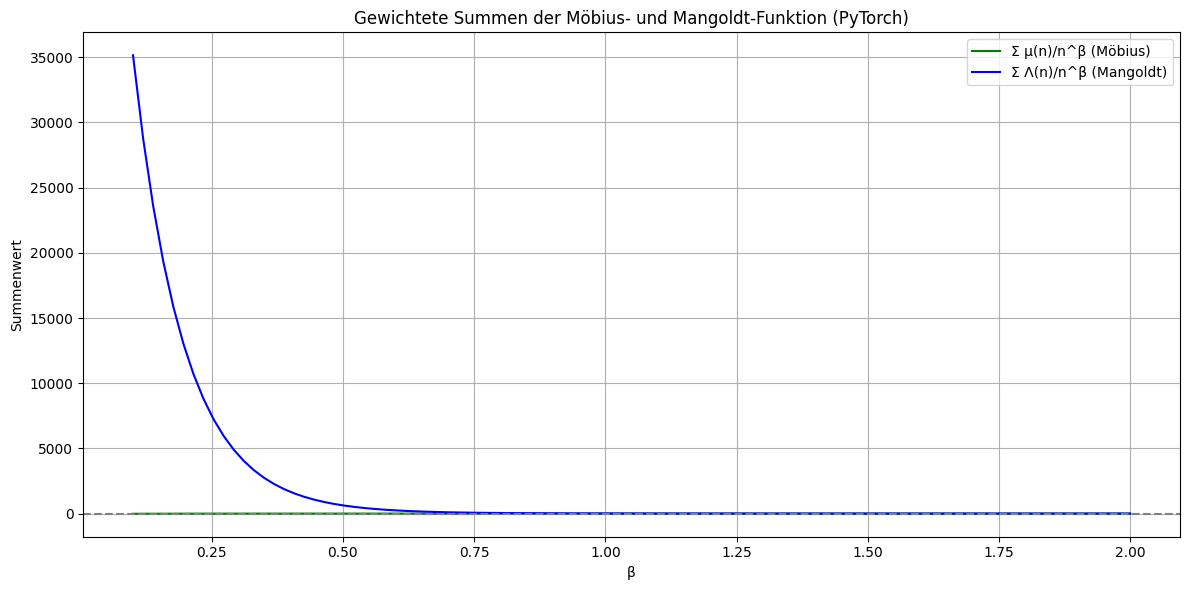

In [ ]:
# === SETUP ===
!pip install sympy --quiet

import torch
import numpy as np
import matplotlib.pyplot as plt
from sympy import mobius, primepi, factorint
from math import log

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Nutze Gerät:", device)

# === PARAMETER ===
N = 100_000
beta_values = torch.linspace(0.1, 2.0, steps=100).to(device)

# === Möbius-Array vorbereiten (CPU, da sympy benötigt wird) ===
mu_np = np.array([mobius(n) for n in range(1, N+1)], dtype=np.float32)
mu = torch.tensor(mu_np, device=device)

# === Mangoldt-Funktion vorbereiten (nur primzahlpotenzen) ===
def build_mangoldt(n_max):
    Λ = torch.zeros(n_max, dtype=torch.float32)
    for n in range(2, n_max + 1):
        f = factorint(n)
        if len(f) == 1:
            p, e = list(f.items())[0]
            if e >= 1:
                Λ[n - 1] = log(p)
    return Λ.to(device)

Λ = build_mangoldt(N)

# === n-Vektor ===
n = torch.arange(1, N+1, dtype=torch.float32, device=device)

# === Summenberechnung über β ===
S_mu, S_Λ = [], []

for β in beta_values:
    n_beta = n ** β
    S_mu.append(torch.sum(mu / n_beta).item())
    S_Λ.append(torch.sum(Λ / n_beta).item())

# === Ergebnisse plotten ===
plt.figure(figsize=(12,6))
plt.plot(beta_values.cpu().numpy(), S_mu, label="Σ μ(n)/n^β (Möbius)", color="green")
plt.plot(beta_values.cpu().numpy(), S_Λ, label="Σ Λ(n)/n^β (Mangoldt)", color="blue")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("β")
plt.ylabel("Summenwert")
plt.title("Gewichtete Summen der Möbius- und Mangoldt-Funktion (PyTorch)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

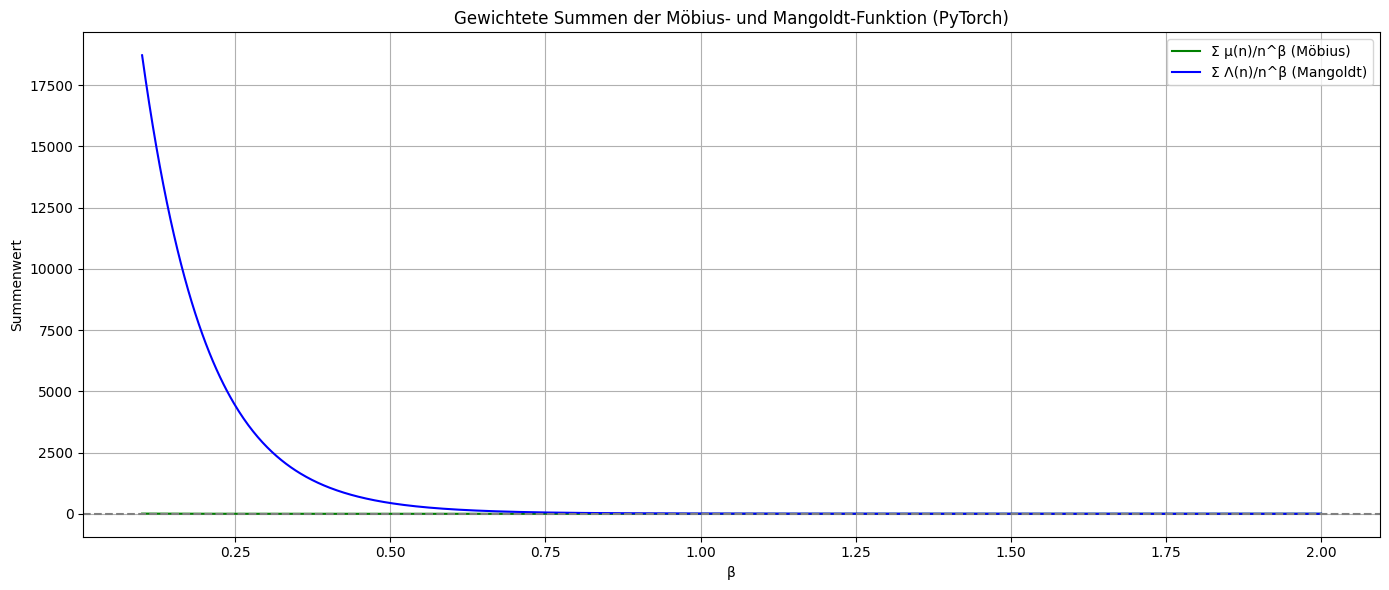

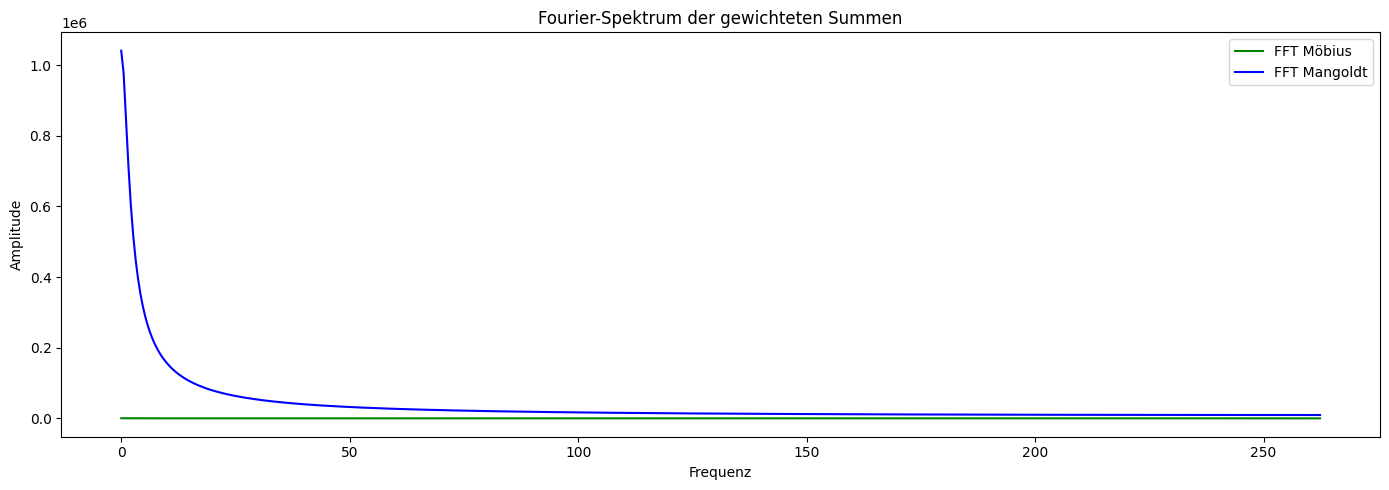

In [ ]:
# Installiere nötige Pakete in Google Colab, falls erforderlich
!pip install sympy

import torch
import matplotlib.pyplot as plt
import numpy as np
from sympy import mobius, isprime
from math import log
from scipy.fft import fft, fftfreq

# GPU wählen, falls verfügbar
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameter
N = 50000
beta_vals = torch.linspace(0.1, 2.0, 1000, device=device)

# Werte vorbereiten
mu_vals = torch.tensor([mobius(n) for n in range(1, N + 1)], dtype=torch.float32, device=device)
lam_vals = torch.tensor([log(n) if isprime(n) else 0 for n in range(1, N + 1)], dtype=torch.float32, device=device)
n_vals = torch.arange(1, N + 1, dtype=torch.float32, device=device)

# Summenberechnung
sum_mu = []
sum_lam = []

for beta in beta_vals:
    weights = n_vals ** (-beta)
    sum_mu.append(torch.sum(mu_vals * weights).item())
    sum_lam.append(torch.sum(lam_vals * weights).item())

# Fourier-Spektrum
mu_fft = np.abs(fft(sum_mu))
lam_fft = np.abs(fft(sum_lam))
freqs = fftfreq(len(beta_vals), d=(beta_vals[1] - beta_vals[0]).item())

# Plot 1: Summen
plt.figure(figsize=(14, 6))
plt.plot(beta_vals.cpu(), sum_mu, label='Σ μ(n)/n^β (Möbius)', color='green')
plt.plot(beta_vals.cpu(), sum_lam, label='Σ Λ(n)/n^β (Mangoldt)', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('β')
plt.ylabel('Summenwert')
plt.title('Gewichtete Summen der Möbius- und Mangoldt-Funktion (PyTorch)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Fourier-Spektrum
plt.figure(figsize=(14, 5))
plt.plot(freqs[:len(freqs)//2], mu_fft[:len(freqs)//2], label='FFT Möbius', color='green')
plt.plot(freqs[:len(freqs)//2], lam_fft[:len(freqs)//2], label='FFT Mangoldt', color='blue')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.title('Fourier-Spektrum der gewichteten Summen')
plt.legend()
plt.tight_layout()
plt.show()

Nutze Gerät: cuda
Berechne Möbius- und Mangoldt-Werte ...


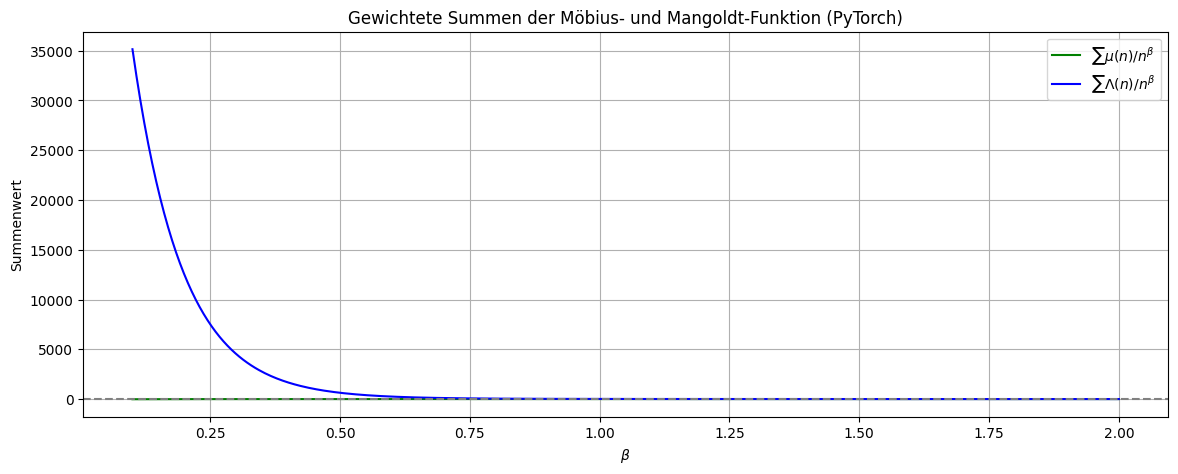

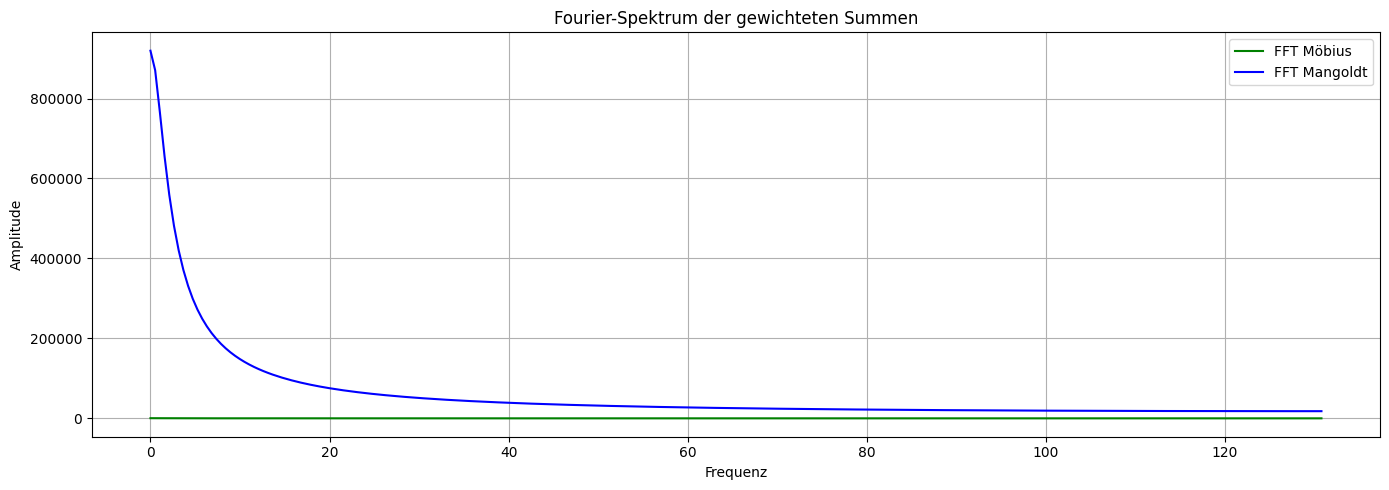

In [ ]:
# =============================================================
# Beta-Analyse (GPU + PyTorch) mit Möbius und Mangoldt-Ansatz
# =============================================================
import numpy as np
import matplotlib.pyplot as plt
import torch
from sympy import mobius, factorint
from scipy.fft import fft, fftfreq

# --- Gerät auswählen ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Nutze Gerät:", device)

# --- Parameter ---
N = 100000  # Summationsgrenze
beta_vals = torch.linspace(0.1, 2.0, 500, device=device)

# --- Mangoldt-Funktion definieren ---
def mangoldt_manual(n):
    factors = factorint(n)
    if len(factors) == 1:
        p, e = list(factors.items())[0]
        if e >= 1:
            return np.log(p)
    return 0.0

# --- Werte vorbereiten ---
print("Berechne Möbius- und Mangoldt-Werte ...")
mu_vals = torch.tensor([mobius(n) for n in range(1, N + 1)], dtype=torch.float32, device=device)
Lambda_vals = torch.tensor([mangoldt_manual(n) for n in range(1, N + 1)], dtype=torch.float32, device=device)
n_vals = torch.arange(1, N + 1, dtype=torch.float32, device=device)

# --- Dirichlet-Reihen berechnen ---
mu_sum = []
Lambda_sum = []
for beta in beta_vals:
    weights = n_vals ** (-beta)
    mu_sum.append(torch.sum(mu_vals * weights).item())
    Lambda_sum.append(torch.sum(Lambda_vals * weights).item())

mu_sum = np.array(mu_sum)
Lambda_sum = np.array(Lambda_sum)
beta_vals_cpu = beta_vals.cpu().numpy()

# --- Plot 1: Gewichtete Summen ---
plt.figure(figsize=(14, 5))
plt.plot(beta_vals_cpu, mu_sum, label=r'$\sum \mu(n)/n^\beta$', color='green')
plt.plot(beta_vals_cpu, Lambda_sum, label=r'$\sum \Lambda(n)/n^\beta$', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('Summenwert')
plt.title('Gewichtete Summen der Möbius- und Mangoldt-Funktion (PyTorch)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Fourier-Spektrum ---
fft_mu = np.abs(fft(mu_sum))
fft_lambda = np.abs(fft(Lambda_sum))
freqs = fftfreq(len(beta_vals_cpu), d=(beta_vals_cpu[1] - beta_vals_cpu[0]))

plt.figure(figsize=(14, 5))
plt.plot(freqs[:len(freqs)//2], fft_mu[:len(freqs)//2], label='FFT Möbius', color='green')
plt.plot(freqs[:len(freqs)//2], fft_lambda[:len(freqs)//2], label='FFT Mangoldt', color='blue')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.title('Fourier-Spektrum der gewichteten Summen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

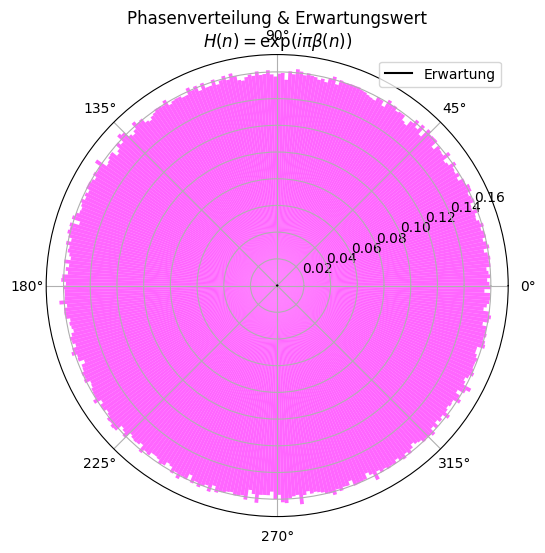

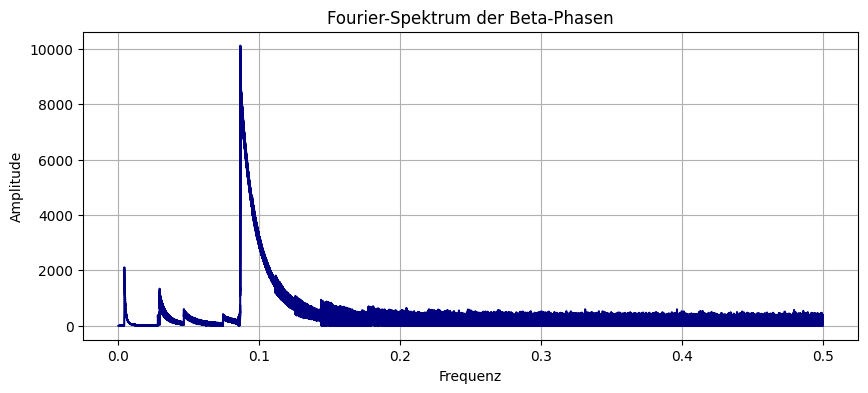

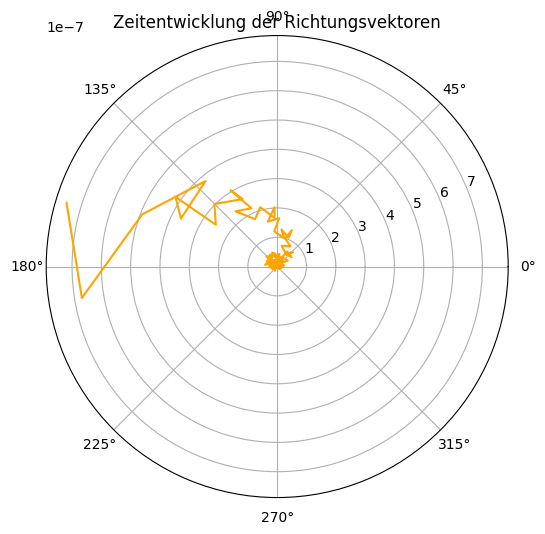

In [ ]:
# === Vorbereitung ===
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import torch

# === Lade Beta-Skala (kombiniert) ===
# Pfad ggf. anpassen oder Datei direkt in Colab hochladen
file = '/content/drive/MyDrive/beta_skala_kombi.csv'
beta = np.loadtxt(file, delimiter=',')
beta = beta.flatten()
n = np.arange(1, len(beta) + 1)

# === Euler-Freese-Vektoren ===
H = np.exp(1j * np.pi * beta)

# === Erwartungswertvektor ===
H_mean = np.mean(H)
H_dir = np.ones_like(H) * H_mean

# === Phasenverteilung ===
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.hist(np.angle(H), bins=360, color='magenta', alpha=0.6, density=True)
ax.plot([0, np.angle(H_mean)], [0, abs(H_mean)], color='black', label='Erwartung')
ax.set_title(r'Phasenverteilung & Erwartungswert' + '\n' + r'$H(n) = \exp(i \pi \beta(n))$')
ax.legend()
plt.show()

# === Fourier-Spektrum ===
H_real = np.real(H)
H_fft = np.abs(fft(H_real - np.mean(H_real)))
freqs = fftfreq(len(H), d=1)

plt.figure(figsize=(10,4))
plt.plot(freqs[:len(freqs)//2], H_fft[:len(H_fft)//2], color='navy')
plt.title("Fourier-Spektrum der Beta-Phasen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# === Zeitentwicklung der Richtungsvektoren ===
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(np.angle(H_mean * np.cumsum(H)/np.arange(1,len(H)+1)), np.abs(H_mean * np.cumsum(H)/np.arange(1,len(H)+1)), color='orange')
ax.set_title("Zeitentwicklung der Richtungsvektoren")
plt.show()

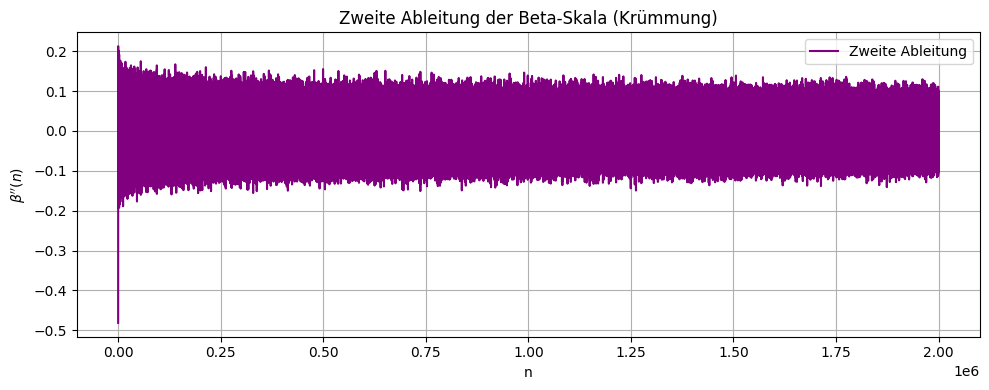

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e1eeb9c6660> (for post_execute):


KeyboardInterrupt: 

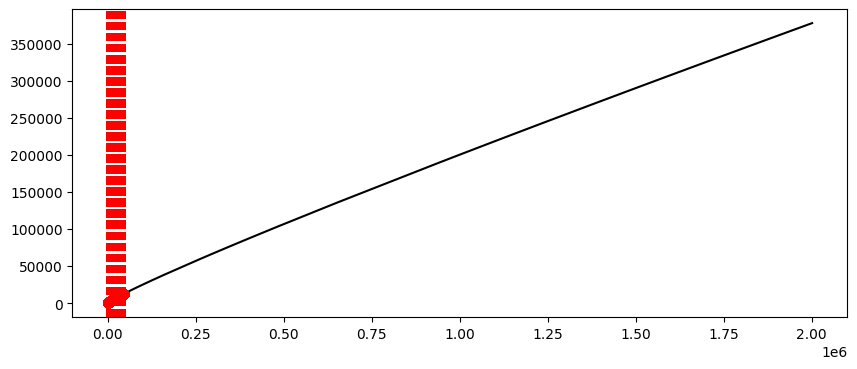

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Datei laden
file_beta = '/content/drive/MyDrive/beta_skala_kombi.csv'
beta = pd.read_csv(file_beta, header=None).squeeze().astype(float).values

# Erste und zweite Ableitung (Diskretisierung)
n = np.arange(1, len(beta) + 1)
d1 = np.gradient(beta)       # erste Ableitung
d2 = np.gradient(d1)         # zweite Ableitung (Krümmung)

# Wendepunkte: lokale Minima/Maxima der ersten Ableitung (≈ Wendestellen)
min_steigung_idx = argrelextrema(d1, np.less)[0]

# === Plot 1: Krümmung (zweite Ableitung) ===
plt.figure(figsize=(10, 4))
plt.plot(n, d2, label='Zweite Ableitung', color='purple')
plt.title('Zweite Ableitung der Beta-Skala (Krümmung)')
plt.xlabel('n')
plt.ylabel(r"$\beta''(n)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Plot 2: Beta-Skala mit Wendepunkt ===
plt.figure(figsize=(10, 4))
plt.plot(n, beta, label=r'$\beta(n)$', color='black')
if len(min_steigung_idx) > 0:
    for i in min_steigung_idx:
        plt.axvline(n[i], color='red', linestyle='--', alpha=0.6)
        plt.plot(n[i], beta[i], 'ro', label='Wendepunkt' if i == min_steigung_idx[0] else "")
plt.title('Beta-Skala mit markierten Wendepunkten')
plt.xlabel('n')
plt.ylabel(r'$\beta(n)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()